In [3]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots

readdir()

  Activating project at `~/code/FermiCG`
┌ Info: Precompiling FermiCG [855c3b3a-d9bb-4919-8b00-0b3cfbdffb6f]
└ @ Base loading.jl:1423


12-element Vector{String}:
 ".ipynb_checkpoints"
 "Cact.molden"
 "cluster_3_N40.ipynb"
 "cluster_3_N40.jl"
 "integrals_h0.npy"
 "integrals_h1.npy"
 "integrals_h2.npy"
 "mo_coeffs_act.npy"
 "mo_coeffs_doc.npy"
 "nat_orb_active_space.out"
 "nat_orb_active_space.py"
 "xyz.npy"

In [4]:
# build this just so we can print out molden files to view the MOs
molecule = "
H           -3.426100        -2.240400         5.488400
H           -5.627400        -1.077000         5.214700
C           -3.653500        -1.732700         4.551600
H           -1.767100        -2.237000         3.663900
C           -4.907300        -1.068800         4.394700
H           -6.163100         0.096400         3.101400
C           -2.725800        -1.732100         3.540600
H           -0.300300         1.083200        -5.235700
C           -5.209800        -0.419000         3.224900
C           -2.996100        -1.063600         2.307300
H           -1.103000        -1.532900         1.397700
H           -0.427000        -0.802900        -0.856600
H            0.236100        -0.097900        -3.127300
C           -1.019300         1.073000        -4.415000
H           -2.498800         2.251900        -5.503400
C           -4.274000        -0.392400         2.144500
H           -5.501500         0.794400         0.831000
C           -2.061300        -1.027200         1.271800
C           -1.382000        -0.289500        -0.977200
C           -0.717100         0.418000        -3.247600
C           -2.272000         1.739500        -4.569000
H           -4.157600         2.241200        -3.678700
C           -4.546300         0.281700         0.953400
C           -2.324300        -0.340200         0.070400
C           -1.652800         0.387400        -2.167000
C           -3.199800         1.734100        -3.558400
C           -3.604400         0.330900        -0.094300
C           -2.930200         1.059100        -2.329200
C           -3.866500         1.018700        -1.295500
H           -4.824300         1.525600        -1.421700
H            6.954300         5.020900        -5.781400
H            9.130800         5.788500        -4.794600
C            7.130300         4.913900        -4.709900
H            5.199700         4.047800        -4.322900
C            8.368100         5.351000        -4.148200
H            9.543000         5.570100        -2.368400
C            6.155900         4.370100        -3.908500
H            4.469100         3.270900        -2.103400
C            8.601900         5.233600        -2.800800
C            6.366300         4.207300        -2.503300
C            5.408400         3.620800        -1.673100
C            7.624000         4.655100        -1.933900
H            8.793800         4.849500        -0.136000
H            3.726000         2.535700         0.128600
C            5.630800         3.465600        -0.289200
C            7.849900         4.509800        -0.563800
C            4.668600         2.877900         0.557100
C            6.887300         3.923700         0.283000
H            8.046600         4.121200         2.098700
H            2.974600         1.818600         2.362500
C            4.893400         2.733400         1.927600
C            7.108600         3.769300         1.667200
C            3.915400         2.155900         2.795000
H            3.383500         1.608200         4.789600
C            6.150200         3.183400         2.497000
H            7.316000         3.346600         4.316500
C            4.148200         2.042400         4.143100
C            6.360000         3.023000         3.902600
C            5.385400         2.480900         4.704600
H            5.560600         2.377300         5.776700
H            1.028200         5.020900        -5.781400
H            3.204700         5.788500        -4.794600
C            1.204300         4.913900        -4.709900
H           -0.726400         4.047800        -4.322900
C            2.442000         5.351000        -4.148200
H            3.616900         5.570100        -2.368400
C            0.229800         4.370100        -3.908500
H           -1.457000         3.270900        -2.103400
C            2.675800         5.233600        -2.800800
C            0.440300         4.207300        -2.503300
C           -0.517600         3.620800        -1.673100
C            1.697900         4.655100        -1.933900
H            2.867800         4.849500        -0.136000
H           -2.200000         2.535700         0.128600
H           -2.951500         1.818600         2.362500
C           -0.295200         3.465600        -0.289200
C            1.923900         4.509800        -0.563800
H           -2.542500         1.608200         4.789600
C           -1.257500         2.877900         0.557100
C           -2.010600         2.155900         2.795000
C            0.961300         3.923700         0.283000
H            2.120600         4.121200         2.098700
C           -1.777900         2.042400         4.143100
H           -0.365500         2.377300         5.776700
C           -1.032700         2.733400         1.927600
C            1.182500         3.769300         1.667200
C           -0.540600         2.480900         4.704600
C            0.224100         3.183400         2.497000
C            0.434000         3.023000         3.902600
H            1.389900         3.346600         4.316500
H            3.427300         2.251900        -5.503400
H            5.625800         1.083200        -5.235700
C            3.654100         1.739500        -4.569000
H            1.768500         2.241200        -3.678700
H            0.298700        -1.077000         5.214700
C            4.906700         1.073000        -4.415000
H            6.162100        -0.097900        -3.127300
C            2.726300         1.734100        -3.558400
H           -0.237000         0.096400         3.101400
C            1.018700        -1.068800         4.394700
H            2.500000        -2.240400         5.488400
H            0.424600         0.794400         0.831000
H            1.101800         1.525600        -1.421700
C            5.209000         0.418000        -3.247600
C            2.995900         1.059100        -2.329200
C            0.716200        -0.419000         3.224900
C            2.272600        -1.732700         4.551600
H            4.159000        -2.237000         3.663900
C            1.379700         0.281700         0.953400
C            2.059600         1.018700        -1.295500
C            4.273300         0.387400        -2.167000
H            5.499100        -0.802900        -0.856600
C            1.652100        -0.392400         2.144500
C            3.200300        -1.732100         3.540600
C            2.321700         0.330900        -0.094300
C            4.544100        -0.289500        -0.977200
C            2.930000        -1.063600         2.307300
C            3.601700        -0.340200         0.070400
C            3.864800        -1.027200         1.271800
H            4.823000        -1.532900         1.397700
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "6-31g*"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);



In [11]:
#load integrals from disk
ints = InCoreInts(
    npzread("integrals_h0.npy"), 
    npzread("integrals_h1.npy"), 
    npzread("integrals_h2.npy") 
);
C = npzread("mo_coeffs_act.npy")
S = npzread("overlap_mat.npy");
D = npzread("density_mat.npy");


 Laplacian Eigenvalues
    1   0.00000000
    2   0.12056210
    3   0.17217339
    4   0.22807798
    5   0.38185325
    6   0.40757732
    7   0.41881316
    8   0.42862895
    9   0.48778773
   10   0.52228831
   11   0.55301481
   12   0.58392848
   13   0.75655412
   14   0.79992811
   15   0.82548212
   16   0.83089956
   17   0.85993594
   18   0.89247227
   19   0.91665870
   20   0.93934315
   21   0.94317984
   22   0.96831093
   23   0.97298675
   24   0.97688366
   25   0.98377488
   26   0.99014520
   27   0.99641940
   28   0.99960077
   29   1.02734571
   30   1.04010070
   31   1.05340594
   32   1.08513689
   33   1.09339528
   34   1.10082266
   35   1.14151676
   36   1.15023606
   37   1.37186859
   38   1.38136142
   39   1.43084732
   40   1.43558954
[1, 5, 9, 13, 17, 20, 25, 32, 36, 40, 4, 8, 16, 21, 24, 28, 31, 35, 38, 39, 2, 6, 10, 11, 14, 19, 22, 26, 27, 30, 3, 7, 12, 15, 18, 23, 29, 33, 34, 37]

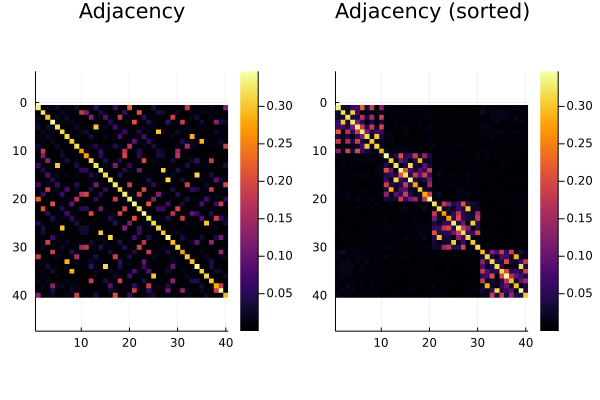

In [12]:
using LinearAlgebra, Printf
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

function cluster_orbitals(A, n_clusters)
    """
    A is adjacency matrix
    """
    
    L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
    F = eigen(L);
    perm = sortperm(F.values, by=abs)
    F.values .= F.values[perm]
    F.vectors .= F.vectors[:,perm]

    print(" Laplacian Eigenvalues\n")
    for (fi_idx, fi) in enumerate(F.values)
        @printf(" %4i %12.8f\n", fi_idx, fi)
    end
    
    p1 = plot(F.values)
    
    A = abs.(F.vectors[:,1:n_clusters]*F.vectors[:,1:n_clusters]')
    p2 = heatmap(abs.(A), aspect_ratio=:equal, title="Projector", yflip = true)
    
    clustering = clusterize(KMeansClusterizer(n_clusters), A).assignments;

    perm = sortperm(clustering)
    p3 = heatmap(abs.(A[perm,perm]), aspect_ratio=:equal, title="Projector", yflip = true)

    clusters = [ [] for i in 1:n_clusters]
    for (idx,i) in enumerate(clustering)
        push!(clusters[i],idx)
    end

    plot(p1, p2, p3, layout = @layout [a; b c])

    return perm, clusters
end

n_clusters = 4
adjacency = abs.(C'*D*C)
perm, cluster_list = cluster_orbitals(adjacency, n_clusters)
print(perm)
    
p1 = heatmap(adjacency, aspect_ratio=:equal, title="Adjacency", yflip = true) 
p2 = heatmap(adjacency[perm, perm], aspect_ratio=:equal, title="Adjacency (sorted)", yflip = true) 

ints_sorted = deepcopy(ints)
ints_sorted.h1 .= ints.h1[perm,perm]
ints_sorted.h2 .= ints.h2[perm,perm,perm,perm];
C_sorted = C[:,perm]
FermiCG.pyscf_write_molden(mol,C_sorted,filename="orbitals.molden");

plot(p1, p2, layout = @layout [a b])

In [13]:
# define clusters
cluster_list = [collect(1:10), collect(11:20), collect(21:30), collect(31:40)]
clusters = [Cluster(i,collect(cluster_list[i])) for i = 1:length(cluster_list)]
init_fspace = [ (5,5) for i in 1:n_clusters]
display(clusters)


4-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
 Cluster(2, [11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
 Cluster(3, [21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
 Cluster(4, [31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

In [14]:
rdm1 =  C_sorted' * S * D * S * C_sorted * .5

e_cmf, U_cmf, Da, Db  = FermiCG.cmf_oo(ints_sorted, clusters, init_fspace, rdm1, rdm1,
                                        max_iter_oo=150, verbose=0, gconv=1e-6, method="bfgs");

C_cmf = C_sorted * U_cmf
ints_cmf = FermiCG.orbital_rotation(ints_sorted, U_cmf);


 ooCMF Iter:    1 Total= -2754.762024778242 Active= -90.567192047933 G=     1.10e-01
 ooCMF Iter:    2 Total= -2754.766098819118 Active= -90.571266088809 G=     2.99e-02
 ooCMF Iter:    3 Total= -2754.766462610264 Active= -90.571629879955 G=     1.07e-02
 ooCMF Iter:    4 Total= -2754.766525289333 Active= -90.571692559025 G=     7.20e-03
 ooCMF Iter:    5 Total= -2754.766571834860 Active= -90.571739104551 G=     7.19e-03
 ooCMF Iter:    6 Total= -2754.766614021978 Active= -90.571781291669 G=     4.76e-03
 ooCMF Iter:    7 Total= -2754.766623792517 Active= -90.571791062208 G=     2.20e-03
 ooCMF Iter:    8 Total= -2754.766626296320 Active= -90.571793566011 G=     1.58e-03
 ooCMF Iter:    9 Total= -2754.766629106019 Active= -90.571796375710 G=     1.65e-03
 ooCMF Iter:   10 Total= -2754.766630489572 Active= -90.571797759263 G=     7.71e-04
 ooCMF Iter:   11 Total= -2754.766630740836 Active= -90.571798010527 G=     2.99e-04
 ooCMF Iter:   12 Total= -2754.766630783466 Active= -90.571798053

 * Status: success

 * Candidate solution
    Final objective value:     -2.754767e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.17e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.52e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.28e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.91e-14 ≰ 0.0e+00
    |g(x)|                 = 8.94e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   1786  (vs limit Inf)
    Iterations:    21
    f(x) calls:    57
    ∇f(x) calls:   57


 ooCMF Iter:   22 Total= -2754.766630858232 Active= -90.571798127923 G=     6.16e-06
*ooCMF -2754.76663086 


In [13]:
ints = deepcopy(ints_cmf)
C = deepcopy(C_cmf);

In [15]:
max_roots = 10

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=1, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db, delta_elec=2);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);


IDX001:DIM1048576:001|002|003|004|005|006|007|008|009|010|
 Number of embedded electrons a,b: 15.000000 15.000000 FCIProblem:: #Orbs = 10  #α = 3  #β = 5  Dimension: 30240    
   State    1 Energy:  -9.91513830 -2674.10997103
   State    2 Energy:  -9.89656688 -2674.09139961
   State    3 Energy:  -9.84973736 -2674.04457009
   State    4 Energy:  -9.84898084 -2674.04381357
   State    5 Energy:  -9.82097723 -2674.01580996
   State    6 Energy:  -9.81957524 -2674.01440797
   State    7 Energy:  -9.81147888 -2674.00631161
   State    8 Energy:  -9.78374573 -2673.97857846
   State    9 Energy:  -9.77876310 -2673.97359583
   State   10 Energy:  -9.76869383 -2673.96352657
 FCIProblem:: #Orbs = 10  #α = 4  #β = 4  Dimension: 44100    
   State    1 Energy:  -9.96291915 -2674.15775188
   State    2 Energy:  -9.91513830 -2674.10997103
   State    3 Energy:  -9.89656688 -2674.09139961
   State    4 Energy:  -9.89139713 -2674.08622986
   State    5 Energy:  -9.84973736 -2674.04457009
   State   

 FCIProblem:: #Orbs = 10  #α = 4  #β = 5  Dimension: 52920    
   State    1 Energy: -10.35490757 -2674.54974030
   State    2 Energy: -10.28412682 -2674.47895955
   State    3 Energy: -10.27745763 -2674.47229036
   State    4 Energy: -10.27103494 -2674.46586767
   State    5 Energy: -10.23479341 -2674.42962614
   State    6 Energy: -10.22166331 -2674.41649604
   State    7 Energy: -10.22027634 -2674.41510907
   State    8 Energy: -10.21420485 -2674.40903758
   State    9 Energy: -10.19599957 -2674.39083230
   State   10 Energy: -10.18746936 -2674.38230209
 FCIProblem:: #Orbs = 10  #α = 4  #β = 6  Dimension: 44100    
   State    1 Energy: -10.51100076 -2674.70583349
   State    2 Energy: -10.43502162 -2674.62985435
   State    3 Energy: -10.42333754 -2674.61817027
   State    4 Energy: -10.40014717 -2674.59497990
   State    5 Energy: -10.37723040 -2674.57206313
   State    6 Energy: -10.37336221 -2674.56819494
   State    7 Energy: -10.36943484 -2674.56426757
   State    8 Energy: -1

 FCIProblem:: #Orbs = 10  #α = 5  #β = 3  Dimension: 30240    
   State    1 Energy:  -9.89021295 -2674.08504568
   State    2 Energy:  -9.87241646 -2674.06724919
   State    3 Energy:  -9.82472102 -2674.01955375
   State    4 Energy:  -9.82376559 -2674.01859832
   State    5 Energy:  -9.79609901 -2673.99093174
   State    6 Energy:  -9.79536293 -2673.99019566
   State    7 Energy:  -9.78737200 -2673.98220473
   State    8 Energy:  -9.75985878 -2673.95469151
   State    9 Energy:  -9.75404640 -2673.94887913
   State   10 Energy:  -9.74446825 -2673.93930098
 FCIProblem:: #Orbs = 10  #α = 5  #β = 4  Dimension: 52920    
   State    1 Energy: -10.32334250 -2674.51817523
   State    2 Energy: -10.25307536 -2674.44790809
   State    3 Energy: -10.24569611 -2674.44052884
   State    4 Energy: -10.23988171 -2674.43471444
   State    5 Energy: -10.20375034 -2674.39858307
   State    6 Energy: -10.19011748 -2674.38495021
   State    7 Energy: -10.18978807 -2674.38462080
   State    8 Energy: -1

 FCIProblem:: #Orbs = 10  #α = 5  #β = 5  Dimension: 63504    
   State    1 Energy: -10.70409392 -2674.89892666
   State    2 Energy: -10.63539999 -2674.83023272
   State    3 Energy: -10.55940132 -2674.75423405
   State    4 Energy: -10.55774150 -2674.75257423
   State    5 Energy: -10.54811653 -2674.74294926
   State    6 Energy: -10.54474026 -2674.73957299
   State    7 Energy: -10.52778816 -2674.72262089
   State    8 Energy: -10.52477639 -2674.71960912
   State    9 Energy: -10.50433092 -2674.69916365
   State   10 Energy: -10.50222032 -2674.69705305
 FCIProblem:: #Orbs = 10  #α = 5  #β = 6  Dimension: 52920    
   State    1 Energy: -10.67196026 -2674.86679299
   State    2 Energy: -10.59839000 -2674.79322273
   State    3 Energy: -10.58801218 -2674.78284491
   State    4 Energy: -10.58352017 -2674.77835290
   State    5 Energy: -10.53819462 -2674.73302735
   State    6 Energy: -10.53293496 -2674.72776769
   State    7 Energy: -10.51693329 -2674.71176602
   State    8 Energy: -1

In [16]:
nroots = 27
ci_vector = FermiCG.TPSCIstate(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
# Add the lowest energy single exciton to basis
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([3,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,3,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,3,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,3])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([4,1,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,4,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,4,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,1,4])] = zeros(Float64,nroots)


# TT states ms=0
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,2,1,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([2,1,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,2,1])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,2,1,2])] = zeros(Float64,nroots)
ci_vector[FermiCG.FockConfig(init_fspace)][FermiCG.ClusterConfig([1,1,2,2])] = zeros(Float64,nroots)

# Spin-flip states
fspace_0 = FermiCG.FockConfig(init_fspace)

## ba
tmp_fspace = FermiCG.replace(fspace_0, (1,2), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,3), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,4), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,3), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,4), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (3,4), ([6,4],[4,6]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)

## ab
tmp_fspace = FermiCG.replace(fspace_0, (1,2), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,3), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (1,4), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,3), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (2,4), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)
tmp_fspace = FermiCG.replace(fspace_0, (3,4), ([4,6],[6,4]))
FermiCG.add_fockconfig!(ci_vector, tmp_fspace)
ci_vector[tmp_fspace][FermiCG.ClusterConfig([1,1,1,1])] = zeros(Float64,nroots)


FermiCG.eye!(ci_vector)

In [18]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =1e-2,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-5,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            max_iter=10,
#                     ci_max_ss_vecs = 3,
#                     ci_max_iter = 30,
                            incremental=false,	# turn this off,  as it wasn't well tested for multistate
			    matvec=3);

 ci_vector     : (31, 27)
 thresh_cipsi  : 0.001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : -1.0
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : false
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 matvec        : 3


     Selected CI Iteration:    1 epsilon:   0.00100000
 Memory needed to hold full CI matrix:   0.00000769 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    31: 
 Build full Hamiltonian matrix with dimension:       0.002641 seconds (37.01 k allocations: 852.047 KiB)
 Diagonalize: 
                                      0.000204 seconds (11 allocations: 34.938 KiB)
 Compute S2 expectation values:                      0.006116 seconds (29.33 k allocations: 753.125 KiB)
  Root       Energy           S2
     1 -90.57179817   0.00000000
     2 -90.50402459   2.00000000
     3 -90.50390595   2.00000000
    

 Compute matrix-vector:                              3.060533 seconds (2.45 M allocations: 143.110 MiB)
 Now collect thread results:                         0.507555 seconds (3.55 M allocations: 172.209 MiB, 58.09% gc time)
 Length of FOIS vector: 110612
 Length of FOIS vector: 110396
 Compute diagonal                                    0.095745 seconds (3.64 M allocations: 69.876 MiB)
 Compute <0|H|0>:                                    0.074897 seconds (1.26 M allocations: 28.287 MiB)

  Root         E(0)         E(2)
     1 -90.56146310 -90.57199443
     2 -90.47005532 -90.50545779
     3 -90.46372188 -90.50473016
     4 -90.46697565 -90.50422159
     5 -90.45403247 -90.50366176
     6 -90.32397407 -90.43826460
     7 -90.32142611 -90.43805465
     8 -90.32055364 -90.43799850
     9 -90.32892510 -90.43798382
    10 -90.32965917 -90.43767787
    11 -90.34482859 -90.43757990
    12 -90.32080398 -90.43728088
    13 -90.33365924 -90.43722829
    14 -90.33701823 -90.43702476
    15 -90.2

 Length of ASCI vector     2079 →      222 
 Norm of delta v:
   0.00002786
   0.00021071
   0.00014086
   0.00030013
   0.00030303
   0.00001518
   0.00000213
   0.00002150
   0.00000836
   0.00000658
   0.00005987
   0.00000243
   0.00000808
   0.00000007
   0.00000143
   0.00000079
   0.00000017
   0.00001326
   0.00000230
   0.00000165
   0.00003027
   0.00000394
   0.00000305
   0.00065016
   0.00007274
   0.00018584
   0.00001441

 |............................do PT2................................
 thresh_foi    :1.0e-5
 prescreen     :false
 H0            :Hcmf
 nbody         :4
 Norms of input states
   0.99987941
   0.99959967
   0.99954336
   0.99962362
   0.99944937
   0.99868821
   0.99866819
   0.99867185
   0.99877210
   0.99875985
   0.99892202
   0.99867997
   0.99880562
   0.99886913
   0.99842388
   0.99839596
   0.99890625
   0.99893743
   0.99902213
   0.99883192
   0.99868807
   0.99878983
   0.99851558
   0.99909157
   0.99895468
   0.99869895
   0.99897275
 Comp

In [20]:
@time e2 = FermiCG.compute_pt2_energy(ci_vector, cluster_ops, clustered_ham, thresh_foi=1e-8);


 |........................do batched PT2............................
 thresh_foi    :1.0e-8
 prescreen     :true
 H0            :Hcmf
 nbody         :4
 Norms of input states:
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
 Compute <0|H0|0>:                                   0.007372 seconds (12.34 k allocations: 359.969 KiB)
 Compute <0|H|0>:                                    0.007278 seconds (62.72 k allocations: 1.443 MiB)
 Number of jobs:    1759
 Number of threads: 24
   |----------------------------------------------------------------------------------------------------|
   |0%                                                                             

In [21]:
@time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, clustered_ham, thresh_foi=1e-8);


 |........................do batched PT2............................
 thresh_foi    :1.0e-8
 prescreen     :true
 H0            :Hcmf
 nbody         :4
 Norms of input states:
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
 Compute <0|H0|0>:                                   0.457081 seconds (2.39 M allocations: 58.545 MiB)
 Compute <0|H|0>:                                    3.284258 seconds (72.99 M allocations: 1.613 GiB)
 Number of jobs:    4887
 Number of threads: 24
   |----------------------------------------------------------------------------------------------------|
   |0%                                                                               

In [22]:
@save "M10.jld2" clusters Da Db ints C cluster_bases ci_vector  

# Now increase M

In [28]:
max_roots = 20

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=1, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db, delta_elec=4);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);


IDX001:DIM1048576:001|002|003|004|005|006|007|008|009|010|
 Number of embedded electrons a,b: 15.000000 15.000000 FCIProblem:: #Orbs = 10  #α = 1  #β = 5  Dimension: 2520     
   State    1 Energy:  -8.48205185 -2672.67688458
   State    2 Energy:  -8.47596688 -2672.67079961
   State    3 Energy:  -8.43991239 -2672.63474512
   State    4 Energy:  -8.40909810 -2672.60393083
   State    5 Energy:  -8.39179539 -2672.58662812
   State    6 Energy:  -8.38349667 -2672.57832940
   State    7 Energy:  -8.35298279 -2672.54781552
   State    8 Energy:  -8.34587524 -2672.54070797
   State    9 Energy:  -8.33595050 -2672.53078323
   State   10 Energy:  -8.33106257 -2672.52589530
   State   11 Energy:  -8.32395711 -2672.51878984
   State   12 Energy:  -8.32102357 -2672.51585630
   State   13 Energy:  -8.30522442 -2672.50005715
   State   14 Energy:  -8.30059999 -2672.49543272
   State   15 Energy:  -8.28765482 -2672.48248755
   State   16 Energy:  -8.28734835 -2672.48218108
   State   17 Energy:  -

 FCIProblem:: #Orbs = 10  #α = 3  #β = 7  Dimension: 14400    
   State    1 Energy: -10.33456241 -2674.52939514
   State    2 Energy: -10.30210409 -2674.49693682
   State    3 Energy: -10.29870112 -2674.49353385
   State    4 Energy: -10.28130751 -2674.47614024
   State    5 Energy: -10.26740743 -2674.46224016
   State    6 Energy: -10.24866351 -2674.44349624
   State    7 Energy: -10.24666383 -2674.44149656
   State    8 Energy: -10.23964969 -2674.43448242
   State    9 Energy: -10.23640947 -2674.43124220
   State   10 Energy: -10.22221034 -2674.41704307
   State   11 Energy: -10.20914600 -2674.40397873
   State   12 Energy: -10.20753913 -2674.40237186
   State   13 Energy: -10.19579957 -2674.39063230
   State   14 Energy: -10.19520125 -2674.39003398
   State   15 Energy: -10.19463406 -2674.38946679
   State   16 Energy: -10.19225096 -2674.38708369
   State   17 Energy: -10.18393175 -2674.37876448
   State   18 Energy: -10.17997783 -2674.37481056
   State   19 Energy: -10.17101599 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 1  Dimension: 2520     
   State    1 Energy:  -8.48205185 -2672.67688458
   State    2 Energy:  -8.47596688 -2672.67079961
   State    3 Energy:  -8.43991239 -2672.63474512
   State    4 Energy:  -8.40909810 -2672.60393083
   State    5 Energy:  -8.39179539 -2672.58662812
   State    6 Energy:  -8.38349667 -2672.57832940
   State    7 Energy:  -8.35298279 -2672.54781552
   State    8 Energy:  -8.34587524 -2672.54070797
   State    9 Energy:  -8.33595050 -2672.53078323
   State   10 Energy:  -8.33106257 -2672.52589530
   State   11 Energy:  -8.32395711 -2672.51878984
   State   12 Energy:  -8.32102357 -2672.51585630
   State   13 Energy:  -8.30522442 -2672.50005715
   State   14 Energy:  -8.30059999 -2672.49543272
   State   15 Energy:  -8.28765482 -2672.48248755
   State   16 Energy:  -8.28734835 -2672.48218108
   State   17 Energy:  -8.28408432 -2672.47891705
   State   18 Energy:  -8.27685941 -2672.47169214
   State   19 Energy:  -8.27150896 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 9  Dimension: 2520     
   State    1 Energy:  -9.16258664 -2673.35741937
   State    2 Energy:  -9.15600416 -2673.35083689
   State    3 Energy:  -9.09329215 -2673.28812488
   State    4 Energy:  -9.07950367 -2673.27433640
   State    5 Energy:  -9.07124196 -2673.26607470
   State    6 Energy:  -9.06982324 -2673.26465597
   State    7 Energy:  -9.02137924 -2673.21621197
   State    8 Energy:  -9.01667204 -2673.21150477
   State    9 Energy:  -9.01091579 -2673.20574852
   State   10 Energy:  -8.99835613 -2673.19318886
   State   11 Energy:  -8.99232068 -2673.18715341
   State   12 Energy:  -8.99231496 -2673.18714769
   State   13 Energy:  -8.98654308 -2673.18137581
   State   14 Energy:  -8.98225394 -2673.17708667
   State   15 Energy:  -8.96321351 -2673.15804624
   State   16 Energy:  -8.96268489 -2673.15751762
   State   17 Energy:  -8.95770592 -2673.15253865
   State   18 Energy:  -8.95024703 -2673.14507976
   State   19 Energy:  -8.94227791 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 3  Dimension: 14400    
   State    1 Energy: -10.33456241 -2674.52939514
   State    2 Energy: -10.30210409 -2674.49693682
   State    3 Energy: -10.29870112 -2674.49353385
   State    4 Energy: -10.28130751 -2674.47614024
   State    5 Energy: -10.26740743 -2674.46224016
   State    6 Energy: -10.24866351 -2674.44349624
   State    7 Energy: -10.24666383 -2674.44149656
   State    8 Energy: -10.23964969 -2674.43448242
   State    9 Energy: -10.23640947 -2674.43124220
   State   10 Energy: -10.22221034 -2674.41704307
   State   11 Energy: -10.20914600 -2674.40397873
   State   12 Energy: -10.20753913 -2674.40237186
   State   13 Energy: -10.19579957 -2674.39063230
   State   14 Energy: -10.19520125 -2674.39003398
   State   15 Energy: -10.19463406 -2674.38946679
   State   16 Energy: -10.19225096 -2674.38708369
   State   17 Energy: -10.18393175 -2674.37876448
   State   18 Energy: -10.17997783 -2674.37481056
   State   19 Energy: -10.17101599 -2

 FCIProblem:: #Orbs = 10  #α = 9  #β = 5  Dimension: 2520     
   State    1 Energy:  -9.16258664 -2673.35741937
   State    2 Energy:  -9.15600416 -2673.35083689
   State    3 Energy:  -9.09329215 -2673.28812488
   State    4 Energy:  -9.07950367 -2673.27433640
   State    5 Energy:  -9.07124196 -2673.26607470
   State    6 Energy:  -9.06982324 -2673.26465597
   State    7 Energy:  -9.02137924 -2673.21621197
   State    8 Energy:  -9.01667204 -2673.21150477
   State    9 Energy:  -9.01091579 -2673.20574852
   State   10 Energy:  -8.99835613 -2673.19318886
   State   11 Energy:  -8.99232068 -2673.18715341
   State   12 Energy:  -8.99231496 -2673.18714769
   State   13 Energy:  -8.98654308 -2673.18137581
   State   14 Energy:  -8.98225394 -2673.17708667
   State   15 Energy:  -8.96321351 -2673.15804624
   State   16 Energy:  -8.96268489 -2673.15751762
   State   17 Energy:  -8.95770592 -2673.15253865
   State   18 Energy:  -8.95024703 -2673.14507976
   State   19 Energy:  -8.94227791 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 6  Dimension: 25200    
   State    1 Energy: -10.23479341 -2674.42962614
   State    2 Energy: -10.22027634 -2674.41510907
   State    3 Energy: -10.17302229 -2674.36785502
   State    4 Energy: -10.16733662 -2674.36216935
   State    5 Energy: -10.16075008 -2674.35558281
   State    6 Energy: -10.14972215 -2674.34455488
   State    7 Energy: -10.14244663 -2674.33727936
   State    8 Energy: -10.12928947 -2674.32412220
   State    9 Energy: -10.10463091 -2674.29946364
   State   10 Energy: -10.09803420 -2674.29286694
   State   11 Energy: -10.09603258 -2674.29086531
   State   12 Energy: -10.09248040 -2674.28731313
   State   13 Energy: -10.08956059 -2674.28439332
   State   14 Energy: -10.08924189 -2674.28407462
   State   15 Energy: -10.08128851 -2674.27612124
   State   16 Energy: -10.07745750 -2674.27229023
   State   17 Energy: -10.07460248 -2674.26943521
   State   18 Energy: -10.06198940 -2674.25682213
   State   19 Energy: -10.06155414 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 8  Dimension: 9450     
   State    1 Energy: -10.12928195 -2674.32411468
   State    2 Energy: -10.08209415 -2674.27692688
   State    3 Energy: -10.07744448 -2674.27227721
   State    4 Energy: -10.07043898 -2674.26527171
   State    5 Energy: -10.06679722 -2674.26162995
   State    6 Energy: -10.05518191 -2674.25001464
   State    7 Energy: -10.02360485 -2674.21843758
   State    8 Energy: -10.01348812 -2674.20832085
   State    9 Energy: -10.00848222 -2674.20331495
   State   10 Energy: -10.00555567 -2674.20038840
   State   11 Energy:  -9.99982242 -2674.19465515
   State   12 Energy:  -9.99898350 -2674.19381623
   State   13 Energy:  -9.99103576 -2674.18586849
   State   14 Energy:  -9.98323894 -2674.17807167
   State   15 Energy:  -9.97889684 -2674.17372957
   State   16 Energy:  -9.96903970 -2674.16387243
   State   17 Energy:  -9.96875548 -2674.16358821
   State   18 Energy:  -9.96459984 -2674.15943257
   State   19 Energy:  -9.95867375 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 8  Dimension: 11340    
   State    1 Energy:  -9.82225665 -2674.01708938
   State    2 Energy:  -9.76869963 -2673.96353236
   State    3 Energy:  -9.75877824 -2673.95361097
   State    4 Energy:  -9.75632231 -2673.95115505
   State    5 Energy:  -9.73980175 -2673.93463448
   State    6 Energy:  -9.73643825 -2673.93127098
   State    7 Energy:  -9.68224403 -2673.87707676
   State    8 Energy:  -9.68045097 -2673.87528370
   State    9 Energy:  -9.67439971 -2673.86923244
   State   10 Energy:  -9.67331006 -2673.86814279
   State   11 Energy:  -9.66214692 -2673.85697965
   State   12 Energy:  -9.66172570 -2673.85655843
   State   13 Energy:  -9.66080576 -2673.85563849
   State   14 Energy:  -9.65201001 -2673.84684274
   State   15 Energy:  -9.64913852 -2673.84397125
   State   16 Energy:  -9.64138651 -2673.83621924
   State   17 Energy:  -9.63785298 -2673.83268571
   State   18 Energy:  -9.62324186 -2673.81807460
   State   19 Energy:  -9.61643594 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 8  Dimension: 9450     
   State    1 Energy:  -9.27729149 -2673.47212422
   State    2 Energy:  -9.21621965 -2673.41105238
   State    3 Energy:  -9.21207258 -2673.40690531
   State    4 Energy:  -9.20698131 -2673.40181404
   State    5 Energy:  -9.19902517 -2673.39385790
   State    6 Energy:  -9.17825874 -2673.37309147
   State    7 Energy:  -9.16347466 -2673.35830739
   State    8 Energy:  -9.15596580 -2673.35079853
   State    9 Energy:  -9.14416539 -2673.33899812
   State   10 Energy:  -9.13886554 -2673.33369827
   State   11 Energy:  -9.12807028 -2673.32290301
   State   12 Energy:  -9.12601949 -2673.32085222
   State   13 Energy:  -9.11693329 -2673.31176602
   State   14 Energy:  -9.11239801 -2673.30723074
   State   15 Energy:  -9.10386333 -2673.29869606
   State   16 Energy:  -9.10306923 -2673.29790196
   State   17 Energy:  -9.09363740 -2673.28847013
   State   18 Energy:  -9.09347243 -2673.28830517
   State   19 Energy:  -9.08031630 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 6  Dimension: 9450     
   State    1 Energy:  -9.27729149 -2673.47212422
   State    2 Energy:  -9.21621965 -2673.41105238
   State    3 Energy:  -9.21207258 -2673.40690531
   State    4 Energy:  -9.20698131 -2673.40181404
   State    5 Energy:  -9.19902517 -2673.39385790
   State    6 Energy:  -9.17825874 -2673.37309147
   State    7 Energy:  -9.16347466 -2673.35830739
   State    8 Energy:  -9.15596580 -2673.35079853
   State    9 Energy:  -9.14416539 -2673.33899812
   State   10 Energy:  -9.13886554 -2673.33369827
   State   11 Energy:  -9.12807028 -2673.32290301
   State   12 Energy:  -9.12601949 -2673.32085222
   State   13 Energy:  -9.11693329 -2673.31176602
   State   14 Energy:  -9.11239801 -2673.30723074
   State   15 Energy:  -9.10386333 -2673.29869606
   State   16 Energy:  -9.10306923 -2673.29790196
   State   17 Energy:  -9.09363740 -2673.28847013
   State   18 Energy:  -9.09347243 -2673.28830517
   State   19 Energy:  -9.08031630 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 5  Dimension: 30240    
   State    1 Energy:  -9.89021295 -2674.08504568
   State    2 Energy:  -9.87241646 -2674.06724919
   State    3 Energy:  -9.82472102 -2674.01955375
   State    4 Energy:  -9.82376559 -2674.01859832
   State    5 Energy:  -9.79609901 -2673.99093174
   State    6 Energy:  -9.79536293 -2673.99019566
   State    7 Energy:  -9.78737200 -2673.98220473
   State    8 Energy:  -9.75985878 -2673.95469151
   State    9 Energy:  -9.75404640 -2673.94887913
   State   10 Energy:  -9.74446825 -2673.93930098
   State   11 Energy:  -9.74210149 -2673.93693422
   State   12 Energy:  -9.74018051 -2673.93501324
   State   13 Energy:  -9.73706641 -2673.93189914
   State   14 Energy:  -9.73363354 -2673.92846627
   State   15 Energy:  -9.72793995 -2673.92277268
   State   16 Energy:  -9.72526400 -2673.92009673
   State   17 Energy:  -9.72380812 -2673.91864085
   State   18 Energy:  -9.71962708 -2673.91445981
   State   19 Energy:  -9.70799570 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 7  Dimension: 25200    
   State    1 Energy: -10.36010180 -2674.55493453
   State    2 Energy: -10.35530584 -2674.55013857
   State    3 Energy: -10.29957647 -2674.49440920
   State    4 Energy: -10.28968835 -2674.48452108
   State    5 Energy: -10.28843325 -2674.48326598
   State    6 Energy: -10.27912742 -2674.47396015
   State    7 Energy: -10.27322593 -2674.46805866
   State    8 Energy: -10.26371332 -2674.45854605
   State    9 Energy: -10.23611365 -2674.43094638
   State   10 Energy: -10.22643011 -2674.42126284
   State   11 Energy: -10.22049618 -2674.41532891
   State   12 Energy: -10.21918979 -2674.41402252
   State   13 Energy: -10.21812228 -2674.41295501
   State   14 Energy: -10.21295410 -2674.40778683
   State   15 Energy: -10.21211984 -2674.40695257
   State   16 Energy: -10.20523210 -2674.40006483
   State   17 Energy: -10.19829401 -2674.39312674
   State   18 Energy: -10.19800126 -2674.39283399
   State   19 Energy: -10.19307175 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 7  Dimension: 30240    
   State    1 Energy: -10.21700644 -2674.41183917
   State    2 Energy: -10.20938712 -2674.40421985
   State    3 Energy: -10.14380515 -2674.33863788
   State    4 Energy: -10.13815263 -2674.33298536
   State    5 Energy: -10.13012329 -2674.32495602
   State    6 Energy: -10.12519821 -2674.32003094
   State    7 Energy: -10.11294780 -2674.30778053
   State    8 Energy: -10.08042025 -2674.27525298
   State    9 Energy: -10.06760623 -2674.26243896
   State   10 Energy: -10.06361236 -2674.25844509
   State   11 Energy: -10.06001653 -2674.25484926
   State   12 Energy: -10.05538497 -2674.25021770
   State   13 Energy: -10.05504701 -2674.24987974
   State   14 Energy: -10.05473184 -2674.24956457
   State   15 Energy: -10.05356765 -2674.24840038
   State   16 Energy: -10.04137324 -2674.23620597
   State   17 Energy: -10.03999664 -2674.23482937
   State   18 Energy: -10.03951146 -2674.23434419
   State   19 Energy: -10.03441915 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 7  Dimension: 25200    
   State    1 Energy:  -9.83033202 -2674.02516475
   State    2 Energy:  -9.82909541 -2674.02392814
   State    3 Energy:  -9.76668158 -2673.96151431
   State    4 Energy:  -9.75858754 -2673.95342027
   State    5 Energy:  -9.75718250 -2673.95201524
   State    6 Energy:  -9.74840279 -2673.94323552
   State    7 Energy:  -9.73595144 -2673.93078417
   State    8 Energy:  -9.72142191 -2673.91625464
   State    9 Energy:  -9.71418339 -2673.90901612
   State   10 Energy:  -9.70330341 -2673.89813614
   State   11 Energy:  -9.70004987 -2673.89488260
   State   12 Energy:  -9.68508187 -2673.87991460
   State   13 Energy:  -9.68461224 -2673.87944497
   State   14 Energy:  -9.68268806 -2673.87752079
   State   15 Energy:  -9.68162036 -2673.87645309
   State   16 Energy:  -9.67263535 -2673.86746808
   State   17 Energy:  -9.66097385 -2673.85580658
   State   18 Energy:  -9.65381629 -2673.84864902
   State   19 Energy:  -9.65367355 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.76668158 -2673.96151431
   State    2 Energy:  -9.71418339 -2673.90901612
   State    3 Energy:  -9.70330341 -2673.89813614
   State    4 Energy:  -9.70004987 -2673.89488260
   State    5 Energy:  -9.68461224 -2673.87944497
   State    6 Energy:  -9.68162036 -2673.87645309
   State    7 Energy:  -9.62680403 -2673.82163676
   State    8 Energy:  -9.62652728 -2673.82136001
   State    9 Energy:  -9.61953282 -2673.81436555
   State   10 Energy:  -9.61834365 -2673.81317639
   State   11 Energy:  -9.60820143 -2673.80303416
   State   12 Energy:  -9.60559982 -2673.80043255
   State   13 Energy:  -9.60497360 -2673.79980633
   State   14 Energy:  -9.59688652 -2673.79171925
   State   15 Energy:  -9.59403363 -2673.78886636
   State   16 Energy:  -9.58594118 -2673.78077391
   State   17 Energy:  -9.58326438 -2673.77809711
   State   18 Energy:  -9.56770404 -2673.76253677
   State   19 Energy:  -9.56180507 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 4  Dimension: 25200    
   State    1 Energy:  -9.43998166 -2673.63481439
   State    2 Energy:  -9.43195853 -2673.62679126
   State    3 Energy:  -9.38600119 -2673.58083392
   State    4 Energy:  -9.38390289 -2673.57873562
   State    5 Energy:  -9.37775393 -2673.57258667
   State    6 Energy:  -9.36734016 -2673.56217289
   State    7 Energy:  -9.35938264 -2673.55421537
   State    8 Energy:  -9.34981119 -2673.54464392
   State    9 Energy:  -9.34211025 -2673.53694298
   State   10 Energy:  -9.33361041 -2673.52844314
   State   11 Energy:  -9.32648223 -2673.52131496
   State   12 Energy:  -9.31841970 -2673.51325243
   State   13 Energy:  -9.31598303 -2673.51081576
   State   14 Energy:  -9.30056096 -2673.49539369
   State   15 Energy:  -9.29960582 -2673.49443855
   State   16 Energy:  -9.29840507 -2673.49323780
   State   17 Energy:  -9.29107771 -2673.48591044
   State   18 Energy:  -9.27859972 -2673.47343245
   State   19 Energy:  -9.27819491 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 6  Dimension: 44100    
   State    1 Energy: -10.63539999 -2674.83023272
   State    2 Energy: -10.55940132 -2674.75423405
   State    3 Energy: -10.54811653 -2674.74294926
   State    4 Energy: -10.52477639 -2674.71960912
   State    5 Energy: -10.50222032 -2674.69705305
   State    6 Energy: -10.49803292 -2674.69286565
   State    7 Energy: -10.49421534 -2674.68904807
   State    8 Energy: -10.49178342 -2674.68661615
   State    9 Energy: -10.47324487 -2674.66807760
   State   10 Energy: -10.46921181 -2674.66404454
   State   11 Energy: -10.46683899 -2674.66167172
   State   12 Energy: -10.45998725 -2674.65481998
   State   13 Energy: -10.45932882 -2674.65416155
   State   14 Energy: -10.44764128 -2674.64247401
   State   15 Energy: -10.43476794 -2674.62960067
   State   16 Energy: -10.42741639 -2674.62224912
   State   17 Energy: -10.42420978 -2674.61904251
   State   18 Energy: -10.42201104 -2674.61684377
   State   19 Energy: -10.41799312 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 6  Dimension: 52920    
   State    1 Energy: -10.67196026 -2674.86679299
   State    2 Energy: -10.59839000 -2674.79322273
   State    3 Energy: -10.58801218 -2674.78284491
   State    4 Energy: -10.58352017 -2674.77835290
   State    5 Energy: -10.53819462 -2674.73302735
   State    6 Energy: -10.53293496 -2674.72776769
   State    7 Energy: -10.51693329 -2674.71176602
   State    8 Energy: -10.51419131 -2674.70902404
   State    9 Energy: -10.51107495 -2674.70590768
   State   10 Energy: -10.50781940 -2674.70265213
   State   11 Energy: -10.48743739 -2674.68227012
   State   12 Energy: -10.47847006 -2674.67330279
   State   13 Energy: -10.47617360 -2674.67100633
   State   14 Energy: -10.46717655 -2674.66200928
   State   15 Energy: -10.46665012 -2674.66148285
   State   16 Energy: -10.45752835 -2674.65236108
   State   17 Energy: -10.45154516 -2674.64637789
   State   18 Energy: -10.45028242 -2674.64511515
   State   19 Energy: -10.44424219 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 6  Dimension: 44100    
   State    1 Energy: -10.47458767 -2674.66942040
   State    2 Energy: -10.41275498 -2674.60758771
   State    3 Energy: -10.40461805 -2674.59945078
   State    4 Energy: -10.39864371 -2674.59347644
   State    5 Energy: -10.34907404 -2674.54390677
   State    6 Energy: -10.33862002 -2674.53345275
   State    7 Energy: -10.33381245 -2674.52864518
   State    8 Energy: -10.32415584 -2674.51898857
   State    9 Energy: -10.32019872 -2674.51503145
   State   10 Energy: -10.32016370 -2674.51499643
   State   11 Energy: -10.31074814 -2674.50558087
   State   12 Energy: -10.30843541 -2674.50326814
   State   13 Energy: -10.30527839 -2674.50011112
   State   14 Energy: -10.29579536 -2674.49062809
   State   15 Energy: -10.27497289 -2674.46980562
   State   16 Energy: -10.26957118 -2674.46440391
   State   17 Energy: -10.26577728 -2674.46061001
   State   18 Energy: -10.26267812 -2674.45751085
   State   19 Energy: -10.25787591 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 4  Dimension: 9450     
   State    1 Energy: -10.27497289 -2674.46980562
   State    2 Energy: -10.22946104 -2674.42429377
   State    3 Energy: -10.22277893 -2674.41761166
   State    4 Energy: -10.21688494 -2674.41171767
   State    5 Energy: -10.21166471 -2674.40649744
   State    6 Energy: -10.20112941 -2674.39596214
   State    7 Energy: -10.16979610 -2674.36462883
   State    8 Energy: -10.16036237 -2674.35519510
   State    9 Energy: -10.15431343 -2674.34914616
   State   10 Energy: -10.15317878 -2674.34801151
   State   11 Energy: -10.14774424 -2674.34257697
   State   12 Energy: -10.14517017 -2674.34000290
   State   13 Energy: -10.13507390 -2674.32990663
   State   14 Energy: -10.12917221 -2674.32400494
   State   15 Energy: -10.12595131 -2674.32078404
   State   16 Energy: -10.11509976 -2674.30993249
   State   17 Energy: -10.11430451 -2674.30913724
   State   18 Energy: -10.11016867 -2674.30500140
   State   19 Energy: -10.10486061 -2

In [29]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =1e-2,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-5,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            max_iter=10,
                            incremental=false,	# turn this off,  as it wasn't well tested for multistate
			    matvec=3);

 ci_vector     : (31, 27)
 thresh_cipsi  : 0.001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : -1.0
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : false
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 matvec        : 3


     Selected CI Iteration:    1 epsilon:   0.00100000
 Memory needed to hold full CI matrix:   0.00000769 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    31: 
 Build full Hamiltonian matrix with dimension:       0.002522 seconds (37.01 k allocations: 852.047 KiB)
 Diagonalize: 
                                      0.000179 seconds (11 allocations: 34.938 KiB)
 Compute S2 expectation values:                      0.006129 seconds (29.59 k allocations: 761.156 KiB)
  Root       Energy           S2
     1 -90.57179817   0.00000000
     2 -90.50402459   2.00000000
     3 -90.50390595   2.00000000
    

 Compute matrix-vector:                             15.019750 seconds (7.44 M allocations: 489.401 MiB)
 Now collect thread results:                         1.447783 seconds (11.12 M allocations: 538.561 MiB, 62.78% gc time)
 Length of FOIS vector: 346384
 Length of FOIS vector: 346101
 Compute diagonal                                    0.337839 seconds (11.42 M allocations: 219.134 MiB, 16.79% gc time)
 Compute <0|H|0>:                                    0.102395 seconds (2.73 M allocations: 61.609 MiB)

  Root         E(0)         E(2)
     1 -90.53878857 -90.57322637
     2 -90.44836886 -90.50622392
     3 -90.44251735 -90.50567499
     4 -90.44632012 -90.50498678
     5 -90.43645534 -90.50460773
     6 -90.26738667 -90.43875654
     7 -90.25881344 -90.43858200
     8 -90.26381422 -90.43847181
     9 -90.30102404 -90.43852570
    10 -90.28903655 -90.43820768
    11 -90.26711122 -90.43811584
    12 -90.26950484 -90.43788398
    13 -90.28504653 -90.43786743
    14 -90.28020563 -90.43

 Length of ASCI vector     3663 →      289 
 Norm of delta v:
   0.00002288
   0.00033085
   0.00040892
   0.00082016
   0.00072869
   0.00004367
   0.00009423
   0.00012829
   0.00009935
   0.00009905
   0.00022942
   0.00000621
   0.00015477
   0.00025671
   0.00000966
   0.00000689
   0.00003186
   0.00003888
   0.00003687
   0.00001000
   0.00006407
   0.00001919
   0.00001672
   0.00173030
   0.00013494
   0.00039834
   0.00034897

 |............................do PT2................................
 thresh_foi    :1.0e-5
 prescreen     :false
 H0            :Hcmf
 nbody         :4
 Norms of input states
   0.99962168
   0.99934281
   0.99937846
   0.99939677
   0.99924682
   0.99808627
   0.99799753
   0.99804628
   0.99848194
   0.99829239
   0.99804701
   0.99811418
   0.99824988
   0.99819404
   0.99794922
   0.99785256
   0.99851034
   0.99830556
   0.99837822
   0.99845946
   0.99827916
   0.99832029
   0.99819569
   0.99847155
   0.99862980
   0.99829573
   0.99890428
 Comp

In [30]:
@time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, clustered_ham, thresh_foi=1e-8);


 |........................do batched PT2............................
 thresh_foi    :1.0e-8
 prescreen     :true
 H0            :Hcmf
 nbody         :4
 Norms of input states:
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
 Compute <0|H0|0>:                                   0.741768 seconds (12.49 M allocations: 292.143 MiB)
 Compute <0|H|0>:                                    9.629576 seconds (289.67 M allocations: 6.412 GiB, 11.50% gc time)
 Number of jobs:    6029
 Number of threads: 24
   |----------------------------------------------------------------------------------------------------|
   |0%                                                            

In [31]:
@save "M20.jld2" clusters Da Db ints C cluster_bases ci_vector  

In [32]:
max_roots = 40

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=1, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db, delta_elec=4);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);


IDX001:DIM1048576:001|002|003|004|005|006|007|008|009|010|
 Number of embedded electrons a,b: 15.000000 15.000000 FCIProblem:: #Orbs = 10  #α = 1  #β = 5  Dimension: 2520     
   State    1 Energy:  -8.48205185 -2672.67688458
   State    2 Energy:  -8.47596688 -2672.67079961
   State    3 Energy:  -8.43991239 -2672.63474512
   State    4 Energy:  -8.40909810 -2672.60393083
   State    5 Energy:  -8.39179539 -2672.58662812
   State    6 Energy:  -8.38349667 -2672.57832940
   State    7 Energy:  -8.35298279 -2672.54781552
   State    8 Energy:  -8.34587524 -2672.54070797
   State    9 Energy:  -8.33595050 -2672.53078323
   State   10 Energy:  -8.33106257 -2672.52589530
   State   11 Energy:  -8.32395711 -2672.51878984
   State   12 Energy:  -8.32102357 -2672.51585630
   State   13 Energy:  -8.30522442 -2672.50005715
   State   14 Energy:  -8.30059999 -2672.49543272
   State   15 Energy:  -8.28765482 -2672.48248755
   State   16 Energy:  -8.28734835 -2672.48218108
   State   17 Energy:  -

 FCIProblem:: #Orbs = 10  #α = 3  #β = 3  Dimension: 14400    
   State    1 Energy:  -8.56554185 -2672.76037458
   State    2 Energy:  -8.56435529 -2672.75918802
   State    3 Energy:  -8.54039557 -2672.73522830
   State    4 Energy:  -8.52923277 -2672.72406550
   State    5 Energy:  -8.52130420 -2672.71613693
   State    6 Energy:  -8.51805609 -2672.71288882
   State    7 Energy:  -8.50504067 -2672.69987340
   State    8 Energy:  -8.50403989 -2672.69887262
   State    9 Energy:  -8.50392439 -2672.69875712
   State   10 Energy:  -8.48205185 -2672.67688458
   State   11 Energy:  -8.47810046 -2672.67293319
   State   12 Energy:  -8.47717824 -2672.67201097
   State   13 Energy:  -8.47596688 -2672.67079961
   State   14 Energy:  -8.46390345 -2672.65873618
   State   15 Energy:  -8.46178859 -2672.65662132
   State   16 Energy:  -8.45223859 -2672.64707132
   State   17 Energy:  -8.44966972 -2672.64450245
   State   18 Energy:  -8.44812280 -2672.64295553
   State   19 Energy:  -8.44762333 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 7  Dimension: 14400    
   State    1 Energy: -10.33456241 -2674.52939514
   State    2 Energy: -10.30210409 -2674.49693682
   State    3 Energy: -10.29870112 -2674.49353385
   State    4 Energy: -10.28130751 -2674.47614024
   State    5 Energy: -10.26740743 -2674.46224016
   State    6 Energy: -10.24866351 -2674.44349624
   State    7 Energy: -10.24666383 -2674.44149656
   State    8 Energy: -10.23964969 -2674.43448242
   State    9 Energy: -10.23640947 -2674.43124220
   State   10 Energy: -10.22221034 -2674.41704307
   State   11 Energy: -10.20914600 -2674.40397873
   State   12 Energy: -10.20753913 -2674.40237186
   State   13 Energy: -10.19579957 -2674.39063230
   State   14 Energy: -10.19520125 -2674.39003398
   State   15 Energy: -10.19463406 -2674.38946679
   State   16 Energy: -10.19225096 -2674.38708369
   State   17 Energy: -10.18393175 -2674.37876448
   State   18 Energy: -10.17997783 -2674.37481056
   State   19 Energy: -10.17101599 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 5  Dimension: 52920    
   State    1 Energy: -10.35368375 -2674.54851648
   State    2 Energy: -10.28228206 -2674.47711479
   State    3 Energy: -10.27588690 -2674.47071963
   State    4 Energy: -10.27024430 -2674.46507703
   State    5 Energy: -10.23391509 -2674.42874782
   State    6 Energy: -10.22042113 -2674.41525386
   State    7 Energy: -10.21896313 -2674.41379586
   State    8 Energy: -10.21259301 -2674.40742574
   State    9 Energy: -10.19472142 -2674.38955415
   State   10 Energy: -10.18641524 -2674.38124797
   State   11 Energy: -10.17218982 -2674.36702255
   State   12 Energy: -10.17041739 -2674.36525012
   State   13 Energy: -10.16697721 -2674.36180994
   State   14 Energy: -10.16617187 -2674.36100460
   State   15 Energy: -10.15916459 -2674.35399732
   State   16 Energy: -10.14816025 -2674.34299298
   State   17 Energy: -10.14074898 -2674.33558171
   State   18 Energy: -10.13680427 -2674.33163700
   State   19 Energy: -10.12918853 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 1  Dimension: 2520     
   State    1 Energy:  -8.48205185 -2672.67688458
   State    2 Energy:  -8.47596688 -2672.67079961
   State    3 Energy:  -8.43991239 -2672.63474512
   State    4 Energy:  -8.40909810 -2672.60393083
   State    5 Energy:  -8.39179539 -2672.58662812
   State    6 Energy:  -8.38349667 -2672.57832940
   State    7 Energy:  -8.35298279 -2672.54781552
   State    8 Energy:  -8.34587524 -2672.54070797
   State    9 Energy:  -8.33595050 -2672.53078323
   State   10 Energy:  -8.33106257 -2672.52589530
   State   11 Energy:  -8.32395711 -2672.51878984
   State   12 Energy:  -8.32102357 -2672.51585630
   State   13 Energy:  -8.30522442 -2672.50005715
   State   14 Energy:  -8.30059999 -2672.49543272
   State   15 Energy:  -8.28765482 -2672.48248755
   State   16 Energy:  -8.28734835 -2672.48218108
   State   17 Energy:  -8.28408432 -2672.47891705
   State   18 Energy:  -8.27685941 -2672.47169214
   State   19 Energy:  -8.27150896 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 5  Dimension: 63504    
   State    1 Energy: -10.57812133 -2674.77295406
   State    2 Energy: -10.51022806 -2674.70506079
   State    3 Energy: -10.43397425 -2674.62880698
   State    4 Energy: -10.43202189 -2674.62685462
   State    5 Energy: -10.42186295 -2674.61669568
   State    6 Energy: -10.41855671 -2674.61338944
   State    7 Energy: -10.40332530 -2674.59815803
   State    8 Energy: -10.39858803 -2674.59342076
   State    9 Energy: -10.37847318 -2674.57330591
   State   10 Energy: -10.37535298 -2674.57018571
   State   11 Energy: -10.37222717 -2674.56705990
   State   12 Energy: -10.36859373 -2674.56342646
   State   13 Energy: -10.36531482 -2674.56014755
   State   14 Energy: -10.35499807 -2674.54983080
   State   15 Energy: -10.34878829 -2674.54362102
   State   16 Energy: -10.34386480 -2674.53869753
   State   17 Energy: -10.34152858 -2674.53636131
   State   18 Energy: -10.34099663 -2674.53582937
   State   19 Energy: -10.33456241 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 9  Dimension: 2520     
   State    1 Energy:  -9.16258664 -2673.35741937
   State    2 Energy:  -9.15600416 -2673.35083689
   State    3 Energy:  -9.09329215 -2673.28812488
   State    4 Energy:  -9.07950367 -2673.27433640
   State    5 Energy:  -9.07124196 -2673.26607470
   State    6 Energy:  -9.06982324 -2673.26465597
   State    7 Energy:  -9.02137924 -2673.21621197
   State    8 Energy:  -9.01667204 -2673.21150477
   State    9 Energy:  -9.01091579 -2673.20574852
   State   10 Energy:  -8.99835613 -2673.19318886
   State   11 Energy:  -8.99232068 -2673.18715341
   State   12 Energy:  -8.99231496 -2673.18714769
   State   13 Energy:  -8.98654308 -2673.18137581
   State   14 Energy:  -8.98225394 -2673.17708667
   State   15 Energy:  -8.96321351 -2673.15804624
   State   16 Energy:  -8.96268489 -2673.15751762
   State   17 Energy:  -8.95770592 -2673.15253865
   State   18 Energy:  -8.95024703 -2673.14507976
   State   19 Energy:  -8.94227791 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 5  Dimension: 52920    
   State    1 Energy: -10.53505987 -2674.72989260
   State    2 Energy: -10.46194097 -2674.65677370
   State    3 Energy: -10.45216862 -2674.64700135
   State    4 Energy: -10.44649245 -2674.64132518
   State    5 Energy: -10.40213650 -2674.59696923
   State    6 Energy: -10.39746325 -2674.59229598
   State    7 Energy: -10.37994145 -2674.57477418
   State    8 Energy: -10.37726258 -2674.57209531
   State    9 Energy: -10.37475266 -2674.56958539
   State   10 Energy: -10.37155811 -2674.56639084
   State   11 Energy: -10.35127328 -2674.54610601
   State   12 Energy: -10.34067012 -2674.53550285
   State   13 Energy: -10.33997945 -2674.53481218
   State   14 Energy: -10.33161135 -2674.52644408
   State   15 Energy: -10.33022190 -2674.52505463
   State   16 Energy: -10.32111230 -2674.51594503
   State   17 Energy: -10.31417708 -2674.50900981
   State   18 Energy: -10.31350789 -2674.50834062
   State   19 Energy: -10.30755876 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 3  Dimension: 14400    
   State    1 Energy: -10.33456241 -2674.52939514
   State    2 Energy: -10.30210409 -2674.49693682
   State    3 Energy: -10.29870112 -2674.49353385
   State    4 Energy: -10.28130751 -2674.47614024
   State    5 Energy: -10.26740743 -2674.46224016
   State    6 Energy: -10.24866351 -2674.44349624
   State    7 Energy: -10.24666383 -2674.44149656
   State    8 Energy: -10.23964969 -2674.43448242
   State    9 Energy: -10.23640947 -2674.43124220
   State   10 Energy: -10.22221034 -2674.41704307
   State   11 Energy: -10.20914600 -2674.40397873
   State   12 Energy: -10.20753913 -2674.40237186
   State   13 Energy: -10.19579957 -2674.39063230
   State   14 Energy: -10.19520125 -2674.39003398
   State   15 Energy: -10.19463406 -2674.38946679
   State   16 Energy: -10.19225096 -2674.38708369
   State   17 Energy: -10.18393175 -2674.37876448
   State   18 Energy: -10.17997783 -2674.37481056
   State   19 Energy: -10.17101599 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 7  Dimension: 14400    
   State    1 Energy:  -9.27759612 -2673.47242885
   State    2 Energy:  -9.27171264 -2673.46654537
   State    3 Energy:  -9.25734483 -2673.45217756
   State    4 Energy:  -9.25165943 -2673.44649216
   State    5 Energy:  -9.21666512 -2673.41149785
   State    6 Energy:  -9.21204626 -2673.40687899
   State    7 Energy:  -9.20672048 -2673.40155321
   State    8 Energy:  -9.20072695 -2673.39555968
   State    9 Energy:  -9.19922186 -2673.39405459
   State   10 Energy:  -9.17767076 -2673.37250349
   State   11 Energy:  -9.17582759 -2673.37066032
   State   12 Energy:  -9.16988894 -2673.36472167
   State   13 Energy:  -9.16710099 -2673.36193372
   State   14 Energy:  -9.16258664 -2673.35741937
   State   15 Energy:  -9.15600416 -2673.35083689
   State   16 Energy:  -9.14423361 -2673.33906634
   State   17 Energy:  -9.13864528 -2673.33347801
   State   18 Energy:  -9.13338320 -2673.32821593
   State   19 Energy:  -9.12806099 -2

 FCIProblem:: #Orbs = 10  #α = 9  #β = 5  Dimension: 2520     
   State    1 Energy:  -9.16258664 -2673.35741937
   State    2 Energy:  -9.15600416 -2673.35083689
   State    3 Energy:  -9.09329215 -2673.28812488
   State    4 Energy:  -9.07950367 -2673.27433640
   State    5 Energy:  -9.07124196 -2673.26607470
   State    6 Energy:  -9.06982324 -2673.26465597
   State    7 Energy:  -9.02137924 -2673.21621197
   State    8 Energy:  -9.01667204 -2673.21150477
   State    9 Energy:  -9.01091579 -2673.20574852
   State   10 Energy:  -8.99835613 -2673.19318886
   State   11 Energy:  -8.99232068 -2673.18715341
   State   12 Energy:  -8.99231496 -2673.18714769
   State   13 Energy:  -8.98654308 -2673.18137581
   State   14 Energy:  -8.98225394 -2673.17708667
   State   15 Energy:  -8.96321351 -2673.15804624
   State   16 Energy:  -8.96268489 -2673.15751762
   State   17 Energy:  -8.95770592 -2673.15253865
   State   18 Energy:  -8.95024703 -2673.14507976
   State   19 Energy:  -8.94227791 -2

 FCIProblem:: #Orbs = 10  #α = 2  #β = 6  Dimension: 9450     
   State    1 Energy:  -9.78516234 -2673.97999507
   State    2 Energy:  -9.75908461 -2673.95391734
   State    3 Energy:  -9.74587673 -2673.94070946
   State    4 Energy:  -9.73109463 -2673.92592736
   State    5 Energy:  -9.72131878 -2673.91615151
   State    6 Energy:  -9.72021214 -2673.91504487
   State    7 Energy:  -9.67979244 -2673.87462517
   State    8 Energy:  -9.67868511 -2673.87351784
   State    9 Energy:  -9.67331925 -2673.86815198
   State   10 Energy:  -9.67079663 -2673.86562936
   State   11 Energy:  -9.66844021 -2673.86327294
   State   12 Energy:  -9.66637929 -2673.86121202
   State   13 Energy:  -9.65677888 -2673.85161161
   State   14 Energy:  -9.65420781 -2673.84904054
   State   15 Energy:  -9.64815710 -2673.84298983
   State   16 Energy:  -9.63545809 -2673.83029082
   State   17 Energy:  -9.62144361 -2673.81627634
   State   18 Energy:  -9.61882757 -2673.81366030
   State   19 Energy:  -9.61430615 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 6  Dimension: 25200    
   State    1 Energy: -10.23479341 -2674.42962614
   State    2 Energy: -10.22027634 -2674.41510907
   State    3 Energy: -10.17302229 -2674.36785502
   State    4 Energy: -10.16733662 -2674.36216935
   State    5 Energy: -10.16075008 -2674.35558281
   State    6 Energy: -10.14972215 -2674.34455488
   State    7 Energy: -10.14244663 -2674.33727936
   State    8 Energy: -10.12928947 -2674.32412220
   State    9 Energy: -10.10463091 -2674.29946364
   State   10 Energy: -10.09803420 -2674.29286694
   State   11 Energy: -10.09603258 -2674.29086531
   State   12 Energy: -10.09248040 -2674.28731313
   State   13 Energy: -10.08956059 -2674.28439332
   State   14 Energy: -10.08924189 -2674.28407462
   State   15 Energy: -10.08128851 -2674.27612124
   State   16 Energy: -10.07745750 -2674.27229023
   State   17 Energy: -10.07460248 -2674.26943521
   State   18 Energy: -10.06198940 -2674.25682213
   State   19 Energy: -10.06155414 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 4  Dimension: 44100    
   State    1 Energy:  -9.96399738 -2674.15883011
   State    2 Energy:  -9.91670959 -2674.11154232
   State    3 Energy:  -9.89813335 -2674.09296608
   State    4 Energy:  -9.89310624 -2674.08793897
   State    5 Energy:  -9.85104073 -2674.04587346
   State    6 Energy:  -9.85024022 -2674.04507295
   State    7 Energy:  -9.84631593 -2674.04114866
   State    8 Energy:  -9.82687835 -2674.02171108
   State    9 Energy:  -9.82209099 -2674.01692372
   State   10 Energy:  -9.82086315 -2674.01569588
   State   11 Energy:  -9.82020930 -2674.01504203
   State   12 Energy:  -9.81348097 -2674.00831370
   State   13 Energy:  -9.79842610 -2673.99325884
   State   14 Energy:  -9.79785276 -2673.99268549
   State   15 Energy:  -9.78516234 -2673.97999507
   State   16 Energy:  -9.78011183 -2673.97494456
   State   17 Energy:  -9.77739100 -2673.97222373
   State   18 Energy:  -9.77036719 -2673.96519992
   State   19 Energy:  -9.76788869 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 8  Dimension: 9450     
   State    1 Energy: -10.12928195 -2674.32411468
   State    2 Energy: -10.08209415 -2674.27692688
   State    3 Energy: -10.07744448 -2674.27227721
   State    4 Energy: -10.07043898 -2674.26527171
   State    5 Energy: -10.06679722 -2674.26162995
   State    6 Energy: -10.05518191 -2674.25001464
   State    7 Energy: -10.02360485 -2674.21843758
   State    8 Energy: -10.01348812 -2674.20832085
   State    9 Energy: -10.00848222 -2674.20331495
   State   10 Energy: -10.00555567 -2674.20038840
   State   11 Energy:  -9.99982242 -2674.19465515
   State   12 Energy:  -9.99898350 -2674.19381623
   State   13 Energy:  -9.99103576 -2674.18586849
   State   14 Energy:  -9.98323894 -2674.17807167
   State   15 Energy:  -9.97889684 -2674.17372957
   State   16 Energy:  -9.96903970 -2674.16387243
   State   17 Energy:  -9.96875548 -2674.16358821
   State   18 Energy:  -9.96459984 -2674.15943257
   State   19 Energy:  -9.95867375 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 4  Dimension: 52920    
   State    1 Energy: -10.35490757 -2674.54974030
   State    2 Energy: -10.28412682 -2674.47895955
   State    3 Energy: -10.27745763 -2674.47229036
   State    4 Energy: -10.27103494 -2674.46586767
   State    5 Energy: -10.23479341 -2674.42962614
   State    6 Energy: -10.22166331 -2674.41649604
   State    7 Energy: -10.22027634 -2674.41510907
   State    8 Energy: -10.21420485 -2674.40903758
   State    9 Energy: -10.19599957 -2674.39083230
   State   10 Energy: -10.18746936 -2674.38230209
   State   11 Energy: -10.17302229 -2674.36785502
   State   12 Energy: -10.17179548 -2674.36662821
   State   13 Energy: -10.16823531 -2674.36306804
   State   14 Energy: -10.16733662 -2674.36216935
   State   15 Energy: -10.16075008 -2674.35558281
   State   16 Energy: -10.14972215 -2674.34455488
   State   17 Energy: -10.14244663 -2674.33727936
   State   18 Energy: -10.13811485 -2674.33294758
   State   19 Energy: -10.13070508 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 8  Dimension: 11340    
   State    1 Energy:  -9.82225665 -2674.01708938
   State    2 Energy:  -9.76869963 -2673.96353236
   State    3 Energy:  -9.75877824 -2673.95361097
   State    4 Energy:  -9.75632231 -2673.95115505
   State    5 Energy:  -9.73980175 -2673.93463448
   State    6 Energy:  -9.73643825 -2673.93127098
   State    7 Energy:  -9.68224403 -2673.87707676
   State    8 Energy:  -9.68045097 -2673.87528370
   State    9 Energy:  -9.67439971 -2673.86923244
   State   10 Energy:  -9.67331006 -2673.86814279
   State   11 Energy:  -9.66214692 -2673.85697965
   State   12 Energy:  -9.66172570 -2673.85655843
   State   13 Energy:  -9.66080576 -2673.85563849
   State   14 Energy:  -9.65201001 -2673.84684274
   State   15 Energy:  -9.64913852 -2673.84397125
   State   16 Energy:  -9.64138651 -2673.83621924
   State   17 Energy:  -9.63785298 -2673.83268571
   State   18 Energy:  -9.62324186 -2673.81807460
   State   19 Energy:  -9.61643594 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 4  Dimension: 44100    
   State    1 Energy: -10.51100076 -2674.70583349
   State    2 Energy: -10.43502162 -2674.62985435
   State    3 Energy: -10.42333754 -2674.61817027
   State    4 Energy: -10.40014717 -2674.59497990
   State    5 Energy: -10.37723040 -2674.57206313
   State    6 Energy: -10.37336221 -2674.56819494
   State    7 Energy: -10.36943484 -2674.56426757
   State    8 Energy: -10.36700481 -2674.56183754
   State    9 Energy: -10.34926475 -2674.54409748
   State   10 Energy: -10.34476555 -2674.53959828
   State   11 Energy: -10.34269723 -2674.53752996
   State   12 Energy: -10.33536693 -2674.53019966
   State   13 Energy: -10.33394585 -2674.52877859
   State   14 Energy: -10.32317265 -2674.51800538
   State   15 Energy: -10.30989883 -2674.50473156
   State   16 Energy: -10.30311827 -2674.49795100
   State   17 Energy: -10.29966571 -2674.49449844
   State   18 Energy: -10.29753091 -2674.49236364
   State   19 Energy: -10.29334063 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 8  Dimension: 9450     
   State    1 Energy:  -9.27729149 -2673.47212422
   State    2 Energy:  -9.21621965 -2673.41105238
   State    3 Energy:  -9.21207258 -2673.40690531
   State    4 Energy:  -9.20698131 -2673.40181404
   State    5 Energy:  -9.19902517 -2673.39385790
   State    6 Energy:  -9.17825874 -2673.37309147
   State    7 Energy:  -9.16347466 -2673.35830739
   State    8 Energy:  -9.15596580 -2673.35079853
   State    9 Energy:  -9.14416539 -2673.33899812
   State   10 Energy:  -9.13886554 -2673.33369827
   State   11 Energy:  -9.12807028 -2673.32290301
   State   12 Energy:  -9.12601949 -2673.32085222
   State   13 Energy:  -9.11693329 -2673.31176602
   State   14 Energy:  -9.11239801 -2673.30723074
   State   15 Energy:  -9.10386333 -2673.29869606
   State   16 Energy:  -9.10306923 -2673.29790196
   State   17 Energy:  -9.09363740 -2673.28847013
   State   18 Energy:  -9.09347243 -2673.28830517
   State   19 Energy:  -9.08031630 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 6  Dimension: 25200    
   State    1 Energy:  -9.88512451 -2674.07995724
   State    2 Energy:  -9.88417739 -2674.07901012
   State    3 Energy:  -9.82225665 -2674.01708938
   State    4 Energy:  -9.81304419 -2674.00787692
   State    5 Energy:  -9.81278062 -2674.00761335
   State    6 Energy:  -9.80411112 -2673.99894385
   State    7 Energy:  -9.79223041 -2673.98706314
   State    8 Energy:  -9.77648584 -2673.97131857
   State    9 Energy:  -9.76869963 -2673.96353236
   State   10 Energy:  -9.75877824 -2673.95361097
   State   11 Energy:  -9.75632231 -2673.95115505
   State   12 Energy:  -9.74094534 -2673.93577807
   State   13 Energy:  -9.73980175 -2673.93463448
   State   14 Energy:  -9.73807195 -2673.93290468
   State   15 Energy:  -9.73643825 -2673.93127098
   State   16 Energy:  -9.72879654 -2673.92362927
   State   17 Energy:  -9.71668505 -2673.91151778
   State   18 Energy:  -9.71047179 -2673.90530452
   State   19 Energy:  -9.70799937 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 6  Dimension: 9450     
   State    1 Energy:  -9.27729149 -2673.47212422
   State    2 Energy:  -9.21621965 -2673.41105238
   State    3 Energy:  -9.21207258 -2673.40690531
   State    4 Energy:  -9.20698131 -2673.40181404
   State    5 Energy:  -9.19902517 -2673.39385790
   State    6 Energy:  -9.17825874 -2673.37309147
   State    7 Energy:  -9.16347466 -2673.35830739
   State    8 Energy:  -9.15596580 -2673.35079853
   State    9 Energy:  -9.14416539 -2673.33899812
   State   10 Energy:  -9.13886554 -2673.33369827
   State   11 Energy:  -9.12807028 -2673.32290301
   State   12 Energy:  -9.12601949 -2673.32085222
   State   13 Energy:  -9.11693329 -2673.31176602
   State   14 Energy:  -9.11239801 -2673.30723074
   State   15 Energy:  -9.10386333 -2673.29869606
   State   16 Energy:  -9.10306923 -2673.29790196
   State   17 Energy:  -9.09363740 -2673.28847013
   State   18 Energy:  -9.09347243 -2673.28830517
   State   19 Energy:  -9.08031630 -2

 FCIProblem:: #Orbs = 10  #α = 2  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.27436376 -2673.46919649
   State    2 Energy:  -9.24954409 -2673.44437683
   State    3 Energy:  -9.22966108 -2673.42449381
   State    4 Energy:  -9.21306491 -2673.40789764
   State    5 Energy:  -9.20744681 -2673.40227954
   State    6 Energy:  -9.18939759 -2673.38423032
   State    7 Energy:  -9.16709005 -2673.36192278
   State    8 Energy:  -9.14915576 -2673.34398849
   State    9 Energy:  -9.13791201 -2673.33274474
   State   10 Energy:  -9.13059217 -2673.32542490
   State   11 Energy:  -9.13039493 -2673.32522766
   State   12 Energy:  -9.12719418 -2673.32202691
   State   13 Energy:  -9.12714657 -2673.32197930
   State   14 Energy:  -9.12619379 -2673.32102652
   State   15 Energy:  -9.11886302 -2673.31369575
   State   16 Energy:  -9.11808823 -2673.31292096
   State   17 Energy:  -9.10032614 -2673.29515887
   State   18 Energy:  -9.09021673 -2673.28504946
   State   19 Energy:  -9.08689758 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 5  Dimension: 30240    
   State    1 Energy:  -9.89021295 -2674.08504568
   State    2 Energy:  -9.87241646 -2674.06724919
   State    3 Energy:  -9.82472102 -2674.01955375
   State    4 Energy:  -9.82376559 -2674.01859832
   State    5 Energy:  -9.79609901 -2673.99093174
   State    6 Energy:  -9.79536293 -2673.99019566
   State    7 Energy:  -9.78737200 -2673.98220473
   State    8 Energy:  -9.75985878 -2673.95469151
   State    9 Energy:  -9.75404640 -2673.94887913
   State   10 Energy:  -9.74446825 -2673.93930098
   State   11 Energy:  -9.74210149 -2673.93693422
   State   12 Energy:  -9.74018051 -2673.93501324
   State   13 Energy:  -9.73706641 -2673.93189914
   State   14 Energy:  -9.73363354 -2673.92846627
   State   15 Energy:  -9.72793995 -2673.92277268
   State   16 Energy:  -9.72526400 -2673.92009673
   State   17 Energy:  -9.72380812 -2673.91864085
   State   18 Energy:  -9.71962708 -2673.91445981
   State   19 Energy:  -9.70799570 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 3  Dimension: 25200    
   State    1 Energy:  -9.32912743 -2673.52396016
   State    2 Energy:  -9.32049862 -2673.51533135
   State    3 Energy:  -9.27436376 -2673.46919649
   State    4 Energy:  -9.27380199 -2673.46863472
   State    5 Energy:  -9.26509547 -2673.45992820
   State    6 Energy:  -9.25549341 -2673.45032615
   State    7 Energy:  -9.24954409 -2673.44437683
   State    8 Energy:  -9.23910126 -2673.43393399
   State    9 Energy:  -9.22966108 -2673.42449381
   State   10 Energy:  -9.22161253 -2673.41644526
   State   11 Energy:  -9.21306491 -2673.40789764
   State   12 Energy:  -9.20744681 -2673.40227954
   State   13 Energy:  -9.20424630 -2673.39907903
   State   14 Energy:  -9.18939759 -2673.38423032
   State   15 Energy:  -9.18784283 -2673.38267556
   State   16 Energy:  -9.18492303 -2673.37975576
   State   17 Energy:  -9.17895491 -2673.37378764
   State   18 Energy:  -9.16734295 -2673.36217568
   State   19 Energy:  -9.16713201 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 7  Dimension: 25200    
   State    1 Energy: -10.36010180 -2674.55493453
   State    2 Energy: -10.35530584 -2674.55013857
   State    3 Energy: -10.29957647 -2674.49440920
   State    4 Energy: -10.28968835 -2674.48452108
   State    5 Energy: -10.28843325 -2674.48326598
   State    6 Energy: -10.27912742 -2674.47396015
   State    7 Energy: -10.27322593 -2674.46805866
   State    8 Energy: -10.26371332 -2674.45854605
   State    9 Energy: -10.23611365 -2674.43094638
   State   10 Energy: -10.22643011 -2674.42126284
   State   11 Energy: -10.22049618 -2674.41532891
   State   12 Energy: -10.21918979 -2674.41402252
   State   13 Energy: -10.21812228 -2674.41295501
   State   14 Energy: -10.21295410 -2674.40778683
   State   15 Energy: -10.21211984 -2674.40695257
   State   16 Energy: -10.20523210 -2674.40006483
   State   17 Energy: -10.19829401 -2674.39312674
   State   18 Energy: -10.19800126 -2674.39283399
   State   19 Energy: -10.19307175 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 3  Dimension: 30240    
   State    1 Energy:  -9.89021295 -2674.08504568
   State    2 Energy:  -9.87241646 -2674.06724919
   State    3 Energy:  -9.82472102 -2674.01955375
   State    4 Energy:  -9.82376559 -2674.01859832
   State    5 Energy:  -9.79609901 -2673.99093174
   State    6 Energy:  -9.79536293 -2673.99019566
   State    7 Energy:  -9.78737200 -2673.98220473
   State    8 Energy:  -9.75985878 -2673.95469151
   State    9 Energy:  -9.75404640 -2673.94887913
   State   10 Energy:  -9.74446825 -2673.93930098
   State   11 Energy:  -9.74210149 -2673.93693422
   State   12 Energy:  -9.74018051 -2673.93501324
   State   13 Energy:  -9.73706641 -2673.93189914
   State   14 Energy:  -9.73363354 -2673.92846627
   State   15 Energy:  -9.72793995 -2673.92277268
   State   16 Energy:  -9.72526400 -2673.92009673
   State   17 Energy:  -9.72380812 -2673.91864085
   State   18 Energy:  -9.71962708 -2673.91445981
   State   19 Energy:  -9.70799570 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 7  Dimension: 30240    
   State    1 Energy: -10.21700644 -2674.41183917
   State    2 Energy: -10.20938712 -2674.40421985
   State    3 Energy: -10.14380515 -2674.33863788
   State    4 Energy: -10.13815263 -2674.33298536
   State    5 Energy: -10.13012329 -2674.32495602
   State    6 Energy: -10.12519821 -2674.32003094
   State    7 Energy: -10.11294780 -2674.30778053
   State    8 Energy: -10.08042025 -2674.27525298
   State    9 Energy: -10.06760623 -2674.26243896
   State   10 Energy: -10.06361236 -2674.25844509
   State   11 Energy: -10.06001653 -2674.25484926
   State   12 Energy: -10.05538497 -2674.25021770
   State   13 Energy: -10.05504701 -2674.24987974
   State   14 Energy: -10.05473184 -2674.24956457
   State   15 Energy: -10.05356765 -2674.24840038
   State   16 Energy: -10.04137324 -2674.23620597
   State   17 Energy: -10.03999664 -2674.23482937
   State   18 Energy: -10.03951146 -2674.23434419
   State   19 Energy: -10.03441915 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 3  Dimension: 25200    
   State    1 Energy: -10.20375034 -2674.39858307
   State    2 Energy: -10.18978807 -2674.38462080
   State    3 Energy: -10.14229502 -2674.33712775
   State    4 Energy: -10.13585052 -2674.33068325
   State    5 Energy: -10.12929893 -2674.32413166
   State    6 Energy: -10.11868454 -2674.31351727
   State    7 Energy: -10.11032587 -2674.30515860
   State    8 Energy: -10.09775910 -2674.29259183
   State    9 Energy: -10.07348925 -2674.26832198
   State   10 Energy: -10.06636467 -2674.26119740
   State   11 Energy: -10.06448703 -2674.25931976
   State   12 Energy: -10.06048669 -2674.25531942
   State   13 Energy: -10.05841069 -2674.25324342
   State   14 Energy: -10.05771572 -2674.25254846
   State   15 Energy: -10.05045072 -2674.24528345
   State   16 Energy: -10.04604653 -2674.24087926
   State   17 Energy: -10.04313057 -2674.23796330
   State   18 Energy: -10.03180513 -2674.22663786
   State   19 Energy: -10.02974473 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 7  Dimension: 25200    
   State    1 Energy:  -9.83033202 -2674.02516475
   State    2 Energy:  -9.82909541 -2674.02392814
   State    3 Energy:  -9.76668158 -2673.96151431
   State    4 Energy:  -9.75858754 -2673.95342027
   State    5 Energy:  -9.75718250 -2673.95201524
   State    6 Energy:  -9.74840279 -2673.94323552
   State    7 Energy:  -9.73595144 -2673.93078417
   State    8 Energy:  -9.72142191 -2673.91625464
   State    9 Energy:  -9.71418339 -2673.90901612
   State   10 Energy:  -9.70330341 -2673.89813614
   State   11 Energy:  -9.70004987 -2673.89488260
   State   12 Energy:  -9.68508187 -2673.87991460
   State   13 Energy:  -9.68461224 -2673.87944497
   State   14 Energy:  -9.68268806 -2673.87752079
   State   15 Energy:  -9.68162036 -2673.87645309
   State   16 Energy:  -9.67263535 -2673.86746808
   State   17 Energy:  -9.66097385 -2673.85580658
   State   18 Energy:  -9.65381629 -2673.84864902
   State   19 Energy:  -9.65367355 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 5  Dimension: 30240    
   State    1 Energy: -10.21700644 -2674.41183917
   State    2 Energy: -10.20938712 -2674.40421985
   State    3 Energy: -10.14380515 -2674.33863788
   State    4 Energy: -10.13815263 -2674.33298536
   State    5 Energy: -10.13012329 -2674.32495602
   State    6 Energy: -10.12519821 -2674.32003094
   State    7 Energy: -10.11294780 -2674.30778053
   State    8 Energy: -10.08042025 -2674.27525298
   State    9 Energy: -10.06760623 -2674.26243896
   State   10 Energy: -10.06361236 -2674.25844509
   State   11 Energy: -10.06001653 -2674.25484926
   State   12 Energy: -10.05538497 -2674.25021770
   State   13 Energy: -10.05504701 -2674.24987974
   State   14 Energy: -10.05473184 -2674.24956457
   State   15 Energy: -10.05356765 -2674.24840038
   State   16 Energy: -10.04137324 -2674.23620597
   State   17 Energy: -10.03999664 -2674.23482937
   State   18 Energy: -10.03951146 -2674.23434419
   State   19 Energy: -10.03441915 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.76668158 -2673.96151431
   State    2 Energy:  -9.71418339 -2673.90901612
   State    3 Energy:  -9.70330341 -2673.89813614
   State    4 Energy:  -9.70004987 -2673.89488260
   State    5 Energy:  -9.68461224 -2673.87944497
   State    6 Energy:  -9.68162036 -2673.87645309
   State    7 Energy:  -9.62680403 -2673.82163676
   State    8 Energy:  -9.62652728 -2673.82136001
   State    9 Energy:  -9.61953282 -2673.81436555
   State   10 Energy:  -9.61834365 -2673.81317639
   State   11 Energy:  -9.60820143 -2673.80303416
   State   12 Energy:  -9.60559982 -2673.80043255
   State   13 Energy:  -9.60497360 -2673.79980633
   State   14 Energy:  -9.59688652 -2673.79171925
   State   15 Energy:  -9.59403363 -2673.78886636
   State   16 Energy:  -9.58594118 -2673.78077391
   State   17 Energy:  -9.58326438 -2673.77809711
   State   18 Energy:  -9.56770404 -2673.76253677
   State   19 Energy:  -9.56180507 -2

 FCIProblem:: #Orbs = 10  #α = 2  #β = 4  Dimension: 9450     
   State    1 Energy:  -8.64458355 -2672.83941628
   State    2 Energy:  -8.60663225 -2672.80146498
   State    3 Energy:  -8.59835679 -2672.79318952
   State    4 Energy:  -8.58486688 -2672.77969961
   State    5 Energy:  -8.58289049 -2672.77772322
   State    6 Energy:  -8.56163054 -2672.75646327
   State    7 Energy:  -8.55763550 -2672.75246823
   State    8 Energy:  -8.54498100 -2672.73981373
   State    9 Energy:  -8.54158037 -2672.73641310
   State   10 Energy:  -8.52900061 -2672.72383334
   State   11 Energy:  -8.52835644 -2672.72318917
   State   12 Energy:  -8.52644749 -2672.72128022
   State   13 Energy:  -8.51949317 -2672.71432590
   State   14 Energy:  -8.51462186 -2672.70945459
   State   15 Energy:  -8.50662764 -2672.70146037
   State   16 Energy:  -8.48916981 -2672.68400254
   State   17 Energy:  -8.48824804 -2672.68308077
   State   18 Energy:  -8.47851085 -2672.67334358
   State   19 Energy:  -8.47771327 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 4  Dimension: 25200    
   State    1 Energy:  -9.43998166 -2673.63481439
   State    2 Energy:  -9.43195853 -2673.62679126
   State    3 Energy:  -9.38600119 -2673.58083392
   State    4 Energy:  -9.38390289 -2673.57873562
   State    5 Energy:  -9.37775393 -2673.57258667
   State    6 Energy:  -9.36734016 -2673.56217289
   State    7 Energy:  -9.35938264 -2673.55421537
   State    8 Energy:  -9.34981119 -2673.54464392
   State    9 Energy:  -9.34211025 -2673.53694298
   State   10 Energy:  -9.33361041 -2673.52844314
   State   11 Energy:  -9.32648223 -2673.52131496
   State   12 Energy:  -9.31841970 -2673.51325243
   State   13 Energy:  -9.31598303 -2673.51081576
   State   14 Energy:  -9.30056096 -2673.49539369
   State   15 Energy:  -9.29960582 -2673.49443855
   State   16 Energy:  -9.29840507 -2673.49323780
   State   17 Energy:  -9.29107771 -2673.48591044
   State   18 Energy:  -9.27859972 -2673.47343245
   State   19 Energy:  -9.27819491 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 2  Dimension: 9450     
   State    1 Energy:  -8.64458355 -2672.83941628
   State    2 Energy:  -8.60663225 -2672.80146498
   State    3 Energy:  -8.59835679 -2672.79318952
   State    4 Energy:  -8.58486688 -2672.77969961
   State    5 Energy:  -8.58289049 -2672.77772322
   State    6 Energy:  -8.56163054 -2672.75646327
   State    7 Energy:  -8.55763550 -2672.75246823
   State    8 Energy:  -8.54498100 -2672.73981373
   State    9 Energy:  -8.54158037 -2672.73641310
   State   10 Energy:  -8.52900061 -2672.72383334
   State   11 Energy:  -8.52835644 -2672.72318917
   State   12 Energy:  -8.52644749 -2672.72128022
   State   13 Energy:  -8.51949317 -2672.71432590
   State   14 Energy:  -8.51462186 -2672.70945459
   State   15 Energy:  -8.50662764 -2672.70146037
   State   16 Energy:  -8.48916981 -2672.68400254
   State   17 Energy:  -8.48824804 -2672.68308077
   State   18 Energy:  -8.47851085 -2672.67334358
   State   19 Energy:  -8.47771327 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 6  Dimension: 44100    
   State    1 Energy: -10.63539999 -2674.83023272
   State    2 Energy: -10.55940132 -2674.75423405
   State    3 Energy: -10.54811653 -2674.74294926
   State    4 Energy: -10.52477639 -2674.71960912
   State    5 Energy: -10.50222032 -2674.69705305
   State    6 Energy: -10.49803292 -2674.69286565
   State    7 Energy: -10.49421534 -2674.68904807
   State    8 Energy: -10.49178342 -2674.68661615
   State    9 Energy: -10.47324487 -2674.66807760
   State   10 Energy: -10.46921181 -2674.66404454
   State   11 Energy: -10.46683899 -2674.66167172
   State   12 Energy: -10.45998725 -2674.65481998
   State   13 Energy: -10.45932882 -2674.65416155
   State   14 Energy: -10.44764128 -2674.64247401
   State   15 Energy: -10.43476794 -2674.62960067
   State   16 Energy: -10.42741639 -2674.62224912
   State   17 Energy: -10.42420978 -2674.61904251
   State   18 Energy: -10.42201104 -2674.61684377
   State   19 Energy: -10.41799312 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 2  Dimension: 11340    
   State    1 Energy:  -9.38600119 -2673.58083392
   State    2 Energy:  -9.35938264 -2673.55421537
   State    3 Energy:  -9.34211025 -2673.53694298
   State    4 Energy:  -9.32648223 -2673.52131496
   State    5 Energy:  -9.31841970 -2673.51325243
   State    6 Energy:  -9.30056096 -2673.49539369
   State    7 Energy:  -9.27859972 -2673.47343245
   State    8 Energy:  -9.25875156 -2673.45358429
   State    9 Energy:  -9.24997865 -2673.44481138
   State   10 Energy:  -9.24171519 -2673.43654792
   State   11 Energy:  -9.24122544 -2673.43605817
   State   12 Energy:  -9.24050006 -2673.43533279
   State   13 Energy:  -9.23920775 -2673.43404048
   State   14 Energy:  -9.23608875 -2673.43092148
   State   15 Energy:  -9.23174062 -2673.42657335
   State   16 Energy:  -9.23013778 -2673.42497051
   State   17 Energy:  -9.21180916 -2673.40664189
   State   18 Energy:  -9.20146554 -2673.39629827
   State   19 Energy:  -9.19800148 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 6  Dimension: 52920    
   State    1 Energy: -10.67196026 -2674.86679299
   State    2 Energy: -10.59839000 -2674.79322273
   State    3 Energy: -10.58801218 -2674.78284491
   State    4 Energy: -10.58352017 -2674.77835290
   State    5 Energy: -10.53819462 -2674.73302735
   State    6 Energy: -10.53293496 -2674.72776769
   State    7 Energy: -10.51693329 -2674.71176602
   State    8 Energy: -10.51419131 -2674.70902404
   State    9 Energy: -10.51107495 -2674.70590768
   State   10 Energy: -10.50781940 -2674.70265213
   State   11 Energy: -10.48743739 -2674.68227012
   State   12 Energy: -10.47847006 -2674.67330279
   State   13 Energy: -10.47617360 -2674.67100633
   State   14 Energy: -10.46717655 -2674.66200928
   State   15 Energy: -10.46665012 -2674.66148285
   State   16 Energy: -10.45752835 -2674.65236108
   State   17 Energy: -10.45154516 -2674.64637789
   State   18 Energy: -10.45028242 -2674.64511515
   State   19 Energy: -10.44424219 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 2  Dimension: 9450     
   State    1 Energy:  -9.88751952 -2674.08235225
   State    2 Energy:  -9.85989444 -2674.05472717
   State    3 Energy:  -9.84818998 -2674.04302271
   State    4 Energy:  -9.83468294 -2674.02951567
   State    5 Energy:  -9.82342483 -2674.01825756
   State    6 Energy:  -9.82240341 -2674.01723614
   State    7 Energy:  -9.78225926 -2673.97709199
   State    8 Energy:  -9.78035926 -2673.97519199
   State    9 Energy:  -9.77462707 -2673.96945980
   State   10 Energy:  -9.77254467 -2673.96737740
   State   11 Energy:  -9.76957866 -2673.96441139
   State   12 Energy:  -9.76914106 -2673.96397379
   State   13 Energy:  -9.75978946 -2673.95462219
   State   14 Energy:  -9.75644967 -2673.95128240
   State   15 Energy:  -9.74950279 -2673.94433552
   State   16 Energy:  -9.73779508 -2673.93262781
   State   17 Energy:  -9.72419067 -2673.91902340
   State   18 Energy:  -9.72107942 -2673.91591215
   State   19 Energy:  -9.71695781 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 6  Dimension: 44100    
   State    1 Energy: -10.47458767 -2674.66942040
   State    2 Energy: -10.41275498 -2674.60758771
   State    3 Energy: -10.40461805 -2674.59945078
   State    4 Energy: -10.39864371 -2674.59347644
   State    5 Energy: -10.34907404 -2674.54390677
   State    6 Energy: -10.33862002 -2674.53345275
   State    7 Energy: -10.33381245 -2674.52864518
   State    8 Energy: -10.32415584 -2674.51898857
   State    9 Energy: -10.32019872 -2674.51503145
   State   10 Energy: -10.32016370 -2674.51499643
   State   11 Energy: -10.31074814 -2674.50558087
   State   12 Energy: -10.30843541 -2674.50326814
   State   13 Energy: -10.30527839 -2674.50011112
   State   14 Energy: -10.29579536 -2674.49062809
   State   15 Energy: -10.27497289 -2674.46980562
   State   16 Energy: -10.26957118 -2674.46440391
   State   17 Energy: -10.26577728 -2674.46061001
   State   18 Energy: -10.26267812 -2674.45751085
   State   19 Energy: -10.25787591 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 4  Dimension: 25200    
   State    1 Energy: -10.53819462 -2674.73302735
   State    2 Energy: -10.53293496 -2674.72776769
   State    3 Energy: -10.47847006 -2674.67330279
   State    4 Energy: -10.46717655 -2674.66200928
   State    5 Energy: -10.46665012 -2674.66148285
   State    6 Energy: -10.45752835 -2674.65236108
   State    7 Energy: -10.45154516 -2674.64637789
   State    8 Energy: -10.44172511 -2674.63655784
   State    9 Energy: -10.41476676 -2674.60959949
   State   10 Energy: -10.40430209 -2674.59913482
   State   11 Energy: -10.39932111 -2674.59415384
   State   12 Energy: -10.39770161 -2674.59253434
   State   13 Energy: -10.39671965 -2674.59155238
   State   14 Energy: -10.39145536 -2674.58628809
   State   15 Energy: -10.39062968 -2674.58546241
   State   16 Energy: -10.38328274 -2674.57811547
   State   17 Energy: -10.37601103 -2674.57084376
   State   18 Energy: -10.37548565 -2674.57031838
   State   19 Energy: -10.37029958 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 4  Dimension: 9450     
   State    1 Energy: -10.27497289 -2674.46980562
   State    2 Energy: -10.22946104 -2674.42429377
   State    3 Energy: -10.22277893 -2674.41761166
   State    4 Energy: -10.21688494 -2674.41171767
   State    5 Energy: -10.21166471 -2674.40649744
   State    6 Energy: -10.20112941 -2674.39596214
   State    7 Energy: -10.16979610 -2674.36462883
   State    8 Energy: -10.16036237 -2674.35519510
   State    9 Energy: -10.15431343 -2674.34914616
   State   10 Energy: -10.15317878 -2674.34801151
   State   11 Energy: -10.14774424 -2674.34257697
   State   12 Energy: -10.14517017 -2674.34000290
   State   13 Energy: -10.13507390 -2674.32990663
   State   14 Energy: -10.12917221 -2674.32400494
   State   15 Energy: -10.12595131 -2674.32078404
   State   16 Energy: -10.11509976 -2674.30993249
   State   17 Energy: -10.11430451 -2674.30913724
   State   18 Energy: -10.11016867 -2674.30500140
   State   19 Energy: -10.10486061 -2

 Remove duplicates
 Number of terms reduced from  1036 to   472


In [33]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =1e-2,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-5,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            max_iter=10,
                            incremental=false,	# turn this off,  as it wasn't well tested for multistate
			    matvec=3);
@time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, clustered_ham, thresh_foi=1e-8);
@save "M40.jld2" clusters Da Db ints C cluster_bases ci_vector  

 ci_vector     : (31, 27)
 thresh_cipsi  : 0.001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : -1.0
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : false
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 matvec        : 3


     Selected CI Iteration:    1 epsilon:   0.00100000
 Memory needed to hold full CI matrix:   0.00000769 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    31: 
 Build full Hamiltonian matrix with dimension:       0.002487 seconds (37.01 k allocations: 852.078 KiB)
 Diagonalize: 
                                      0.000197 seconds (11 allocations: 34.938 KiB)
 Compute S2 expectation values:                      0.006831 seconds (30.00 k allocations: 774.000 KiB)
  Root       Energy           S2
     1 -90.57179817   0.00000000
     2 -90.50402459   2.00000000
     3 -90.50390595   2.00000000
    

 Compute matrix-vector:                             66.568280 seconds (25.53 M allocations: 1.645 GiB, 1.03% gc time)
 Now collect thread results:                         3.109165 seconds (25.69 M allocations: 1.231 GiB, 58.99% gc time)
 Length of FOIS vector: 797678
 Length of FOIS vector: 797339
 Compute diagonal                                    1.142697 seconds (26.31 M allocations: 504.876 MiB, 43.69% gc time)
 Compute <0|H|0>:                                    0.134780 seconds (3.90 M allocations: 87.987 MiB)

  Root         E(0)         E(2)
     1 -90.53314389 -90.57334385
     2 -90.42955937 -90.50692107
     3 -90.42961065 -90.50611759
     4 -90.42806801 -90.50565939
     5 -90.41843454 -90.50503619
     6 -90.21180979 -90.43963969
     7 -90.22489498 -90.43938588
     8 -90.23348625 -90.43940434
     9 -90.27031689 -90.43938937
    10 -90.21252859 -90.43904170
    11 -90.21834554 -90.43893914
    12 -90.22698957 -90.43867481
    13 -90.22565398 -90.43857556
    14 -90.236

 Length of ASCI vector     5473 →      344 
 Norm of delta v:
   0.00002577
   0.00043055
   0.00040245
   0.00051745
   0.00041083
   0.00147683
   0.00146748
   0.00034286
   0.00002573
   0.00041020
   0.00041104
   0.00007807
   0.00028425
   0.00013494
   0.00000664
   0.00000530
   0.00000024
   0.00016141
   0.00011422
   0.00002476
   0.00023241
   0.00014432
   0.00001095
   0.00208205
   0.00114828
   0.00048018
   0.00023052

 |............................do PT2................................
 thresh_foi    :1.0e-5
 prescreen     :false
 H0            :Hcmf
 nbody         :4
 Norms of input states
   0.99955667
   0.99911464
   0.99915171
   0.99917385
   0.99904358
   0.99744423
   0.99763436
   0.99770876
   0.99812390
   0.99742769
   0.99750479
   0.99765466
   0.99759013
   0.99770594
   0.99729449
   0.99741853
   0.99808336
   0.99813438
   0.99817959
   0.99812113
   0.99776326
   0.99788756
   0.99758924
   0.99810128
   0.99833350
   0.99801035
   0.99873835
 Comp

In [34]:
max_roots = 60

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=1, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db, delta_elec=4);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);



IDX001:DIM1048576:001|002|003|004|005|006|007|008|009|010|
 Number of embedded electrons a,b: 15.000000 15.000000 FCIProblem:: #Orbs = 10  #α = 1  #β = 5  Dimension: 2520     
   State    1 Energy:  -8.48205185 -2672.67688458
   State    2 Energy:  -8.47596688 -2672.67079961
   State    3 Energy:  -8.43991239 -2672.63474512
   State    4 Energy:  -8.40909810 -2672.60393083
   State    5 Energy:  -8.39179539 -2672.58662812
   State    6 Energy:  -8.38349667 -2672.57832940
   State    7 Energy:  -8.35298279 -2672.54781552
   State    8 Energy:  -8.34587524 -2672.54070797
   State    9 Energy:  -8.33595050 -2672.53078323
   State   10 Energy:  -8.33106257 -2672.52589530
   State   11 Energy:  -8.32395711 -2672.51878984
   State   12 Energy:  -8.32102357 -2672.51585630
   State   13 Energy:  -8.30522442 -2672.50005715
   State   14 Energy:  -8.30059999 -2672.49543272
   State   15 Energy:  -8.28765482 -2672.48248755
   State   16 Energy:  -8.28734835 -2672.48218108
   State   17 Energy:  -

 FCIProblem:: #Orbs = 10  #α = 2  #β = 6  Dimension: 9450     
   State    1 Energy:  -9.78374573 -2673.97857846
   State    2 Energy:  -9.75823185 -2673.95306458
   State    3 Energy:  -9.74446522 -2673.93929795
   State    4 Energy:  -9.72946953 -2673.92430226
   State    5 Energy:  -9.71935815 -2673.91419088
   State    6 Energy:  -9.71895330 -2673.91378603
   State    7 Energy:  -9.67798382 -2673.87281655
   State    8 Energy:  -9.67739857 -2673.87223130
   State    9 Energy:  -9.67185740 -2673.86669013
   State   10 Energy:  -9.66923461 -2673.86406734
   State   11 Energy:  -9.66704473 -2673.86187746
   State   12 Energy:  -9.66475142 -2673.85958415
   State   13 Energy:  -9.65494417 -2673.84977690
   State   14 Energy:  -9.65296493 -2673.84779766
   State   15 Energy:  -9.64708053 -2673.84191326
   State   16 Energy:  -9.63386626 -2673.82869899
   State   17 Energy:  -9.61974395 -2673.81457668
   State   18 Energy:  -9.61728294 -2673.81211567
   State   19 Energy:  -9.61292982 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 5  Dimension: 30240    
   State    1 Energy:  -9.91513830 -2674.10997103
   State    2 Energy:  -9.89656688 -2674.09139961
   State    3 Energy:  -9.84973736 -2674.04457009
   State    4 Energy:  -9.84898084 -2674.04381357
   State    5 Energy:  -9.82097723 -2674.01580996
   State    6 Energy:  -9.81957524 -2674.01440797
   State    7 Energy:  -9.81147888 -2674.00631161
   State    8 Energy:  -9.78374573 -2673.97857846
   State    9 Energy:  -9.77876310 -2673.97359583
   State   10 Energy:  -9.76869383 -2673.96352657
   State   11 Energy:  -9.76679263 -2673.96162536
   State   12 Energy:  -9.76500412 -2673.95983685
   State   13 Energy:  -9.76229238 -2673.95712511
   State   14 Energy:  -9.75823185 -2673.95306458
   State   15 Energy:  -9.75246482 -2673.94729755
   State   16 Energy:  -9.75021172 -2673.94504445
   State   17 Energy:  -9.74863661 -2673.94346934
   State   18 Energy:  -9.74446522 -2673.93929795
   State   19 Energy:  -9.73247769 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 2  Dimension: 9450     
   State    1 Energy:  -8.56435529 -2672.75918802
   State    2 Energy:  -8.52923277 -2672.72406550
   State    3 Energy:  -8.51805609 -2672.71288882
   State    4 Energy:  -8.50403989 -2672.69887262
   State    5 Energy:  -8.50392439 -2672.69875712
   State    6 Energy:  -8.48205185 -2672.67688458
   State    7 Energy:  -8.47596688 -2672.67079961
   State    8 Energy:  -8.46390345 -2672.65873618
   State    9 Energy:  -8.46178859 -2672.65662132
   State   10 Energy:  -8.44966972 -2672.64450245
   State   11 Energy:  -8.44812280 -2672.64295553
   State   12 Energy:  -8.44748121 -2672.64231394
   State   13 Energy:  -8.43991239 -2672.63474512
   State   14 Energy:  -8.43330383 -2672.62813656
   State   15 Energy:  -8.42667006 -2672.62150279
   State   16 Energy:  -8.40909810 -2672.60393083
   State   17 Energy:  -8.40778335 -2672.60261608
   State   18 Energy:  -8.39808027 -2672.59291300
   State   19 Energy:  -8.39682075 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 5  Dimension: 52920    
   State    1 Energy: -10.35368375 -2674.54851648
   State    2 Energy: -10.28228206 -2674.47711479
   State    3 Energy: -10.27588690 -2674.47071963
   State    4 Energy: -10.27024430 -2674.46507703
   State    5 Energy: -10.23391509 -2674.42874782
   State    6 Energy: -10.22042113 -2674.41525386
   State    7 Energy: -10.21896313 -2674.41379586
   State    8 Energy: -10.21259301 -2674.40742574
   State    9 Energy: -10.19472142 -2674.38955415
   State   10 Energy: -10.18641524 -2674.38124797
   State   11 Energy: -10.17218982 -2674.36702255
   State   12 Energy: -10.17041739 -2674.36525012
   State   13 Energy: -10.16697721 -2674.36180994
   State   14 Energy: -10.16617187 -2674.36100460
   State   15 Energy: -10.15916459 -2674.35399732
   State   16 Energy: -10.14816025 -2674.34299298
   State   17 Energy: -10.14074898 -2674.33558171
   State   18 Energy: -10.13680427 -2674.33163700
   State   19 Energy: -10.12918853 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 8  Dimension: 9450     
   State    1 Energy: -10.12896045 -2674.32379318
   State    2 Energy: -10.08215008 -2674.27698281
   State    3 Energy: -10.07722828 -2674.27206101
   State    4 Energy: -10.06952400 -2674.26435673
   State    5 Energy: -10.06615547 -2674.26098820
   State    6 Energy: -10.05455535 -2674.24938808
   State    7 Energy: -10.02318256 -2674.21801529
   State    8 Energy: -10.01291737 -2674.20775010
   State    9 Energy: -10.00681690 -2674.20164963
   State   10 Energy: -10.00462174 -2674.19945447
   State   11 Energy:  -9.99910056 -2674.19393329
   State   12 Energy:  -9.99796001 -2674.19279274
   State   13 Energy:  -9.98991939 -2674.18475212
   State   14 Energy:  -9.98273275 -2674.17756548
   State   15 Energy:  -9.97865310 -2674.17348583
   State   16 Energy:  -9.96890783 -2674.16374056
   State   17 Energy:  -9.96871795 -2674.16355068
   State   18 Energy:  -9.96365333 -2674.15848606
   State   19 Energy:  -9.95819494 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 3  Dimension: 30240    
   State    1 Energy:  -9.91513830 -2674.10997103
   State    2 Energy:  -9.89656688 -2674.09139961
   State    3 Energy:  -9.84973736 -2674.04457009
   State    4 Energy:  -9.84898084 -2674.04381357
   State    5 Energy:  -9.82097723 -2674.01580996
   State    6 Energy:  -9.81957524 -2674.01440797
   State    7 Energy:  -9.81147888 -2674.00631161
   State    8 Energy:  -9.78374573 -2673.97857846
   State    9 Energy:  -9.77876310 -2673.97359583
   State   10 Energy:  -9.76869383 -2673.96352657
   State   11 Energy:  -9.76679263 -2673.96162536
   State   12 Energy:  -9.76500412 -2673.95983685
   State   13 Energy:  -9.76229238 -2673.95712511
   State   14 Energy:  -9.75823185 -2673.95306458
   State   15 Energy:  -9.75246482 -2673.94729755
   State   16 Energy:  -9.75021172 -2673.94504445
   State   17 Energy:  -9.74863661 -2673.94346934
   State   18 Energy:  -9.74446522 -2673.93929795
   State   19 Energy:  -9.73247769 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 6  Dimension: 52920    
   State    1 Energy: -10.53505987 -2674.72989260
   State    2 Energy: -10.46194097 -2674.65677370
   State    3 Energy: -10.45216862 -2674.64700135
   State    4 Energy: -10.44649245 -2674.64132518
   State    5 Energy: -10.40213650 -2674.59696923
   State    6 Energy: -10.39746325 -2674.59229598
   State    7 Energy: -10.37994145 -2674.57477418
   State    8 Energy: -10.37726258 -2674.57209531
   State    9 Energy: -10.37475266 -2674.56958539
   State   10 Energy: -10.37155811 -2674.56639084
   State   11 Energy: -10.35127328 -2674.54610601
   State   12 Energy: -10.34067012 -2674.53550285
   State   13 Energy: -10.33997945 -2674.53481218
   State   14 Energy: -10.33161135 -2674.52644408
   State   15 Energy: -10.33022190 -2674.52505463
   State   16 Energy: -10.32111230 -2674.51594503
   State   17 Energy: -10.31417708 -2674.50900981
   State   18 Energy: -10.31350789 -2674.50834062
   State   19 Energy: -10.30755876 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 9  Dimension: 2520     
   State    1 Energy:  -9.16258664 -2673.35741937
   State    2 Energy:  -9.15600416 -2673.35083689
   State    3 Energy:  -9.09329215 -2673.28812488
   State    4 Energy:  -9.07950367 -2673.27433640
   State    5 Energy:  -9.07124196 -2673.26607470
   State    6 Energy:  -9.06982324 -2673.26465597
   State    7 Energy:  -9.02137924 -2673.21621197
   State    8 Energy:  -9.01667204 -2673.21150477
   State    9 Energy:  -9.01091579 -2673.20574852
   State   10 Energy:  -8.99835613 -2673.19318886
   State   11 Energy:  -8.99232068 -2673.18715341
   State   12 Energy:  -8.99231496 -2673.18714769
   State   13 Energy:  -8.98654308 -2673.18137581
   State   14 Energy:  -8.98225394 -2673.17708667
   State   15 Energy:  -8.96321351 -2673.15804624
   State   16 Energy:  -8.96268489 -2673.15751762
   State   17 Energy:  -8.95770592 -2673.15253865
   State   18 Energy:  -8.95024703 -2673.14507976
   State   19 Energy:  -8.94227791 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 4  Dimension: 44100    
   State    1 Energy: -10.51022806 -2674.70506079
   State    2 Energy: -10.43397425 -2674.62880698
   State    3 Energy: -10.42186295 -2674.61669568
   State    4 Energy: -10.39858803 -2674.59342076
   State    5 Energy: -10.37535298 -2674.57018571
   State    6 Energy: -10.37222717 -2674.56705990
   State    7 Energy: -10.36859373 -2674.56342646
   State    8 Energy: -10.36531482 -2674.56014755
   State    9 Energy: -10.34878829 -2674.54362102
   State   10 Energy: -10.34386480 -2674.53869753
   State   11 Energy: -10.34099663 -2674.53582937
   State   12 Energy: -10.33456241 -2674.52939514
   State   13 Energy: -10.33253715 -2674.52736988
   State   14 Energy: -10.32204820 -2674.51688093
   State   15 Energy: -10.30925380 -2674.50408653
   State   16 Energy: -10.30210409 -2674.49693682
   State   17 Energy: -10.29870112 -2674.49353385
   State   18 Energy: -10.29704799 -2674.49188072
   State   19 Energy: -10.29191719 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 7  Dimension: 25200    
   State    1 Energy:  -9.88512889 -2674.07996162
   State    2 Energy:  -9.88405626 -2674.07888899
   State    3 Energy:  -9.82169245 -2674.01652518
   State    4 Energy:  -9.81310163 -2674.00793436
   State    5 Energy:  -9.81223473 -2674.00706746
   State    6 Energy:  -9.80365218 -2673.99848491
   State    7 Energy:  -9.79128984 -2673.98612257
   State    8 Energy:  -9.77669355 -2673.97152628
   State    9 Energy:  -9.76886687 -2673.96369960
   State   10 Energy:  -9.75809929 -2673.95293202
   State   11 Energy:  -9.75504497 -2673.94987770
   State   12 Energy:  -9.74039719 -2673.93522992
   State   13 Energy:  -9.73930944 -2673.93414217
   State   14 Energy:  -9.73750776 -2673.93234049
   State   15 Energy:  -9.73674825 -2673.93158098
   State   16 Energy:  -9.72759196 -2673.92242469
   State   17 Energy:  -9.71594901 -2673.91078174
   State   18 Energy:  -9.70916342 -2673.90399615
   State   19 Energy:  -9.70880972 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 4  Dimension: 25200    
   State    1 Energy: -10.40213650 -2674.59696923
   State    2 Energy: -10.39746325 -2674.59229598
   State    3 Energy: -10.34067012 -2674.53550285
   State    4 Energy: -10.33161135 -2674.52644408
   State    5 Energy: -10.33022190 -2674.52505463
   State    6 Energy: -10.32111230 -2674.51594503
   State    7 Energy: -10.31417708 -2674.50900981
   State    8 Energy: -10.30556116 -2674.50039389
   State    9 Energy: -10.27801897 -2674.47285170
   State   10 Energy: -10.26783204 -2674.46266477
   State   11 Energy: -10.26227642 -2674.45710915
   State   12 Energy: -10.26059775 -2674.45543048
   State   13 Energy: -10.25966128 -2674.45449401
   State   14 Energy: -10.25472018 -2674.44955291
   State   15 Energy: -10.25362159 -2674.44845432
   State   16 Energy: -10.24703214 -2674.44186487
   State   17 Energy: -10.24010225 -2674.43493498
   State   18 Energy: -10.23970376 -2674.43453649
   State   19 Energy: -10.23554700 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 7  Dimension: 14400    
   State    1 Energy:  -9.27759612 -2673.47242885
   State    2 Energy:  -9.27171264 -2673.46654537
   State    3 Energy:  -9.25734483 -2673.45217756
   State    4 Energy:  -9.25165943 -2673.44649216
   State    5 Energy:  -9.21666512 -2673.41149785
   State    6 Energy:  -9.21204626 -2673.40687899
   State    7 Energy:  -9.20672048 -2673.40155321
   State    8 Energy:  -9.20072695 -2673.39555968
   State    9 Energy:  -9.19922186 -2673.39405459
   State   10 Energy:  -9.17767076 -2673.37250349
   State   11 Energy:  -9.17582759 -2673.37066032
   State   12 Energy:  -9.16988894 -2673.36472167
   State   13 Energy:  -9.16710099 -2673.36193372
   State   14 Energy:  -9.16258664 -2673.35741937
   State   15 Energy:  -9.15600416 -2673.35083689
   State   16 Energy:  -9.14423361 -2673.33906634
   State   17 Energy:  -9.13864528 -2673.33347801
   State   18 Energy:  -9.13338320 -2673.32821593
   State   19 Energy:  -9.12806099 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 6  Dimension: 9450     
   State    1 Energy:  -9.27759612 -2673.47242885
   State    2 Energy:  -9.21666512 -2673.41149785
   State    3 Energy:  -9.21204626 -2673.40687899
   State    4 Energy:  -9.20672048 -2673.40155321
   State    5 Energy:  -9.19922186 -2673.39405459
   State    6 Energy:  -9.17767076 -2673.37250349
   State    7 Energy:  -9.16258664 -2673.35741937
   State    8 Energy:  -9.15600416 -2673.35083689
   State    9 Energy:  -9.14423361 -2673.33906634
   State   10 Energy:  -9.13864528 -2673.33347801
   State   11 Energy:  -9.12806099 -2673.32289372
   State   12 Energy:  -9.12541233 -2673.32024506
   State   13 Energy:  -9.11710973 -2673.31194246
   State   14 Energy:  -9.11146669 -2673.30629942
   State   15 Energy:  -9.10380507 -2673.29863780
   State   16 Energy:  -9.10251269 -2673.29734542
   State   17 Energy:  -9.09440854 -2673.28924127
   State   18 Energy:  -9.09329215 -2673.28812488
   State   19 Energy:  -9.07950367 -2

 FCIProblem:: #Orbs = 10  #α = 2  #β = 4  Dimension: 9450     
   State    1 Energy:  -8.56609940 -2672.76093213
   State    2 Energy:  -8.52996788 -2672.72480061
   State    3 Energy:  -8.52019709 -2672.71502982
   State    4 Energy:  -8.50568650 -2672.70051923
   State    5 Energy:  -8.50484368 -2672.69967641
   State    6 Energy:  -8.48322004 -2672.67805277
   State    7 Energy:  -8.47837049 -2672.67320322
   State    8 Energy:  -8.46566580 -2672.66049853
   State    9 Energy:  -8.46358136 -2672.65841409
   State   10 Energy:  -8.45084002 -2672.64567275
   State   11 Energy:  -8.44985556 -2672.64468829
   State   12 Energy:  -8.44917131 -2672.64400404
   State   13 Energy:  -8.44156188 -2672.63639461
   State   14 Energy:  -8.43557904 -2672.63041177
   State   15 Energy:  -8.42862838 -2672.62346111
   State   16 Energy:  -8.41030035 -2672.60513308
   State   17 Energy:  -8.40901269 -2672.60384542
   State   18 Energy:  -8.39967016 -2672.59450289
   State   19 Energy:  -8.39874209 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 3  Dimension: 14400    
   State    1 Energy:  -8.56758863 -2672.76242136
   State    2 Energy:  -8.56609940 -2672.76093213
   State    3 Energy:  -8.54203241 -2672.73686514
   State    4 Energy:  -8.52996788 -2672.72480061
   State    5 Energy:  -8.52243960 -2672.71727233
   State    6 Energy:  -8.52019709 -2672.71502982
   State    7 Energy:  -8.50683973 -2672.70167246
   State    8 Energy:  -8.50568650 -2672.70051923
   State    9 Energy:  -8.50484368 -2672.69967641
   State   10 Energy:  -8.48322004 -2672.67805277
   State   11 Energy:  -8.47923053 -2672.67406326
   State   12 Energy:  -8.47844868 -2672.67328141
   State   13 Energy:  -8.47837049 -2672.67320322
   State   14 Energy:  -8.46566580 -2672.66049853
   State   15 Energy:  -8.46358136 -2672.65841409
   State   16 Energy:  -8.45452509 -2672.64935782
   State   17 Energy:  -8.45084002 -2672.64567275
   State   18 Energy:  -8.44985556 -2672.64468829
   State   19 Energy:  -8.44917131 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 6  Dimension: 25200    
   State    1 Energy: -10.23479341 -2674.42962614
   State    2 Energy: -10.22027634 -2674.41510907
   State    3 Energy: -10.17302229 -2674.36785502
   State    4 Energy: -10.16733662 -2674.36216935
   State    5 Energy: -10.16075008 -2674.35558281
   State    6 Energy: -10.14972215 -2674.34455488
   State    7 Energy: -10.14244663 -2674.33727936
   State    8 Energy: -10.12928947 -2674.32412220
   State    9 Energy: -10.10463091 -2674.29946364
   State   10 Energy: -10.09803420 -2674.29286694
   State   11 Energy: -10.09603258 -2674.29086531
   State   12 Energy: -10.09248040 -2674.28731313
   State   13 Energy: -10.08956059 -2674.28439332
   State   14 Energy: -10.08924189 -2674.28407462
   State   15 Energy: -10.08128851 -2674.27612124
   State   16 Energy: -10.07745750 -2674.27229023
   State   17 Energy: -10.07460248 -2674.26943521
   State   18 Energy: -10.06198940 -2674.25682213
   State   19 Energy: -10.06155414 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 3  Dimension: 25200    
   State    1 Energy:  -9.35077587 -2673.54560860
   State    2 Energy:  -9.34129536 -2673.53612809
   State    3 Energy:  -9.29523216 -2673.49006489
   State    4 Energy:  -9.29482321 -2673.48965594
   State    5 Energy:  -9.28745542 -2673.48228815
   State    6 Energy:  -9.27650913 -2673.47134186
   State    7 Energy:  -9.27032811 -2673.46516084
   State    8 Energy:  -9.26043636 -2673.45526909
   State    9 Energy:  -9.25167504 -2673.44650777
   State   10 Energy:  -9.24233817 -2673.43717090
   State   11 Energy:  -9.23489552 -2673.42972825
   State   12 Energy:  -9.22815249 -2673.42298522
   State   13 Energy:  -9.22548513 -2673.42031786
   State   14 Energy:  -9.20999160 -2673.40482433
   State   15 Energy:  -9.20889820 -2673.40373093
   State   16 Energy:  -9.20703135 -2673.40186408
   State   17 Energy:  -9.20051191 -2673.39534464
   State   18 Energy:  -9.18885979 -2673.38369252
   State   19 Energy:  -9.18861216 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 6  Dimension: 44100    
   State    1 Energy: -10.51100076 -2674.70583349
   State    2 Energy: -10.43502162 -2674.62985435
   State    3 Energy: -10.42333754 -2674.61817027
   State    4 Energy: -10.40014717 -2674.59497990
   State    5 Energy: -10.37723040 -2674.57206313
   State    6 Energy: -10.37336221 -2674.56819494
   State    7 Energy: -10.36943484 -2674.56426757
   State    8 Energy: -10.36700481 -2674.56183754
   State    9 Energy: -10.34926475 -2674.54409748
   State   10 Energy: -10.34476555 -2674.53959828
   State   11 Energy: -10.34269723 -2674.53752996
   State   12 Energy: -10.33536693 -2674.53019966
   State   13 Energy: -10.33394585 -2674.52877859
   State   14 Energy: -10.32317265 -2674.51800538
   State   15 Energy: -10.30989883 -2674.50473156
   State   16 Energy: -10.30311827 -2674.49795100
   State   17 Energy: -10.29966571 -2674.49449844
   State   18 Energy: -10.29753091 -2674.49236364
   State   19 Energy: -10.29334063 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 1  Dimension: 2520     
   State    1 Energy:  -8.48322004 -2672.67805277
   State    2 Energy:  -8.47837049 -2672.67320322
   State    3 Energy:  -8.44156188 -2672.63639461
   State    4 Energy:  -8.41030035 -2672.60513308
   State    5 Energy:  -8.39264790 -2672.58748063
   State    6 Energy:  -8.38533520 -2672.58016793
   State    7 Energy:  -8.35414319 -2672.54897592
   State    8 Energy:  -8.34748578 -2672.54231851
   State    9 Energy:  -8.33749260 -2672.53232533
   State   10 Energy:  -8.33284725 -2672.52767998
   State   11 Energy:  -8.32530064 -2672.52013337
   State   12 Energy:  -8.32323368 -2672.51806641
   State   13 Energy:  -8.30645419 -2672.50128692
   State   14 Energy:  -8.30247184 -2672.49730457
   State   15 Energy:  -8.28878408 -2672.48361681
   State   16 Energy:  -8.28828358 -2672.48311631
   State   17 Energy:  -8.28556440 -2672.48039713
   State   18 Energy:  -8.27866491 -2672.47349764
   State   19 Energy:  -8.27334777 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 4  Dimension: 52920    
   State    1 Energy: -10.35490757 -2674.54974030
   State    2 Energy: -10.28412682 -2674.47895955
   State    3 Energy: -10.27745763 -2674.47229036
   State    4 Energy: -10.27103494 -2674.46586767
   State    5 Energy: -10.23479341 -2674.42962614
   State    6 Energy: -10.22166331 -2674.41649604
   State    7 Energy: -10.22027634 -2674.41510907
   State    8 Energy: -10.21420485 -2674.40903758
   State    9 Energy: -10.19599957 -2674.39083230
   State   10 Energy: -10.18746936 -2674.38230209
   State   11 Energy: -10.17302229 -2674.36785502
   State   12 Energy: -10.17179548 -2674.36662821
   State   13 Energy: -10.16823531 -2674.36306804
   State   14 Energy: -10.16733662 -2674.36216935
   State   15 Energy: -10.16075008 -2674.35558281
   State   16 Energy: -10.14972215 -2674.34455488
   State   17 Energy: -10.14244663 -2674.33727936
   State   18 Energy: -10.13811485 -2674.33294758
   State   19 Energy: -10.13070508 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 7  Dimension: 30240    
   State    1 Energy: -10.26565896 -2674.46049169
   State    2 Energy: -10.25892511 -2674.45375784
   State    3 Energy: -10.19321858 -2674.38805131
   State    4 Energy: -10.18653528 -2674.38136801
   State    5 Energy: -10.17890254 -2674.37373527
   State    6 Energy: -10.17323833 -2674.36807106
   State    7 Energy: -10.16228176 -2674.35711449
   State    8 Energy: -10.12928195 -2674.32411468
   State    9 Energy: -10.11625093 -2674.31108366
   State   10 Energy: -10.11232912 -2674.30716185
   State   11 Energy: -10.11018207 -2674.30501480
   State   12 Energy: -10.10473148 -2674.29956421
   State   13 Energy: -10.10387563 -2674.29870836
   State   14 Energy: -10.10256951 -2674.29740224
   State   15 Energy: -10.10206341 -2674.29689614
   State   16 Energy: -10.09024472 -2674.28507745
   State   17 Energy: -10.08871873 -2674.28355146
   State   18 Energy: -10.08849215 -2674.28332488
   State   19 Energy: -10.08209415 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 2  Dimension: 9450     
   State    1 Energy:  -9.78516234 -2673.97999507
   State    2 Energy:  -9.75908461 -2673.95391734
   State    3 Energy:  -9.74587673 -2673.94070946
   State    4 Energy:  -9.73109463 -2673.92592736
   State    5 Energy:  -9.72131878 -2673.91615151
   State    6 Energy:  -9.72021214 -2673.91504487
   State    7 Energy:  -9.67979244 -2673.87462517
   State    8 Energy:  -9.67868511 -2673.87351784
   State    9 Energy:  -9.67331925 -2673.86815198
   State   10 Energy:  -9.67079663 -2673.86562936
   State   11 Energy:  -9.66844021 -2673.86327294
   State   12 Energy:  -9.66637929 -2673.86121202
   State   13 Energy:  -9.65677888 -2673.85161161
   State   14 Energy:  -9.65420781 -2673.84904054
   State   15 Energy:  -9.64815710 -2673.84298983
   State   16 Energy:  -9.63545809 -2673.83029082
   State   17 Energy:  -9.62144361 -2673.81627634
   State   18 Energy:  -9.61882757 -2673.81366030
   State   19 Energy:  -9.61430615 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 5  Dimension: 52920    
   State    1 Energy: -10.53610279 -2674.73093552
   State    2 Energy: -10.46361934 -2674.65845207
   State    3 Energy: -10.45248115 -2674.64731388
   State    4 Energy: -10.44751686 -2674.64234959
   State    5 Energy: -10.40238765 -2674.59722038
   State    6 Energy: -10.39837897 -2674.59321170
   State    7 Energy: -10.38071189 -2674.57554462
   State    8 Energy: -10.37830399 -2674.57313672
   State    9 Energy: -10.37625989 -2674.57109262
   State   10 Energy: -10.37218208 -2674.56701481
   State   11 Energy: -10.35211349 -2674.54694622
   State   12 Energy: -10.34218300 -2674.53701573
   State   13 Energy: -10.34033528 -2674.53516801
   State   14 Energy: -10.33257197 -2674.52740470
   State   15 Energy: -10.33067878 -2674.52551151
   State   16 Energy: -10.32211545 -2674.51694818
   State   17 Energy: -10.31522658 -2674.51005931
   State   18 Energy: -10.31428635 -2674.50911908
   State   19 Energy: -10.30859111 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 8  Dimension: 9450     
   State    1 Energy:  -9.27729149 -2673.47212422
   State    2 Energy:  -9.21621965 -2673.41105238
   State    3 Energy:  -9.21207258 -2673.40690531
   State    4 Energy:  -9.20698131 -2673.40181404
   State    5 Energy:  -9.19902517 -2673.39385790
   State    6 Energy:  -9.17825874 -2673.37309147
   State    7 Energy:  -9.16347466 -2673.35830739
   State    8 Energy:  -9.15596580 -2673.35079853
   State    9 Energy:  -9.14416539 -2673.33899812
   State   10 Energy:  -9.13886554 -2673.33369827
   State   11 Energy:  -9.12807028 -2673.32290301
   State   12 Energy:  -9.12601949 -2673.32085222
   State   13 Energy:  -9.11693329 -2673.31176602
   State   14 Energy:  -9.11239801 -2673.30723074
   State   15 Energy:  -9.10386333 -2673.29869606
   State   16 Energy:  -9.10306923 -2673.29790196
   State   17 Energy:  -9.09363740 -2673.28847013
   State   18 Energy:  -9.09347243 -2673.28830517
   State   19 Energy:  -9.08031630 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 5  Dimension: 30240    
   State    1 Energy: -10.26565896 -2674.46049169
   State    2 Energy: -10.25892511 -2674.45375784
   State    3 Energy: -10.19321858 -2674.38805131
   State    4 Energy: -10.18653528 -2674.38136801
   State    5 Energy: -10.17890254 -2674.37373527
   State    6 Energy: -10.17323833 -2674.36807106
   State    7 Energy: -10.16228176 -2674.35711449
   State    8 Energy: -10.12928195 -2674.32411468
   State    9 Energy: -10.11625093 -2674.31108366
   State   10 Energy: -10.11232912 -2674.30716185
   State   11 Energy: -10.11018207 -2674.30501480
   State   12 Energy: -10.10473148 -2674.29956421
   State   13 Energy: -10.10387563 -2674.29870836
   State   14 Energy: -10.10256951 -2674.29740224
   State   15 Energy: -10.10206341 -2674.29689614
   State   16 Energy: -10.09024472 -2674.28507745
   State   17 Energy: -10.08871873 -2674.28355146
   State   18 Energy: -10.08849215 -2674.28332488
   State   19 Energy: -10.08209415 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 4  Dimension: 9450     
   State    1 Energy: -10.12928195 -2674.32411468
   State    2 Energy: -10.08209415 -2674.27692688
   State    3 Energy: -10.07744448 -2674.27227721
   State    4 Energy: -10.07043898 -2674.26527171
   State    5 Energy: -10.06679722 -2674.26162995
   State    6 Energy: -10.05518191 -2674.25001464
   State    7 Energy: -10.02360485 -2674.21843758
   State    8 Energy: -10.01348812 -2674.20832085
   State    9 Energy: -10.00848222 -2674.20331495
   State   10 Energy: -10.00555567 -2674.20038840
   State   11 Energy:  -9.99982242 -2674.19465515
   State   12 Energy:  -9.99898350 -2674.19381623
   State   13 Energy:  -9.99103576 -2674.18586849
   State   14 Energy:  -9.98323894 -2674.17807167
   State   15 Energy:  -9.97889684 -2674.17372957
   State   16 Energy:  -9.96903970 -2674.16387243
   State   17 Energy:  -9.96875548 -2674.16358821
   State   18 Energy:  -9.96459984 -2674.15943257
   State   19 Energy:  -9.95867375 -2

 FCIProblem:: #Orbs = 10  #α = 9  #β = 5  Dimension: 2520     
   State    1 Energy:  -9.16347466 -2673.35830739
   State    2 Energy:  -9.15596580 -2673.35079853
   State    3 Energy:  -9.09363740 -2673.28847013
   State    4 Energy:  -9.08031630 -2673.27514903
   State    5 Energy:  -9.07105150 -2673.26588423
   State    6 Energy:  -9.06886592 -2673.26369865
   State    7 Energy:  -9.02160522 -2673.21643795
   State    8 Energy:  -9.01664554 -2673.21147827
   State    9 Energy:  -9.01068095 -2673.20551368
   State   10 Energy:  -8.99824281 -2673.19307554
   State   11 Energy:  -8.99331960 -2673.18815233
   State   12 Energy:  -8.99205081 -2673.18688354
   State   13 Energy:  -8.98670110 -2673.18153383
   State   14 Energy:  -8.98154106 -2673.17637379
   State   15 Energy:  -8.96360002 -2673.15843275
   State   16 Energy:  -8.96247141 -2673.15730414
   State   17 Energy:  -8.95765971 -2673.15249244
   State   18 Energy:  -8.95069118 -2673.14552391
   State   19 Energy:  -8.94202898 -2

 FCIProblem:: #Orbs = 10  #α = 2  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.27436376 -2673.46919649
   State    2 Energy:  -9.24954409 -2673.44437683
   State    3 Energy:  -9.22966108 -2673.42449381
   State    4 Energy:  -9.21306491 -2673.40789764
   State    5 Energy:  -9.20744681 -2673.40227954
   State    6 Energy:  -9.18939759 -2673.38423032
   State    7 Energy:  -9.16709005 -2673.36192278
   State    8 Energy:  -9.14915576 -2673.34398849
   State    9 Energy:  -9.13791201 -2673.33274474
   State   10 Energy:  -9.13059217 -2673.32542490
   State   11 Energy:  -9.13039493 -2673.32522766
   State   12 Energy:  -9.12719418 -2673.32202691
   State   13 Energy:  -9.12714657 -2673.32197930
   State   14 Energy:  -9.12619379 -2673.32102652
   State   15 Energy:  -9.11886302 -2673.31369575
   State   16 Energy:  -9.11808823 -2673.31292096
   State   17 Energy:  -9.10032614 -2673.29515887
   State   18 Energy:  -9.09021673 -2673.28504946
   State   19 Energy:  -9.08689758 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 4  Dimension: 25200    
   State    1 Energy:  -9.32912743 -2673.52396016
   State    2 Energy:  -9.32049862 -2673.51533135
   State    3 Energy:  -9.27436376 -2673.46919649
   State    4 Energy:  -9.27380199 -2673.46863472
   State    5 Energy:  -9.26509547 -2673.45992820
   State    6 Energy:  -9.25549341 -2673.45032615
   State    7 Energy:  -9.24954409 -2673.44437683
   State    8 Energy:  -9.23910126 -2673.43393399
   State    9 Energy:  -9.22966108 -2673.42449381
   State   10 Energy:  -9.22161253 -2673.41644526
   State   11 Energy:  -9.21306491 -2673.40789764
   State   12 Energy:  -9.20744681 -2673.40227954
   State   13 Energy:  -9.20424630 -2673.39907903
   State   14 Energy:  -9.18939759 -2673.38423032
   State   15 Energy:  -9.18784283 -2673.38267556
   State   16 Energy:  -9.18492303 -2673.37975576
   State   17 Energy:  -9.17895491 -2673.37378764
   State   18 Energy:  -9.16734295 -2673.36217568
   State   19 Energy:  -9.16713201 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 7  Dimension: 14400    
   State    1 Energy: -10.29917188 -2674.49400461
   State    2 Energy: -10.26648274 -2674.46131547
   State    3 Energy: -10.26314937 -2674.45798210
   State    4 Energy: -10.24588202 -2674.44071475
   State    5 Energy: -10.23169846 -2674.42653119
   State    6 Energy: -10.21288216 -2674.40771489
   State    7 Energy: -10.21101920 -2674.40585193
   State    8 Energy: -10.20446643 -2674.39929916
   State    9 Energy: -10.20082171 -2674.39565444
   State   10 Energy: -10.18631668 -2674.38114941
   State   11 Energy: -10.17397032 -2674.36880305
   State   12 Energy: -10.17206935 -2674.36690208
   State   13 Energy: -10.16079829 -2674.35563102
   State   14 Energy: -10.15951979 -2674.35435252
   State   15 Energy: -10.15849804 -2674.35333077
   State   16 Energy: -10.15701042 -2674.35184315
   State   17 Energy: -10.14891135 -2674.34374408
   State   18 Energy: -10.14440029 -2674.33923302
   State   19 Energy: -10.13567339 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 4  Dimension: 44100    
   State    1 Energy:  -9.93762196 -2674.13245469
   State    2 Energy:  -9.89021295 -2674.08504568
   State    3 Energy:  -9.87241646 -2674.06724919
   State    4 Energy:  -9.86735762 -2674.06219035
   State    5 Energy:  -9.82472102 -2674.01955375
   State    6 Energy:  -9.82376559 -2674.01859832
   State    7 Energy:  -9.81996614 -2674.01479887
   State    8 Energy:  -9.80002451 -2673.99485724
   State    9 Energy:  -9.79609901 -2673.99093174
   State   10 Energy:  -9.79536293 -2673.99019566
   State   11 Energy:  -9.79361769 -2673.98845042
   State   12 Energy:  -9.78737200 -2673.98220473
   State   13 Energy:  -9.77237775 -2673.96721048
   State   14 Energy:  -9.77205516 -2673.96688789
   State   15 Energy:  -9.75985878 -2673.95469151
   State   16 Energy:  -9.75404640 -2673.94887913
   State   17 Energy:  -9.75151689 -2673.94634962
   State   18 Energy:  -9.74446825 -2673.93930098
   State   19 Energy:  -9.74210149 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 7  Dimension: 25200    
   State    1 Energy: -10.36010180 -2674.55493453
   State    2 Energy: -10.35530584 -2674.55013857
   State    3 Energy: -10.29957647 -2674.49440920
   State    4 Energy: -10.28968835 -2674.48452108
   State    5 Energy: -10.28843325 -2674.48326598
   State    6 Energy: -10.27912742 -2674.47396015
   State    7 Energy: -10.27322593 -2674.46805866
   State    8 Energy: -10.26371332 -2674.45854605
   State    9 Energy: -10.23611365 -2674.43094638
   State   10 Energy: -10.22643011 -2674.42126284
   State   11 Energy: -10.22049618 -2674.41532891
   State   12 Energy: -10.21918979 -2674.41402252
   State   13 Energy: -10.21812228 -2674.41295501
   State   14 Energy: -10.21295410 -2674.40778683
   State   15 Energy: -10.21211984 -2674.40695257
   State   16 Energy: -10.20523210 -2674.40006483
   State   17 Energy: -10.19829401 -2674.39312674
   State   18 Energy: -10.19800126 -2674.39283399
   State   19 Energy: -10.19307175 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 2  Dimension: 11340    
   State    1 Energy:  -9.27436376 -2673.46919649
   State    2 Energy:  -9.24954409 -2673.44437683
   State    3 Energy:  -9.22966108 -2673.42449381
   State    4 Energy:  -9.21306491 -2673.40789764
   State    5 Energy:  -9.20744681 -2673.40227954
   State    6 Energy:  -9.18939759 -2673.38423032
   State    7 Energy:  -9.16709005 -2673.36192278
   State    8 Energy:  -9.14915576 -2673.34398849
   State    9 Energy:  -9.13791201 -2673.33274474
   State   10 Energy:  -9.13059217 -2673.32542490
   State   11 Energy:  -9.13039493 -2673.32522766
   State   12 Energy:  -9.12719418 -2673.32202691
   State   13 Energy:  -9.12714657 -2673.32197930
   State   14 Energy:  -9.12619379 -2673.32102652
   State   15 Energy:  -9.11886302 -2673.31369575
   State   16 Energy:  -9.11808823 -2673.31292096
   State   17 Energy:  -9.10032614 -2673.29515887
   State   18 Energy:  -9.09021673 -2673.28504946
   State   19 Energy:  -9.08689758 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 5  Dimension: 63504    
   State    1 Energy: -10.54218527 -2674.73701800
   State    2 Energy: -10.47440682 -2674.66923955
   State    3 Energy: -10.39798930 -2674.59282203
   State    4 Energy: -10.39632286 -2674.59115559
   State    5 Energy: -10.38635331 -2674.58118604
   State    6 Energy: -10.38305287 -2674.57788560
   State    7 Energy: -10.36713732 -2674.56197005
   State    8 Energy: -10.36287462 -2674.55770735
   State    9 Energy: -10.34274570 -2674.53757843
   State   10 Energy: -10.34014802 -2674.53498075
   State   11 Energy: -10.33623463 -2674.53106736
   State   12 Energy: -10.33283905 -2674.52767178
   State   13 Energy: -10.32979330 -2674.52462603
   State   14 Energy: -10.31884897 -2674.51368170
   State   15 Energy: -10.31272109 -2674.50755382
   State   16 Energy: -10.30811736 -2674.50295009
   State   17 Energy: -10.30549810 -2674.50033083
   State   18 Energy: -10.30497991 -2674.49981264
   State   19 Energy: -10.29917188 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 8  Dimension: 11340    
   State    1 Energy:  -9.76668158 -2673.96151431
   State    2 Energy:  -9.71418339 -2673.90901612
   State    3 Energy:  -9.70330341 -2673.89813614
   State    4 Energy:  -9.70004987 -2673.89488260
   State    5 Energy:  -9.68461224 -2673.87944497
   State    6 Energy:  -9.68162036 -2673.87645309
   State    7 Energy:  -9.62680403 -2673.82163676
   State    8 Energy:  -9.62652728 -2673.82136001
   State    9 Energy:  -9.61953282 -2673.81436555
   State   10 Energy:  -9.61834365 -2673.81317639
   State   11 Energy:  -9.60820143 -2673.80303416
   State   12 Energy:  -9.60559982 -2673.80043255
   State   13 Energy:  -9.60497360 -2673.79980633
   State   14 Energy:  -9.59688652 -2673.79171925
   State   15 Energy:  -9.59403363 -2673.78886636
   State   16 Energy:  -9.58594118 -2673.78077391
   State   17 Energy:  -9.58326438 -2673.77809711
   State   18 Energy:  -9.56770404 -2673.76253677
   State   19 Energy:  -9.56180507 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 3  Dimension: 25200    
   State    1 Energy: -10.20375034 -2674.39858307
   State    2 Energy: -10.18978807 -2674.38462080
   State    3 Energy: -10.14229502 -2674.33712775
   State    4 Energy: -10.13585052 -2674.33068325
   State    5 Energy: -10.12929893 -2674.32413166
   State    6 Energy: -10.11868454 -2674.31351727
   State    7 Energy: -10.11032587 -2674.30515860
   State    8 Energy: -10.09775910 -2674.29259183
   State    9 Energy: -10.07348925 -2674.26832198
   State   10 Energy: -10.06636467 -2674.26119740
   State   11 Energy: -10.06448703 -2674.25931976
   State   12 Energy: -10.06048669 -2674.25531942
   State   13 Energy: -10.05841069 -2674.25324342
   State   14 Energy: -10.05771572 -2674.25254846
   State   15 Energy: -10.05045072 -2674.24528345
   State   16 Energy: -10.04604653 -2674.24087926
   State   17 Energy: -10.04313057 -2674.23796330
   State   18 Energy: -10.03180513 -2674.22663786
   State   19 Energy: -10.02974473 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 6  Dimension: 44100    
   State    1 Energy: -10.27914904 -2674.47398177
   State    2 Energy: -10.21700644 -2674.41183917
   State    3 Energy: -10.20938712 -2674.40421985
   State    4 Energy: -10.20352960 -2674.39836233
   State    5 Energy: -10.15305698 -2674.34788971
   State    6 Energy: -10.14380515 -2674.33863788
   State    7 Energy: -10.13815263 -2674.33298536
   State    8 Energy: -10.13012329 -2674.32495602
   State    9 Energy: -10.12519821 -2674.32003094
   State   10 Energy: -10.12507505 -2674.31990778
   State   11 Energy: -10.11464281 -2674.30947554
   State   12 Energy: -10.11294780 -2674.30778053
   State   13 Energy: -10.10987779 -2674.30471052
   State   14 Energy: -10.10085327 -2674.29568600
   State   15 Energy: -10.08042025 -2674.27525298
   State   16 Energy: -10.07495483 -2674.26978756
   State   17 Energy: -10.06974284 -2674.26457557
   State   18 Energy: -10.06760623 -2674.26243896
   State   19 Energy: -10.06361236 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 3  Dimension: 14400    
   State    1 Energy: -10.29917188 -2674.49400461
   State    2 Energy: -10.26648274 -2674.46131547
   State    3 Energy: -10.26314937 -2674.45798210
   State    4 Energy: -10.24588202 -2674.44071475
   State    5 Energy: -10.23169846 -2674.42653119
   State    6 Energy: -10.21288216 -2674.40771489
   State    7 Energy: -10.21101920 -2674.40585193
   State    8 Energy: -10.20446643 -2674.39929916
   State    9 Energy: -10.20082171 -2674.39565444
   State   10 Energy: -10.18631668 -2674.38114941
   State   11 Energy: -10.17397032 -2674.36880305
   State   12 Energy: -10.17206935 -2674.36690208
   State   13 Energy: -10.16079829 -2674.35563102
   State   14 Energy: -10.15951979 -2674.35435252
   State   15 Energy: -10.15849804 -2674.35333077
   State   16 Energy: -10.15701042 -2674.35184315
   State   17 Energy: -10.14891135 -2674.34374408
   State   18 Energy: -10.14440029 -2674.33923302
   State   19 Energy: -10.13567339 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 6  Dimension: 25200    
   State    1 Energy:  -9.83033202 -2674.02516475
   State    2 Energy:  -9.82909541 -2674.02392814
   State    3 Energy:  -9.76668158 -2673.96151431
   State    4 Energy:  -9.75858754 -2673.95342027
   State    5 Energy:  -9.75718250 -2673.95201524
   State    6 Energy:  -9.74840279 -2673.94323552
   State    7 Energy:  -9.73595144 -2673.93078417
   State    8 Energy:  -9.72142191 -2673.91625464
   State    9 Energy:  -9.71418339 -2673.90901612
   State   10 Energy:  -9.70330341 -2673.89813614
   State   11 Energy:  -9.70004987 -2673.89488260
   State   12 Energy:  -9.68508187 -2673.87991460
   State   13 Energy:  -9.68461224 -2673.87944497
   State   14 Energy:  -9.68268806 -2673.87752079
   State   15 Energy:  -9.68162036 -2673.87645309
   State   16 Energy:  -9.67263535 -2673.86746808
   State   17 Energy:  -9.66097385 -2673.85580658
   State   18 Energy:  -9.65381629 -2673.84864902
   State   19 Energy:  -9.65367355 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.76668158 -2673.96151431
   State    2 Energy:  -9.71418339 -2673.90901612
   State    3 Energy:  -9.70330341 -2673.89813614
   State    4 Energy:  -9.70004987 -2673.89488260
   State    5 Energy:  -9.68461224 -2673.87944497
   State    6 Energy:  -9.68162036 -2673.87645309
   State    7 Energy:  -9.62680403 -2673.82163676
   State    8 Energy:  -9.62652728 -2673.82136001
   State    9 Energy:  -9.61953282 -2673.81436555
   State   10 Energy:  -9.61834365 -2673.81317639
   State   11 Energy:  -9.60820143 -2673.80303416
   State   12 Energy:  -9.60559982 -2673.80043255
   State   13 Energy:  -9.60497360 -2673.79980633
   State   14 Energy:  -9.59688652 -2673.79171925
   State   15 Energy:  -9.59403363 -2673.78886636
   State   16 Energy:  -9.58594118 -2673.78077391
   State   17 Energy:  -9.58326438 -2673.77809711
   State   18 Energy:  -9.56770404 -2673.76253677
   State   19 Energy:  -9.56180507 -2

IDX004:DIM1048576:031|032|033|034|035|036|037|038|039|040|
 Number of embedded electrons a,b: 15.000000 15.000000 FCIProblem:: #Orbs = 10  #α = 1  #β = 5  Dimension: 2520     
   State    1 Energy:  -8.56163054 -2672.75646327
   State    2 Energy:  -8.55763550 -2672.75246823
   State    3 Energy:  -8.51949317 -2672.71432590
   State    4 Energy:  -8.48916981 -2672.68400254
   State    5 Energy:  -8.47057513 -2672.66540786
   State    6 Energy:  -8.46453587 -2672.65936861
   State    7 Energy:  -8.43166517 -2672.62649790
   State    8 Energy:  -8.42648391 -2672.62131664
   State    9 Energy:  -8.41610105 -2672.61093378
   State   10 Energy:  -8.41158924 -2672.60642197
   State   11 Energy:  -8.40370687 -2672.59853960
   State   12 Energy:  -8.40234248 -2672.59717521
   State   13 Energy:  -8.38438574 -2672.57921847
   State   14 Energy:  -8.38138777 -2672.57622050
   State   15 Energy:  -8.36683483 -2672.56166756
   State   16 Energy:  -8.36637526 -2672.56120799
   State   17 Energy:  -

 FCIProblem:: #Orbs = 10  #α = 2  #β = 6  Dimension: 9450     
   State    1 Energy:  -9.88751952 -2674.08235225
   State    2 Energy:  -9.85989444 -2674.05472717
   State    3 Energy:  -9.84818998 -2674.04302271
   State    4 Energy:  -9.83468294 -2674.02951567
   State    5 Energy:  -9.82342483 -2674.01825756
   State    6 Energy:  -9.82240341 -2674.01723614
   State    7 Energy:  -9.78225926 -2673.97709199
   State    8 Energy:  -9.78035926 -2673.97519199
   State    9 Energy:  -9.77462707 -2673.96945980
   State   10 Energy:  -9.77254467 -2673.96737740
   State   11 Energy:  -9.76957866 -2673.96441139
   State   12 Energy:  -9.76914106 -2673.96397379
   State   13 Energy:  -9.75978946 -2673.95462219
   State   14 Energy:  -9.75644967 -2673.95128240
   State   15 Energy:  -9.74950279 -2673.94433552
   State   16 Energy:  -9.73779508 -2673.93262781
   State   17 Energy:  -9.72419067 -2673.91902340
   State   18 Energy:  -9.72107942 -2673.91591215
   State   19 Energy:  -9.71695781 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 5  Dimension: 30240    
   State    1 Energy: -10.01801193 -2674.21284466
   State    2 Energy: -10.00077756 -2674.19561029
   State    3 Energy:  -9.95310777 -2674.14794050
   State    4 Energy:  -9.95156890 -2674.14640163
   State    5 Energy:  -9.92396246 -2674.11879519
   State    6 Energy:  -9.92285643 -2674.11768916
   State    7 Energy:  -9.91603520 -2674.11086793
   State    8 Energy:  -9.88751952 -2674.08235225
   State    9 Energy:  -9.88115791 -2674.07599064
   State   10 Energy:  -9.87250078 -2674.06733351
   State   11 Energy:  -9.86990284 -2674.06473558
   State   12 Energy:  -9.86897655 -2674.06380928
   State   13 Energy:  -9.86568596 -2674.06051869
   State   14 Energy:  -9.85989444 -2674.05472717
   State   15 Energy:  -9.85554289 -2674.05037562
   State   16 Energy:  -9.85418252 -2674.04901525
   State   17 Energy:  -9.85183030 -2674.04666303
   State   18 Energy:  -9.84818998 -2674.04302271
   State   19 Energy:  -9.83602715 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 2  Dimension: 9450     
   State    1 Energy:  -8.64458355 -2672.83941628
   State    2 Energy:  -8.60663225 -2672.80146498
   State    3 Energy:  -8.59835679 -2672.79318952
   State    4 Energy:  -8.58486688 -2672.77969961
   State    5 Energy:  -8.58289049 -2672.77772322
   State    6 Energy:  -8.56163054 -2672.75646327
   State    7 Energy:  -8.55763550 -2672.75246823
   State    8 Energy:  -8.54498100 -2672.73981373
   State    9 Energy:  -8.54158037 -2672.73641310
   State   10 Energy:  -8.52900061 -2672.72383334
   State   11 Energy:  -8.52835644 -2672.72318917
   State   12 Energy:  -8.52644749 -2672.72128022
   State   13 Energy:  -8.51949317 -2672.71432590
   State   14 Energy:  -8.51462186 -2672.70945459
   State   15 Energy:  -8.50662764 -2672.70146037
   State   16 Energy:  -8.48916981 -2672.68400254
   State   17 Energy:  -8.48824804 -2672.68308077
   State   18 Energy:  -8.47851085 -2672.67334358
   State   19 Energy:  -8.47771327 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 5  Dimension: 52920    
   State    1 Energy: -10.46796194 -2674.66279467
   State    2 Energy: -10.39850057 -2674.59333330
   State    3 Energy: -10.39047618 -2674.58530891
   State    4 Energy: -10.38393707 -2674.57876980
   State    5 Energy: -10.34752078 -2674.54235351
   State    6 Energy: -10.33450674 -2674.52933947
   State    7 Energy: -10.33438691 -2674.52921964
   State    8 Energy: -10.32810274 -2674.52293547
   State    9 Energy: -10.30941750 -2674.50425023
   State   10 Energy: -10.30038820 -2674.49522093
   State   11 Energy: -10.28571324 -2674.48054597
   State   12 Energy: -10.28523798 -2674.48007071
   State   13 Energy: -10.28144151 -2674.47627424
   State   14 Energy: -10.28092964 -2674.47576237
   State   15 Energy: -10.27411030 -2674.46894303
   State   16 Energy: -10.26358371 -2674.45841644
   State   17 Energy: -10.25519083 -2674.45002356
   State   18 Energy: -10.25123722 -2674.44606995
   State   19 Energy: -10.24420757 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 8  Dimension: 9450     
   State    1 Energy: -10.27497289 -2674.46980562
   State    2 Energy: -10.22946104 -2674.42429377
   State    3 Energy: -10.22277893 -2674.41761166
   State    4 Energy: -10.21688494 -2674.41171767
   State    5 Energy: -10.21166471 -2674.40649744
   State    6 Energy: -10.20112941 -2674.39596214
   State    7 Energy: -10.16979610 -2674.36462883
   State    8 Energy: -10.16036237 -2674.35519510
   State    9 Energy: -10.15431343 -2674.34914616
   State   10 Energy: -10.15317878 -2674.34801151
   State   11 Energy: -10.14774424 -2674.34257697
   State   12 Energy: -10.14517017 -2674.34000290
   State   13 Energy: -10.13507390 -2674.32990663
   State   14 Energy: -10.12917221 -2674.32400494
   State   15 Energy: -10.12595131 -2674.32078404
   State   16 Energy: -10.11509976 -2674.30993249
   State   17 Energy: -10.11430451 -2674.30913724
   State   18 Energy: -10.11016867 -2674.30500140
   State   19 Energy: -10.10486061 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 3  Dimension: 30240    
   State    1 Energy: -10.01801193 -2674.21284466
   State    2 Energy: -10.00077756 -2674.19561029
   State    3 Energy:  -9.95310777 -2674.14794050
   State    4 Energy:  -9.95156890 -2674.14640163
   State    5 Energy:  -9.92396246 -2674.11879519
   State    6 Energy:  -9.92285643 -2674.11768916
   State    7 Energy:  -9.91603520 -2674.11086793
   State    8 Energy:  -9.88751952 -2674.08235225
   State    9 Energy:  -9.88115791 -2674.07599064
   State   10 Energy:  -9.87250078 -2674.06733351
   State   11 Energy:  -9.86990284 -2674.06473558
   State   12 Energy:  -9.86897655 -2674.06380928
   State   13 Energy:  -9.86568596 -2674.06051869
   State   14 Energy:  -9.85989444 -2674.05472717
   State   15 Energy:  -9.85554289 -2674.05037562
   State   16 Energy:  -9.85418252 -2674.04901525
   State   17 Energy:  -9.85183030 -2674.04666303
   State   18 Energy:  -9.84818998 -2674.04302271
   State   19 Energy:  -9.83602715 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 6  Dimension: 52920    
   State    1 Energy: -10.67196026 -2674.86679299
   State    2 Energy: -10.59839000 -2674.79322273
   State    3 Energy: -10.58801218 -2674.78284491
   State    4 Energy: -10.58352017 -2674.77835290
   State    5 Energy: -10.53819462 -2674.73302735
   State    6 Energy: -10.53293496 -2674.72776769
   State    7 Energy: -10.51693329 -2674.71176602
   State    8 Energy: -10.51419131 -2674.70902404
   State    9 Energy: -10.51107495 -2674.70590768
   State   10 Energy: -10.50781940 -2674.70265213
   State   11 Energy: -10.48743739 -2674.68227012
   State   12 Energy: -10.47847006 -2674.67330279
   State   13 Energy: -10.47617360 -2674.67100633
   State   14 Energy: -10.46717655 -2674.66200928
   State   15 Energy: -10.46665012 -2674.66148285
   State   16 Energy: -10.45752835 -2674.65236108
   State   17 Energy: -10.45154516 -2674.64637789
   State   18 Energy: -10.45028242 -2674.64511515
   State   19 Energy: -10.44424219 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 9  Dimension: 2520     
   State    1 Energy:  -9.32871899 -2673.52355172
   State    2 Energy:  -9.32356978 -2673.51840251
   State    3 Energy:  -9.26094478 -2673.45577751
   State    4 Energy:  -9.24582231 -2673.44065504
   State    5 Energy:  -9.23759450 -2673.43242723
   State    6 Energy:  -9.23511522 -2673.42994795
   State    7 Energy:  -9.18837074 -2673.38320347
   State    8 Energy:  -9.18474796 -2673.37958069
   State    9 Energy:  -9.17770219 -2673.37253492
   State   10 Energy:  -9.16402317 -2673.35885590
   State   11 Energy:  -9.15954050 -2673.35437323
   State   12 Energy:  -9.15741450 -2673.35224723
   State   13 Energy:  -9.15209734 -2673.34693007
   State   14 Energy:  -9.14869630 -2673.34352903
   State   15 Energy:  -9.12871328 -2673.32354601
   State   16 Energy:  -9.12754735 -2673.32238008
   State   17 Energy:  -9.12612903 -2673.32096176
   State   18 Energy:  -9.11745302 -2673.31228575
   State   19 Energy:  -9.10730422 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 4  Dimension: 44100    
   State    1 Energy: -10.63539999 -2674.83023272
   State    2 Energy: -10.55940132 -2674.75423405
   State    3 Energy: -10.54811653 -2674.74294926
   State    4 Energy: -10.52477639 -2674.71960912
   State    5 Energy: -10.50222032 -2674.69705305
   State    6 Energy: -10.49803292 -2674.69286565
   State    7 Energy: -10.49421534 -2674.68904807
   State    8 Energy: -10.49178342 -2674.68661615
   State    9 Energy: -10.47324487 -2674.66807760
   State   10 Energy: -10.46921181 -2674.66404454
   State   11 Energy: -10.46683899 -2674.66167172
   State   12 Energy: -10.45998725 -2674.65481998
   State   13 Energy: -10.45932882 -2674.65416155
   State   14 Energy: -10.44764128 -2674.64247401
   State   15 Energy: -10.43476794 -2674.62960067
   State   16 Energy: -10.42741639 -2674.62224912
   State   17 Energy: -10.42420978 -2674.61904251
   State   18 Energy: -10.42201104 -2674.61684377
   State   19 Energy: -10.41799312 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 7  Dimension: 25200    
   State    1 Energy: -10.04306324 -2674.23789597
   State    2 Energy: -10.04090789 -2674.23574062
   State    3 Energy:  -9.97895637 -2674.17378910
   State    4 Energy:  -9.97134116 -2674.16617389
   State    5 Energy:  -9.96894207 -2674.16377480
   State    6 Energy:  -9.96059659 -2674.15542932
   State    7 Energy:  -9.94744831 -2674.14228104
   State    8 Energy:  -9.93414229 -2674.12897502
   State    9 Energy:  -9.92705468 -2674.12188741
   State   10 Energy:  -9.91522851 -2674.11006124
   State   11 Energy:  -9.91104140 -2674.10587413
   State   12 Energy:  -9.89699737 -2674.09183010
   State   13 Energy:  -9.89664429 -2674.09147702
   State   14 Energy:  -9.89479083 -2674.08962356
   State   15 Energy:  -9.89287485 -2674.08770758
   State   16 Energy:  -9.88384529 -2674.07867802
   State   17 Energy:  -9.87361861 -2674.06845134
   State   18 Energy:  -9.86601245 -2674.06084518
   State   19 Energy:  -9.86539237 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 4  Dimension: 25200    
   State    1 Energy: -10.53819462 -2674.73302735
   State    2 Energy: -10.53293496 -2674.72776769
   State    3 Energy: -10.47847006 -2674.67330279
   State    4 Energy: -10.46717655 -2674.66200928
   State    5 Energy: -10.46665012 -2674.66148285
   State    6 Energy: -10.45752835 -2674.65236108
   State    7 Energy: -10.45154516 -2674.64637789
   State    8 Energy: -10.44172511 -2674.63655784
   State    9 Energy: -10.41476676 -2674.60959949
   State   10 Energy: -10.40430209 -2674.59913482
   State   11 Energy: -10.39932111 -2674.59415384
   State   12 Energy: -10.39770161 -2674.59253434
   State   13 Energy: -10.39671965 -2674.59155238
   State   14 Energy: -10.39145536 -2674.58628809
   State   15 Energy: -10.39062968 -2674.58546241
   State   16 Energy: -10.38328274 -2674.57811547
   State   17 Energy: -10.37601103 -2674.57084376
   State   18 Energy: -10.37548565 -2674.57031838
   State   19 Energy: -10.37029958 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 7  Dimension: 14400    
   State    1 Energy:  -9.44480373 -2673.63963646
   State    2 Energy:  -9.43983937 -2673.63467210
   State    3 Energy:  -9.42409012 -2673.61892285
   State    4 Energy:  -9.41756956 -2673.61240229
   State    5 Energy:  -9.38464665 -2673.57947938
   State    6 Energy:  -9.37897543 -2673.57380816
   State    7 Energy:  -9.37318493 -2673.56801766
   State    8 Energy:  -9.36811264 -2673.56294537
   State    9 Energy:  -9.36650750 -2673.56134023
   State   10 Energy:  -9.34364456 -2673.53847729
   State   11 Energy:  -9.34314811 -2673.53798084
   State   12 Energy:  -9.33738090 -2673.53221363
   State   13 Energy:  -9.33367630 -2673.52850903
   State   14 Energy:  -9.32871899 -2673.52355172
   State   15 Energy:  -9.32356978 -2673.51840251
   State   16 Energy:  -9.31113317 -2673.50596590
   State   17 Energy:  -9.30597403 -2673.50080676
   State   18 Energy:  -9.30017694 -2673.49500967
   State   19 Energy:  -9.29520005 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 6  Dimension: 9450     
   State    1 Energy:  -9.44480373 -2673.63963646
   State    2 Energy:  -9.38464665 -2673.57947938
   State    3 Energy:  -9.37897543 -2673.57380816
   State    4 Energy:  -9.37318493 -2673.56801766
   State    5 Energy:  -9.36650750 -2673.56134023
   State    6 Energy:  -9.34364456 -2673.53847729
   State    7 Energy:  -9.32871899 -2673.52355172
   State    8 Energy:  -9.32356978 -2673.51840251
   State    9 Energy:  -9.31113317 -2673.50596590
   State   10 Energy:  -9.30597403 -2673.50080676
   State   11 Energy:  -9.29520005 -2673.49003278
   State   12 Energy:  -9.29201708 -2673.48684981
   State   13 Energy:  -9.28483031 -2673.47966304
   State   14 Energy:  -9.27751513 -2673.47234786
   State   15 Energy:  -9.26998306 -2673.46481579
   State   16 Energy:  -9.26909496 -2673.46392769
   State   17 Energy:  -9.26094478 -2673.45577751
   State   18 Energy:  -9.26069521 -2673.45552794
   State   19 Energy:  -9.24582231 -2

┌ Error: Failed to revise /Users/nmayhall/code/FermiCG/src/Solvers.jl
│   exception = Revise.ReviseEvalException("/Users/nmayhall/code/FermiCG/src/Solvers.jl:5", ErrorException("invalid redefinition of constant LinOp"), Any[(top-level scope at Solvers.jl:5, 1)])
└ @ Revise /Users/nmayhall/.julia/packages/Revise/jHTGK/src/packagedef.jl:708
┌ Warning: The running code does not match the saved version for the following files:
│ 
│   /Users/nmayhall/code/FermiCG/src/Solvers.jl
│ 
│ If the error was due to evaluation order, it can sometimes be resolved by calling `Revise.retry()`.
│ Use Revise.errors() to report errors again. Only the first error in each file is shown.
│ Your prompt color may be yellow until the errors are resolved.
└ @ Revise /Users/nmayhall/.julia/packages/Revise/jHTGK/src/packagedef.jl:818


LoadError: MethodError: no method matching tpsci_ci(::TPSCIstate{Float64, 4, 27}, ::Vector{FermiCG.ClusterOps}, ::FermiCG.ClusteredOperator; thresh_asci=0.01, thresh_foi=1.0e-5, thresh_cipsi=0.001, max_iter=10, incremental=false, matvec=3)
[0mClosest candidates are:
[0m  tpsci_ci(::TPSCIstate{T, N, R}, ::Any, ::FermiCG.ClusteredOperator; thresh_cipsi, thresh_foi, thresh_asci, thresh_var, max_iter, conv_thresh, nbody, incremental, ci_conv, ci_max_iter, ci_max_ss_vecs, davidson, max_mem_ci, threaded) where {T, N, R} at ~/code/FermiCG/src/tpsci_outer.jl:516[91m got unsupported keyword argument "matvec"[39m

In [36]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =1e-2,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-5,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            max_iter=10);
@time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, clustered_ham, thresh_foi=1e-8);
@save "M60.jld2" clusters Da Db ints C cluster_bases ci_vector  

 ci_vector     : (31, 27)
 thresh_cipsi  : 0.001
 thresh_foi    : 1.0e-5
 thresh_asci   : 0.01
 thresh_var    : nothing
 max_iter      : 10
 conv_thresh   : 0.0001
 nbody         : 4
 incremental   : true
 ci_conv       : 1.0e-5
 ci_max_iter   : 50
 ci_max_ss_vecs: 12
 davidson      : false
 max_mem_ci    : 20.0
 threaded      : true


     Selected CI Iteration:    1 epsilon:   0.00100000
 Memory needed to hold full CI matrix:   0.00000769 (Gb)

 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    31: 
 Build full Hamiltonian matrix with dimension:       0.005325 seconds (37.01 k allocations: 852.016 KiB)
 Now diagonalize
 Diagonalization time:                               0.000233 seconds
 Compute S2 expectation values:                      0.006498 seconds (29.64 k allocations: 763.297 KiB)
  Root       Energy           S2
     1 -90.57179817   0.00000000
     2 -90.50402459   2.00000000
     3 -90.50390595   2.00000000
     4 -90.

27×27 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

 Length of ASCI vector       31 →       31 
 Norm of new projection:
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
 In open_matvec_thread
 Setup threaded jobs:                                0.000784 seconds (7.68 k allocations: 630.375 KiB)
 Number of jobs:    1759
 Number of threads: 24
 Compute matrix-vector:                              2.843159 seconds (1.49 M allocations: 285.151 MiB, 3.87% compilation time)
 Now collect thread results :                        0.017784 seconds (4.31 k allocations: 239.000 KiB, 97.12% compilation time)
 Length of FOIS vector: 935553
 Compute diagonal:                                 
  Root         E(0)         E(2)
     

27×27 Matrix{Float64}:
  0.99745       1.22439e-10   7.44914e-10  …  -4.89565e-11   7.4293e-10
  1.22439e-10  -0.244605     -0.925658         0.00482816   -0.00185215
  7.44914e-10  -0.925658      0.33314         -0.00117662   -0.000576943
  1.46817e-10   0.269595      0.346294        -0.00110325    0.00418958
  1.02149e-10   0.0414506     0.225942        -0.00459856   -0.000799034
  0.00370029    3.2625e-9    -2.91537e-9   …  -4.97044e-9   -1.45905e-9
  1.79888e-8    0.00512243    0.0023715       -0.0117548     0.00931655
  0.00122376   -5.74267e-8   -3.30211e-8       2.20734e-8    6.96033e-9
 -3.31599e-5    1.1514e-9    -7.8207e-9        2.53893e-9   -4.51839e-9
 -3.97906e-9   -0.00232529    0.0136594        2.02333e-9   -1.83148e-10
  0.00177051    2.06679e-8    2.9855e-8    …   3.32227e-9   -3.39566e-10
 -0.00135324   -8.20614e-9    8.27697e-9      -0.0183595     0.0243052
  8.24295e-10   0.00112297    0.00850819      -0.00214409    0.00424847
  ⋮                                   

 Length of ASCI vector     7690 →      348 
 Norm of new projection:
   0.05249313
   0.29890244
   0.28046927
   0.11861157
   0.06917773
   1.43015666
   0.76531621
   0.90849513
   0.93695639
   1.18227499
   1.52491474
   1.03145756
   0.63447826
   1.03842771
   1.12381670
   0.35203212
   0.20531671
   0.52743758
   0.32728646
   0.21825338
   0.17922252
   0.10103084
   0.06552892
   0.98393054
   1.31911560
   0.53884198
   0.10180624
 In open_matvec_thread
 Setup threaded jobs:                                0.002861 seconds (26.00 k allocations: 2.141 MiB)
 Number of jobs:    3559
 Number of threads: 24
 Compute matrix-vector:                             11.238200 seconds (3.17 M allocations: 370.095 MiB)
 Now collect thread results :                        0.001100 seconds (7.14 k allocations: 469.406 KiB)
 Length of FOIS vector: 1300964
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -90.68150819 -90.79005090
     2 -90.63325284 -

27×27 Matrix{Float64}:
  0.997634      2.12755e-11   1.10587e-11  …  -2.56292e-12   1.0913e-10
  2.12755e-11   0.997186     -0.00326385       0.00011031    0.000109273
  1.10587e-11  -0.00326385   -0.997143         0.000212563   3.62879e-5
 -5.40445e-11   0.00197949   -1.36669e-5      -4.61896e-6   -0.000130778
 -2.19542e-11   0.000348476  -1.89279e-5      -9.49202e-5    6.04888e-6
  4.69052e-5    3.00002e-12  -8.26291e-11  …   1.0276e-9    -1.67465e-9
  9.46612e-10   0.000189192   0.000124075      0.000301312   0.000322156
 -3.67551e-5    5.36755e-9    3.68709e-9      -3.1577e-9    -7.02837e-9
 -4.86049e-6    1.80048e-10  -8.84866e-11      2.15075e-10   4.9772e-11
  1.26582e-10   0.000268172  -6.76644e-5      -0.000197578  -0.000531976
  5.67059e-5   -1.27792e-9    2.52292e-10  …   3.70727e-9   -6.46771e-9
  7.97992e-5   -1.71042e-10   1.90632e-10     -3.27618e-10  -3.75338e-10
  4.29486e-11   0.000187592  -5.66335e-5      -9.31615e-5    0.00011989
  ⋮                                 

 Length of ASCI vector     7791 →      352 
 Norm of new projection:
   0.00257544
   0.00388287
   0.00296286
   0.00950053
   0.00336052
   0.06792749
   0.01149188
   0.02923609
   0.00503271
   0.00813597
   0.00957425
   0.00578079
   0.00643652
   0.00633859
   0.00625744
   0.00610535
   0.00482348
   0.00530433
   0.00570133
   0.00475955
   0.00596090
   0.00513330
   0.00561148
   0.05809850
   0.03111252
   0.01224987
   0.00559278
 In open_matvec_thread
 Setup threaded jobs:                                0.002934 seconds (26.00 k allocations: 2.141 MiB)
 Number of jobs:    3559
 Number of threads: 24
 Compute matrix-vector:                              2.618275 seconds (1.89 M allocations: 83.006 MiB)
 Now collect thread results :                        0.001053 seconds (7.14 k allocations: 469.406 KiB)
 Length of FOIS vector: 1303694
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -90.68184771 -90.79072117
     2 -90.63597651 -9

27×27 Matrix{Float64}:
  0.997631      1.16603e-11   1.47083e-11  …  -3.41864e-11  -4.56546e-11
  1.16603e-11   0.997163      5.99155e-5      -9.04387e-5   -0.000133545
  1.47083e-11   5.99155e-5    0.997139         0.000197465   2.75442e-5
  5.01516e-11  -0.00113916    0.000153286     -4.30645e-5   -9.19256e-5
 -1.96236e-11   5.91178e-5   -1.62528e-5      -9.571e-5      7.28763e-6
  3.84035e-5   -1.15254e-13   6.09146e-11  …   4.01603e-11  -3.94596e-10
 -1.61569e-9   -0.000170088   0.000118813      0.000216602   0.000208992
  4.5192e-5    -6.25703e-9    4.56967e-9       5.5234e-9     6.80272e-9
 -5.28512e-6    1.27703e-10   7.3288e-11      -1.29127e-10  -1.04035e-11
  9.50356e-11   0.000150686   4.15754e-5      -3.34635e-5   -0.000148522
  4.40102e-5   -9.24955e-10  -2.14166e-10  …  -1.68893e-9    1.40724e-9
 -7.74085e-5    1.38525e-10   1.9897e-10      -8.44865e-11   7.36565e-10
  4.07609e-11   0.000133324   4.14446e-5      -0.000173972   4.56175e-5
  ⋮                               

 Length of ASCI vector     7806 →      352 
 Norm of new projection:
   0.00237444
   0.00285321
   0.00286774
   0.00272106
   0.00303079
   0.00592722
   0.00534297
   0.00567645
   0.00458661
   0.00605443
   0.00566659
   0.00552367
   0.00552998
   0.00536929
   0.00625745
   0.00604605
   0.00482014
   0.00436852
   0.00448807
   0.00471530
   0.00522386
   0.00498840
   0.00558164
   0.00667735
   0.00650407
   0.00436476
   0.00341747
 In open_matvec_thread
 Setup threaded jobs:                                0.003041 seconds (26.00 k allocations: 2.141 MiB)
 Number of jobs:    3559
 Number of threads: 24
 Compute matrix-vector:                              1.810655 seconds (1.84 M allocations: 72.229 MiB)
 Now collect thread results :                        0.001048 seconds (7.14 k allocations: 469.406 KiB)
 Length of FOIS vector: 1303694
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -90.68188228 -90.79078513
     2 -90.63626659 -9

In [37]:
max_roots = 80

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=1, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db, delta_elec=4);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =1e-2,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-5,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            max_iter=10);
@time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, clustered_ham, thresh_foi=1e-8);
@save "M80.jld2" clusters Da Db ints C cluster_bases ci_vector  

IDX001:DIM1048576:001|002|003|004|005|006|007|008|009|010|
 Number of embedded electrons a,b: 15.000000 15.000000 FCIProblem:: #Orbs = 10  #α = 1  #β = 5  Dimension: 2520     
   State    1 Energy:  -8.48205185 -2672.67688458
   State    2 Energy:  -8.47596688 -2672.67079961
   State    3 Energy:  -8.43991239 -2672.63474512
   State    4 Energy:  -8.40909810 -2672.60393083
   State    5 Energy:  -8.39179539 -2672.58662812
   State    6 Energy:  -8.38349667 -2672.57832940
   State    7 Energy:  -8.35298279 -2672.54781552
   State    8 Energy:  -8.34587524 -2672.54070797
   State    9 Energy:  -8.33595050 -2672.53078323
   State   10 Energy:  -8.33106257 -2672.52589530
   State   11 Energy:  -8.32395711 -2672.51878984
   State   12 Energy:  -8.32102357 -2672.51585630
   State   13 Energy:  -8.30522442 -2672.50005715
   State   14 Energy:  -8.30059999 -2672.49543272
   State   15 Energy:  -8.28765482 -2672.48248755
   State   16 Energy:  -8.28734835 -2672.48218108
   State   17 Energy:  -

 FCIProblem:: #Orbs = 10  #α = 2  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.29330683 -2673.48813956
   State    2 Energy:  -9.26931810 -2673.46415083
   State    3 Energy:  -9.24968101 -2673.44451374
   State    4 Energy:  -9.23304993 -2673.42788266
   State    5 Energy:  -9.22695965 -2673.42179238
   State    6 Energy:  -9.20849790 -2673.40333063
   State    7 Energy:  -9.18740792 -2673.38224065
   State    8 Energy:  -9.16905142 -2673.36388415
   State    9 Energy:  -9.15823409 -2673.35306682
   State   10 Energy:  -9.14963014 -2673.34446287
   State   11 Energy:  -9.14899062 -2673.34382335
   State   12 Energy:  -9.14744457 -2673.34227730
   State   13 Energy:  -9.14716608 -2673.34199881
   State   14 Energy:  -9.14488279 -2673.33971552
   State   15 Energy:  -9.13830414 -2673.33313687
   State   16 Energy:  -9.13768967 -2673.33252240
   State   17 Energy:  -9.11950422 -2673.31433695
   State   18 Energy:  -9.10989550 -2673.30472823
   State   19 Energy:  -9.10670893 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 4  Dimension: 25200    
   State    1 Energy:  -9.34927811 -2673.54411084
   State    2 Energy:  -9.33992861 -2673.53476134
   State    3 Energy:  -9.29370155 -2673.48853428
   State    4 Energy:  -9.29330683 -2673.48813956
   State    5 Energy:  -9.28581336 -2673.48064609
   State    6 Energy:  -9.27459570 -2673.46942843
   State    7 Energy:  -9.26931810 -2673.46415083
   State    8 Energy:  -9.25897546 -2673.45380819
   State    9 Energy:  -9.24968101 -2673.44451374
   State   10 Energy:  -9.24090602 -2673.43573875
   State   11 Energy:  -9.23304993 -2673.42788266
   State   12 Energy:  -9.22695965 -2673.42179238
   State   13 Energy:  -9.22387605 -2673.41870878
   State   14 Energy:  -9.20849790 -2673.40333063
   State   15 Energy:  -9.20709739 -2673.40193012
   State   16 Energy:  -9.20501979 -2673.39985252
   State   17 Energy:  -9.19829642 -2673.39312915
   State   18 Energy:  -9.18747264 -2673.38230537
   State   19 Energy:  -9.18740792 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 7  Dimension: 14400    
   State    1 Energy: -10.33456241 -2674.52939514
   State    2 Energy: -10.30210409 -2674.49693682
   State    3 Energy: -10.29870112 -2674.49353385
   State    4 Energy: -10.28130751 -2674.47614024
   State    5 Energy: -10.26740743 -2674.46224016
   State    6 Energy: -10.24866351 -2674.44349624
   State    7 Energy: -10.24666383 -2674.44149656
   State    8 Energy: -10.23964969 -2674.43448242
   State    9 Energy: -10.23640947 -2674.43124220
   State   10 Energy: -10.22221034 -2674.41704307
   State   11 Energy: -10.20914600 -2674.40397873
   State   12 Energy: -10.20753913 -2674.40237186
   State   13 Energy: -10.19579957 -2674.39063230
   State   14 Energy: -10.19520125 -2674.39003398
   State   15 Energy: -10.19463406 -2674.38946679
   State   16 Energy: -10.19225096 -2674.38708369
   State   17 Energy: -10.18393175 -2674.37876448
   State   18 Energy: -10.17997783 -2674.37481056
   State   19 Energy: -10.17101599 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 4  Dimension: 44100    
   State    1 Energy:  -9.96291915 -2674.15775188
   State    2 Energy:  -9.91513830 -2674.10997103
   State    3 Energy:  -9.89656688 -2674.09139961
   State    4 Energy:  -9.89139713 -2674.08622986
   State    5 Energy:  -9.84973736 -2674.04457009
   State    6 Energy:  -9.84898084 -2674.04381357
   State    7 Energy:  -9.84470114 -2674.03953387
   State    8 Energy:  -9.82514789 -2674.01998062
   State    9 Energy:  -9.82097723 -2674.01580996
   State   10 Energy:  -9.81957524 -2674.01440797
   State   11 Energy:  -9.81816935 -2674.01300208
   State   12 Energy:  -9.81147888 -2674.00631161
   State   13 Energy:  -9.79698453 -2673.99181726
   State   14 Energy:  -9.79625917 -2673.99109190
   State   15 Energy:  -9.78374573 -2673.97857846
   State   16 Energy:  -9.77876310 -2673.97359583
   State   17 Energy:  -9.77660751 -2673.97144024
   State   18 Energy:  -9.76869383 -2673.96352657
   State   19 Energy:  -9.76679263 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 7  Dimension: 25200    
   State    1 Energy: -10.40213650 -2674.59696923
   State    2 Energy: -10.39746325 -2674.59229598
   State    3 Energy: -10.34067012 -2674.53550285
   State    4 Energy: -10.33161135 -2674.52644408
   State    5 Energy: -10.33022190 -2674.52505463
   State    6 Energy: -10.32111230 -2674.51594503
   State    7 Energy: -10.31417708 -2674.50900981
   State    8 Energy: -10.30556116 -2674.50039389
   State    9 Energy: -10.27801897 -2674.47285170
   State   10 Energy: -10.26783204 -2674.46266477
   State   11 Energy: -10.26227642 -2674.45710915
   State   12 Energy: -10.26059775 -2674.45543048
   State   13 Energy: -10.25966128 -2674.45449401
   State   14 Energy: -10.25472018 -2674.44955291
   State   15 Energy: -10.25362159 -2674.44845432
   State   16 Energy: -10.24703214 -2674.44186487
   State   17 Energy: -10.24010225 -2674.43493498
   State   18 Energy: -10.23970376 -2674.43453649
   State   19 Energy: -10.23554700 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 2  Dimension: 11340    
   State    1 Energy:  -9.29330683 -2673.48813956
   State    2 Energy:  -9.26931810 -2673.46415083
   State    3 Energy:  -9.24968101 -2673.44451374
   State    4 Energy:  -9.23304993 -2673.42788266
   State    5 Energy:  -9.22695965 -2673.42179238
   State    6 Energy:  -9.20849790 -2673.40333063
   State    7 Energy:  -9.18740792 -2673.38224065
   State    8 Energy:  -9.16905142 -2673.36388415
   State    9 Energy:  -9.15823409 -2673.35306682
   State   10 Energy:  -9.14963014 -2673.34446287
   State   11 Energy:  -9.14899062 -2673.34382335
   State   12 Energy:  -9.14744457 -2673.34227730
   State   13 Energy:  -9.14716608 -2673.34199881
   State   14 Energy:  -9.14488279 -2673.33971552
   State   15 Energy:  -9.13830414 -2673.33313687
   State   16 Energy:  -9.13768967 -2673.33252240
   State   17 Energy:  -9.11950422 -2673.31433695
   State   18 Energy:  -9.10989550 -2673.30472823
   State   19 Energy:  -9.10670893 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 5  Dimension: 63504    
   State    1 Energy: -10.57812133 -2674.77295406
   State    2 Energy: -10.51022806 -2674.70506079
   State    3 Energy: -10.43397425 -2674.62880698
   State    4 Energy: -10.43202189 -2674.62685462
   State    5 Energy: -10.42186295 -2674.61669568
   State    6 Energy: -10.41855671 -2674.61338944
   State    7 Energy: -10.40332530 -2674.59815803
   State    8 Energy: -10.39858803 -2674.59342076
   State    9 Energy: -10.37847318 -2674.57330591
   State   10 Energy: -10.37535298 -2674.57018571
   State   11 Energy: -10.37222717 -2674.56705990
   State   12 Energy: -10.36859373 -2674.56342646
   State   13 Energy: -10.36531482 -2674.56014755
   State   14 Energy: -10.35499807 -2674.54983080
   State   15 Energy: -10.34878829 -2674.54362102
   State   16 Energy: -10.34386480 -2674.53869753
   State   17 Energy: -10.34152858 -2674.53636131
   State   18 Energy: -10.34099663 -2674.53582937
   State   19 Energy: -10.33456241 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 8  Dimension: 11340    
   State    1 Energy:  -9.82169245 -2674.01652518
   State    2 Energy:  -9.76886687 -2673.96369960
   State    3 Energy:  -9.75809929 -2673.95293202
   State    4 Energy:  -9.75504497 -2673.94987770
   State    5 Energy:  -9.73930944 -2673.93414217
   State    6 Energy:  -9.73674825 -2673.93158098
   State    7 Energy:  -9.68184754 -2673.87668027
   State    8 Energy:  -9.68054198 -2673.87537471
   State    9 Energy:  -9.67468310 -2673.86951583
   State   10 Energy:  -9.67325608 -2673.86808881
   State   11 Energy:  -9.66229980 -2673.85713253
   State   12 Energy:  -9.66120772 -2673.85604045
   State   13 Energy:  -9.66008450 -2673.85491723
   State   14 Energy:  -9.65126088 -2673.84609361
   State   15 Energy:  -9.64917896 -2673.84401169
   State   16 Energy:  -9.64088927 -2673.83572200
   State   17 Energy:  -9.63837563 -2673.83320836
   State   18 Energy:  -9.62286954 -2673.81770227
   State   19 Energy:  -9.61611693 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 3  Dimension: 25200    
   State    1 Energy: -10.23391509 -2674.42874782
   State    2 Energy: -10.21896313 -2674.41379586
   State    3 Energy: -10.17218982 -2674.36702255
   State    4 Energy: -10.16617187 -2674.36100460
   State    5 Energy: -10.15916459 -2674.35399732
   State    6 Energy: -10.14816025 -2674.34299298
   State    7 Energy: -10.14074898 -2674.33558171
   State    8 Energy: -10.12800545 -2674.32283819
   State    9 Energy: -10.10367355 -2674.29850628
   State   10 Energy: -10.09646319 -2674.29129592
   State   11 Energy: -10.09493833 -2674.28977106
   State   12 Energy: -10.09060489 -2674.28543762
   State   13 Energy: -10.08818431 -2674.28301704
   State   14 Energy: -10.08801679 -2674.28284952
   State   15 Energy: -10.07948622 -2674.27431895
   State   16 Energy: -10.07566123 -2674.27049396
   State   17 Energy: -10.07313454 -2674.26796728
   State   18 Energy: -10.06094845 -2674.25578118
   State   19 Energy: -10.06028782 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 6  Dimension: 44100    
   State    1 Energy: -10.32726671 -2674.52209944
   State    2 Energy: -10.26524134 -2674.46007407
   State    3 Energy: -10.25781156 -2674.45264429
   State    4 Energy: -10.25202892 -2674.44686165
   State    5 Energy: -10.20145803 -2674.39629076
   State    6 Energy: -10.19221734 -2674.38705007
   State    7 Energy: -10.18623294 -2674.38106567
   State    8 Energy: -10.17861802 -2674.37345075
   State    9 Energy: -10.17381483 -2674.36864756
   State   10 Energy: -10.17347988 -2674.36831261
   State   11 Energy: -10.16310104 -2674.35793377
   State   12 Energy: -10.16095448 -2674.35578721
   State   13 Energy: -10.15849431 -2674.35332704
   State   14 Energy: -10.14912915 -2674.34396188
   State   15 Energy: -10.12896045 -2674.32379318
   State   16 Energy: -10.12330914 -2674.31814187
   State   17 Energy: -10.11839043 -2674.31322316
   State   18 Energy: -10.11555003 -2674.31038276
   State   19 Energy: -10.11200648 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 3  Dimension: 14400    
   State    1 Energy: -10.33456241 -2674.52939514
   State    2 Energy: -10.30210409 -2674.49693682
   State    3 Energy: -10.29870112 -2674.49353385
   State    4 Energy: -10.28130751 -2674.47614024
   State    5 Energy: -10.26740743 -2674.46224016
   State    6 Energy: -10.24866351 -2674.44349624
   State    7 Energy: -10.24666383 -2674.44149656
   State    8 Energy: -10.23964969 -2674.43448242
   State    9 Energy: -10.23640947 -2674.43124220
   State   10 Energy: -10.22221034 -2674.41704307
   State   11 Energy: -10.20914600 -2674.40397873
   State   12 Energy: -10.20753913 -2674.40237186
   State   13 Energy: -10.19579957 -2674.39063230
   State   14 Energy: -10.19520125 -2674.39003398
   State   15 Energy: -10.19463406 -2674.38946679
   State   16 Energy: -10.19225096 -2674.38708369
   State   17 Energy: -10.18393175 -2674.37876448
   State   18 Energy: -10.17997783 -2674.37481056
   State   19 Energy: -10.17101599 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 6  Dimension: 25200    
   State    1 Energy:  -9.88512889 -2674.07996162
   State    2 Energy:  -9.88405626 -2674.07888899
   State    3 Energy:  -9.82169245 -2674.01652518
   State    4 Energy:  -9.81310163 -2674.00793436
   State    5 Energy:  -9.81223473 -2674.00706746
   State    6 Energy:  -9.80365218 -2673.99848491
   State    7 Energy:  -9.79128984 -2673.98612257
   State    8 Energy:  -9.77669355 -2673.97152628
   State    9 Energy:  -9.76886687 -2673.96369960
   State   10 Energy:  -9.75809929 -2673.95293202
   State   11 Energy:  -9.75504497 -2673.94987770
   State   12 Energy:  -9.74039719 -2673.93522992
   State   13 Energy:  -9.73930944 -2673.93414217
   State   14 Energy:  -9.73750776 -2673.93234049
   State   15 Energy:  -9.73674825 -2673.93158098
   State   16 Energy:  -9.72759196 -2673.92242469
   State   17 Energy:  -9.71594901 -2673.91078174
   State   18 Energy:  -9.70916342 -2673.90399615
   State   19 Energy:  -9.70880972 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.82169245 -2674.01652518
   State    2 Energy:  -9.76886687 -2673.96369960
   State    3 Energy:  -9.75809929 -2673.95293202
   State    4 Energy:  -9.75504497 -2673.94987770
   State    5 Energy:  -9.73930944 -2673.93414217
   State    6 Energy:  -9.73674825 -2673.93158098
   State    7 Energy:  -9.68184754 -2673.87668027
   State    8 Energy:  -9.68054198 -2673.87537471
   State    9 Energy:  -9.67468310 -2673.86951583
   State   10 Energy:  -9.67325608 -2673.86808881
   State   11 Energy:  -9.66229980 -2673.85713253
   State   12 Energy:  -9.66120772 -2673.85604045
   State   13 Energy:  -9.66008450 -2673.85491723
   State   14 Energy:  -9.65126088 -2673.84609361
   State   15 Energy:  -9.64917896 -2673.84401169
   State   16 Energy:  -9.64088927 -2673.83572200
   State   17 Energy:  -9.63837563 -2673.83320836
   State   18 Energy:  -9.62286954 -2673.81770227
   State   19 Energy:  -9.61611693 -2

IDX002:DIM1048576:011|012|013|014|015|016|017|018|019|020|
 Number of embedded electrons a,b: 15.000000 15.000000 FCIProblem:: #Orbs = 10  #α = 1  #β = 5  Dimension: 2520     
   State    1 Energy:  -8.48322004 -2672.67805277
   State    2 Energy:  -8.47837049 -2672.67320322
   State    3 Energy:  -8.44156188 -2672.63639461
   State    4 Energy:  -8.41030035 -2672.60513308
   State    5 Energy:  -8.39264790 -2672.58748063
   State    6 Energy:  -8.38533520 -2672.58016793
   State    7 Energy:  -8.35414319 -2672.54897592
   State    8 Energy:  -8.34748578 -2672.54231851
   State    9 Energy:  -8.33749260 -2672.53232533
   State   10 Energy:  -8.33284725 -2672.52767998
   State   11 Energy:  -8.32530064 -2672.52013337
   State   12 Energy:  -8.32323368 -2672.51806641
   State   13 Energy:  -8.30645419 -2672.50128692
   State   14 Energy:  -8.30247184 -2672.49730457
   State   15 Energy:  -8.28878408 -2672.48361681
   State   16 Energy:  -8.28828358 -2672.48311631
   State   17 Energy:  -

 FCIProblem:: #Orbs = 10  #α = 2  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.29523216 -2673.49006489
   State    2 Energy:  -9.27032811 -2673.46516084
   State    3 Energy:  -9.25167504 -2673.44650777
   State    4 Energy:  -9.23489552 -2673.42972825
   State    5 Energy:  -9.22815249 -2673.42298522
   State    6 Energy:  -9.20999160 -2673.40482433
   State    7 Energy:  -9.18861216 -2673.38344489
   State    8 Energy:  -9.16980466 -2673.36463739
   State    9 Energy:  -9.15979864 -2673.35463137
   State   10 Energy:  -9.15126740 -2673.34610013
   State   11 Energy:  -9.14999453 -2673.34482726
   State   12 Energy:  -9.14937936 -2673.34421209
   State   13 Energy:  -9.14894400 -2673.34377673
   State   14 Energy:  -9.14597204 -2673.34080477
   State   15 Energy:  -9.14018138 -2673.33501411
   State   16 Energy:  -9.13944447 -2673.33427720
   State   17 Energy:  -9.12125911 -2673.31609184
   State   18 Energy:  -9.11141954 -2673.30625227
   State   19 Energy:  -9.10799682 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 4  Dimension: 25200    
   State    1 Energy:  -9.35077587 -2673.54560860
   State    2 Energy:  -9.34129536 -2673.53612809
   State    3 Energy:  -9.29523216 -2673.49006489
   State    4 Energy:  -9.29482321 -2673.48965594
   State    5 Energy:  -9.28745542 -2673.48228815
   State    6 Energy:  -9.27650913 -2673.47134186
   State    7 Energy:  -9.27032811 -2673.46516084
   State    8 Energy:  -9.26043636 -2673.45526909
   State    9 Energy:  -9.25167504 -2673.44650777
   State   10 Energy:  -9.24233817 -2673.43717090
   State   11 Energy:  -9.23489552 -2673.42972825
   State   12 Energy:  -9.22815249 -2673.42298522
   State   13 Energy:  -9.22548513 -2673.42031786
   State   14 Energy:  -9.20999160 -2673.40482433
   State   15 Energy:  -9.20889820 -2673.40373093
   State   16 Energy:  -9.20703135 -2673.40186408
   State   17 Energy:  -9.20051191 -2673.39534464
   State   18 Energy:  -9.18885979 -2673.38369252
   State   19 Energy:  -9.18861216 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 7  Dimension: 14400    
   State    1 Energy: -10.33536693 -2674.53019966
   State    2 Energy: -10.30311827 -2674.49795100
   State    3 Energy: -10.29966571 -2674.49449844
   State    4 Energy: -10.28225139 -2674.47708412
   State    5 Energy: -10.26828637 -2674.46311910
   State    6 Energy: -10.24939986 -2674.44423259
   State    7 Energy: -10.24756981 -2674.44240254
   State    8 Energy: -10.24117247 -2674.43600520
   State    9 Energy: -10.23746205 -2674.43229478
   State   10 Energy: -10.22302249 -2674.41785522
   State   11 Energy: -10.21055152 -2674.40538425
   State   12 Energy: -10.20855874 -2674.40339147
   State   13 Energy: -10.19667499 -2674.39150772
   State   14 Energy: -10.19649212 -2674.39132485
   State   15 Energy: -10.19528423 -2674.39011696
   State   16 Energy: -10.19349033 -2674.38832306
   State   17 Energy: -10.18564149 -2674.38047422
   State   18 Energy: -10.18121369 -2674.37604642
   State   19 Energy: -10.17233130 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 4  Dimension: 44100    
   State    1 Energy:  -9.96399738 -2674.15883011
   State    2 Energy:  -9.91670959 -2674.11154232
   State    3 Energy:  -9.89813335 -2674.09296608
   State    4 Energy:  -9.89310624 -2674.08793897
   State    5 Energy:  -9.85104073 -2674.04587346
   State    6 Energy:  -9.85024022 -2674.04507295
   State    7 Energy:  -9.84631593 -2674.04114866
   State    8 Energy:  -9.82687835 -2674.02171108
   State    9 Energy:  -9.82209099 -2674.01692372
   State   10 Energy:  -9.82086315 -2674.01569588
   State   11 Energy:  -9.82020930 -2674.01504203
   State   12 Energy:  -9.81348097 -2674.00831370
   State   13 Energy:  -9.79842610 -2673.99325884
   State   14 Energy:  -9.79785276 -2673.99268549
   State   15 Energy:  -9.78516234 -2673.97999507
   State   16 Energy:  -9.78011183 -2673.97494456
   State   17 Energy:  -9.77739100 -2673.97222373
   State   18 Energy:  -9.77036719 -2673.96519992
   State   19 Energy:  -9.76788869 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 7  Dimension: 25200    
   State    1 Energy: -10.40238765 -2674.59722038
   State    2 Energy: -10.39837897 -2674.59321170
   State    3 Energy: -10.34218300 -2674.53701573
   State    4 Energy: -10.33257197 -2674.52740470
   State    5 Energy: -10.33067878 -2674.52551151
   State    6 Energy: -10.32211545 -2674.51694818
   State    7 Energy: -10.31522658 -2674.51005931
   State    8 Energy: -10.30603265 -2674.50086538
   State    9 Energy: -10.27915798 -2674.47399071
   State   10 Energy: -10.26872455 -2674.46355728
   State   11 Energy: -10.26342458 -2674.45825731
   State   12 Energy: -10.26174291 -2674.45657564
   State   13 Energy: -10.26086215 -2674.45569488
   State   14 Energy: -10.25538683 -2674.45021956
   State   15 Energy: -10.25471050 -2674.44954323
   State   16 Energy: -10.24816782 -2674.44300055
   State   17 Energy: -10.24119865 -2674.43603138
   State   18 Energy: -10.24027895 -2674.43511168
   State   19 Energy: -10.23609770 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 2  Dimension: 11340    
   State    1 Energy:  -9.29523216 -2673.49006489
   State    2 Energy:  -9.27032811 -2673.46516084
   State    3 Energy:  -9.25167504 -2673.44650777
   State    4 Energy:  -9.23489552 -2673.42972825
   State    5 Energy:  -9.22815249 -2673.42298522
   State    6 Energy:  -9.20999160 -2673.40482433
   State    7 Energy:  -9.18861216 -2673.38344489
   State    8 Energy:  -9.16980466 -2673.36463739
   State    9 Energy:  -9.15979864 -2673.35463137
   State   10 Energy:  -9.15126740 -2673.34610013
   State   11 Energy:  -9.14999453 -2673.34482726
   State   12 Energy:  -9.14937936 -2673.34421209
   State   13 Energy:  -9.14894400 -2673.34377673
   State   14 Energy:  -9.14597204 -2673.34080477
   State   15 Energy:  -9.14018138 -2673.33501411
   State   16 Energy:  -9.13944447 -2673.33427720
   State   17 Energy:  -9.12125911 -2673.31609184
   State   18 Energy:  -9.11141954 -2673.30625227
   State   19 Energy:  -9.10799682 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 5  Dimension: 63504    
   State    1 Energy: -10.57954333 -2674.77437606
   State    2 Energy: -10.51100076 -2674.70583349
   State    3 Energy: -10.43502162 -2674.62985435
   State    4 Energy: -10.43296898 -2674.62780171
   State    5 Energy: -10.42333754 -2674.61817027
   State    6 Energy: -10.42003391 -2674.61486664
   State    7 Energy: -10.40372384 -2674.59855657
   State    8 Energy: -10.40014717 -2674.59497990
   State    9 Energy: -10.37973503 -2674.57456776
   State   10 Energy: -10.37723040 -2674.57206313
   State   11 Energy: -10.37336221 -2674.56819494
   State   12 Energy: -10.36943484 -2674.56426757
   State   13 Energy: -10.36700481 -2674.56183754
   State   14 Energy: -10.35599367 -2674.55082640
   State   15 Energy: -10.34926475 -2674.54409748
   State   16 Energy: -10.34476555 -2674.53959828
   State   17 Energy: -10.34274154 -2674.53757427
   State   18 Energy: -10.34269723 -2674.53752996
   State   19 Energy: -10.33536693 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 8  Dimension: 11340    
   State    1 Energy:  -9.82225665 -2674.01708938
   State    2 Energy:  -9.76869963 -2673.96353236
   State    3 Energy:  -9.75877824 -2673.95361097
   State    4 Energy:  -9.75632231 -2673.95115505
   State    5 Energy:  -9.73980175 -2673.93463448
   State    6 Energy:  -9.73643825 -2673.93127098
   State    7 Energy:  -9.68224403 -2673.87707676
   State    8 Energy:  -9.68045097 -2673.87528370
   State    9 Energy:  -9.67439971 -2673.86923244
   State   10 Energy:  -9.67331006 -2673.86814279
   State   11 Energy:  -9.66214692 -2673.85697965
   State   12 Energy:  -9.66172570 -2673.85655843
   State   13 Energy:  -9.66080576 -2673.85563849
   State   14 Energy:  -9.65201001 -2673.84684274
   State   15 Energy:  -9.64913852 -2673.84397125
   State   16 Energy:  -9.64138651 -2673.83621924
   State   17 Energy:  -9.63785298 -2673.83268571
   State   18 Energy:  -9.62324186 -2673.81807460
   State   19 Energy:  -9.61643594 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 3  Dimension: 25200    
   State    1 Energy: -10.23479341 -2674.42962614
   State    2 Energy: -10.22027634 -2674.41510907
   State    3 Energy: -10.17302229 -2674.36785502
   State    4 Energy: -10.16733662 -2674.36216935
   State    5 Energy: -10.16075008 -2674.35558281
   State    6 Energy: -10.14972215 -2674.34455488
   State    7 Energy: -10.14244663 -2674.33727936
   State    8 Energy: -10.12928947 -2674.32412220
   State    9 Energy: -10.10463091 -2674.29946364
   State   10 Energy: -10.09803420 -2674.29286694
   State   11 Energy: -10.09603258 -2674.29086531
   State   12 Energy: -10.09248040 -2674.28731313
   State   13 Energy: -10.08956059 -2674.28439332
   State   14 Energy: -10.08924189 -2674.28407462
   State   15 Energy: -10.08128851 -2674.27612124
   State   16 Energy: -10.07745750 -2674.27229023
   State   17 Energy: -10.07460248 -2674.26943521
   State   18 Energy: -10.06198940 -2674.25682213
   State   19 Energy: -10.06155414 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 6  Dimension: 44100    
   State    1 Energy: -10.32767387 -2674.52250660
   State    2 Energy: -10.26565896 -2674.46049169
   State    3 Energy: -10.25892511 -2674.45375784
   State    4 Energy: -10.25299430 -2674.44782703
   State    5 Energy: -10.20208218 -2674.39691491
   State    6 Energy: -10.19321858 -2674.38805131
   State    7 Energy: -10.18653528 -2674.38136801
   State    8 Energy: -10.17890254 -2674.37373527
   State    9 Energy: -10.17484675 -2674.36967948
   State   10 Energy: -10.17323833 -2674.36807106
   State   11 Energy: -10.16463755 -2674.35947028
   State   12 Energy: -10.16228176 -2674.35711449
   State   13 Energy: -10.15949200 -2674.35432473
   State   14 Energy: -10.14890144 -2674.34373417
   State   15 Energy: -10.12928195 -2674.32411468
   State   16 Energy: -10.12353896 -2674.31837169
   State   17 Energy: -10.11892264 -2674.31375537
   State   18 Energy: -10.11625093 -2674.31108366
   State   19 Energy: -10.11232912 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 3  Dimension: 14400    
   State    1 Energy: -10.33536693 -2674.53019966
   State    2 Energy: -10.30311827 -2674.49795100
   State    3 Energy: -10.29966571 -2674.49449844
   State    4 Energy: -10.28225139 -2674.47708412
   State    5 Energy: -10.26828637 -2674.46311910
   State    6 Energy: -10.24939986 -2674.44423259
   State    7 Energy: -10.24756981 -2674.44240254
   State    8 Energy: -10.24117247 -2674.43600520
   State    9 Energy: -10.23746205 -2674.43229478
   State   10 Energy: -10.22302249 -2674.41785522
   State   11 Energy: -10.21055152 -2674.40538425
   State   12 Energy: -10.20855874 -2674.40339147
   State   13 Energy: -10.19667499 -2674.39150772
   State   14 Energy: -10.19649212 -2674.39132485
   State   15 Energy: -10.19528423 -2674.39011696
   State   16 Energy: -10.19349033 -2674.38832306
   State   17 Energy: -10.18564149 -2674.38047422
   State   18 Energy: -10.18121369 -2674.37604642
   State   19 Energy: -10.17233130 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 6  Dimension: 25200    
   State    1 Energy:  -9.88512451 -2674.07995724
   State    2 Energy:  -9.88417739 -2674.07901012
   State    3 Energy:  -9.82225665 -2674.01708938
   State    4 Energy:  -9.81304419 -2674.00787692
   State    5 Energy:  -9.81278062 -2674.00761335
   State    6 Energy:  -9.80411112 -2673.99894385
   State    7 Energy:  -9.79223041 -2673.98706314
   State    8 Energy:  -9.77648584 -2673.97131857
   State    9 Energy:  -9.76869963 -2673.96353236
   State   10 Energy:  -9.75877824 -2673.95361097
   State   11 Energy:  -9.75632231 -2673.95115505
   State   12 Energy:  -9.74094534 -2673.93577807
   State   13 Energy:  -9.73980175 -2673.93463448
   State   14 Energy:  -9.73807195 -2673.93290468
   State   15 Energy:  -9.73643825 -2673.93127098
   State   16 Energy:  -9.72879654 -2673.92362927
   State   17 Energy:  -9.71668505 -2673.91151778
   State   18 Energy:  -9.71047179 -2673.90530452
   State   19 Energy:  -9.70799937 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.82225665 -2674.01708938
   State    2 Energy:  -9.76869963 -2673.96353236
   State    3 Energy:  -9.75877824 -2673.95361097
   State    4 Energy:  -9.75632231 -2673.95115505
   State    5 Energy:  -9.73980175 -2673.93463448
   State    6 Energy:  -9.73643825 -2673.93127098
   State    7 Energy:  -9.68224403 -2673.87707676
   State    8 Energy:  -9.68045097 -2673.87528370
   State    9 Energy:  -9.67439971 -2673.86923244
   State   10 Energy:  -9.67331006 -2673.86814279
   State   11 Energy:  -9.66214692 -2673.85697965
   State   12 Energy:  -9.66172570 -2673.85655843
   State   13 Energy:  -9.66080576 -2673.85563849
   State   14 Energy:  -9.65201001 -2673.84684274
   State   15 Energy:  -9.64913852 -2673.84397125
   State   16 Energy:  -9.64138651 -2673.83621924
   State   17 Energy:  -9.63785298 -2673.83268571
   State   18 Energy:  -9.62324186 -2673.81807460
   State   19 Energy:  -9.61643594 -2

IDX003:DIM1048576:021|022|023|024|025|026|027|028|029|030|
 Number of embedded electrons a,b: 15.000000 15.000000 FCIProblem:: #Orbs = 10  #α = 1  #β = 5  Dimension: 2520     
   State    1 Energy:  -8.46795868 -2672.66279141
   State    2 Energy:  -8.46077326 -2672.65560599
   State    3 Energy:  -8.42432788 -2672.61916061
   State    4 Energy:  -8.39354515 -2672.58837788
   State    5 Energy:  -8.37737084 -2672.57220357
   State    6 Energy:  -8.36803342 -2672.56286616
   State    7 Energy:  -8.33731191 -2672.53214464
   State    8 Energy:  -8.33122761 -2672.52606034
   State    9 Energy:  -8.32098787 -2672.51582060
   State   10 Energy:  -8.31585852 -2672.51069125
   State   11 Energy:  -8.30898530 -2672.50381803
   State   12 Energy:  -8.30529015 -2672.50012288
   State   13 Energy:  -8.29060127 -2672.48543400
   State   14 Energy:  -8.28517951 -2672.48001224
   State   15 Energy:  -8.27261397 -2672.46744670
   State   16 Energy:  -8.27142029 -2672.46625302
   State   17 Energy:  -

 FCIProblem:: #Orbs = 10  #α = 2  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.27436376 -2673.46919649
   State    2 Energy:  -9.24954409 -2673.44437683
   State    3 Energy:  -9.22966108 -2673.42449381
   State    4 Energy:  -9.21306491 -2673.40789764
   State    5 Energy:  -9.20744681 -2673.40227954
   State    6 Energy:  -9.18939759 -2673.38423032
   State    7 Energy:  -9.16709005 -2673.36192278
   State    8 Energy:  -9.14915576 -2673.34398849
   State    9 Energy:  -9.13791201 -2673.33274474
   State   10 Energy:  -9.13059217 -2673.32542490
   State   11 Energy:  -9.13039493 -2673.32522766
   State   12 Energy:  -9.12719418 -2673.32202691
   State   13 Energy:  -9.12714657 -2673.32197930
   State   14 Energy:  -9.12619379 -2673.32102652
   State   15 Energy:  -9.11886302 -2673.31369575
   State   16 Energy:  -9.11808823 -2673.31292096
   State   17 Energy:  -9.10032614 -2673.29515887
   State   18 Energy:  -9.09021673 -2673.28504946
   State   19 Energy:  -9.08689758 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 4  Dimension: 25200    
   State    1 Energy:  -9.32912743 -2673.52396016
   State    2 Energy:  -9.32049862 -2673.51533135
   State    3 Energy:  -9.27436376 -2673.46919649
   State    4 Energy:  -9.27380199 -2673.46863472
   State    5 Energy:  -9.26509547 -2673.45992820
   State    6 Energy:  -9.25549341 -2673.45032615
   State    7 Energy:  -9.24954409 -2673.44437683
   State    8 Energy:  -9.23910126 -2673.43393399
   State    9 Energy:  -9.22966108 -2673.42449381
   State   10 Energy:  -9.22161253 -2673.41644526
   State   11 Energy:  -9.21306491 -2673.40789764
   State   12 Energy:  -9.20744681 -2673.40227954
   State   13 Energy:  -9.20424630 -2673.39907903
   State   14 Energy:  -9.18939759 -2673.38423032
   State   15 Energy:  -9.18784283 -2673.38267556
   State   16 Energy:  -9.18492303 -2673.37975576
   State   17 Energy:  -9.17895491 -2673.37378764
   State   18 Energy:  -9.16734295 -2673.36217568
   State   19 Energy:  -9.16713201 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 7  Dimension: 14400    
   State    1 Energy: -10.29917188 -2674.49400461
   State    2 Energy: -10.26648274 -2674.46131547
   State    3 Energy: -10.26314937 -2674.45798210
   State    4 Energy: -10.24588202 -2674.44071475
   State    5 Energy: -10.23169846 -2674.42653119
   State    6 Energy: -10.21288216 -2674.40771489
   State    7 Energy: -10.21101920 -2674.40585193
   State    8 Energy: -10.20446643 -2674.39929916
   State    9 Energy: -10.20082171 -2674.39565444
   State   10 Energy: -10.18631668 -2674.38114941
   State   11 Energy: -10.17397032 -2674.36880305
   State   12 Energy: -10.17206935 -2674.36690208
   State   13 Energy: -10.16079829 -2674.35563102
   State   14 Energy: -10.15951979 -2674.35435252
   State   15 Energy: -10.15849804 -2674.35333077
   State   16 Energy: -10.15701042 -2674.35184315
   State   17 Energy: -10.14891135 -2674.34374408
   State   18 Energy: -10.14440029 -2674.33923302
   State   19 Energy: -10.13567339 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 4  Dimension: 44100    
   State    1 Energy:  -9.93762196 -2674.13245469
   State    2 Energy:  -9.89021295 -2674.08504568
   State    3 Energy:  -9.87241646 -2674.06724919
   State    4 Energy:  -9.86735762 -2674.06219035
   State    5 Energy:  -9.82472102 -2674.01955375
   State    6 Energy:  -9.82376559 -2674.01859832
   State    7 Energy:  -9.81996614 -2674.01479887
   State    8 Energy:  -9.80002451 -2673.99485724
   State    9 Energy:  -9.79609901 -2673.99093174
   State   10 Energy:  -9.79536293 -2673.99019566
   State   11 Energy:  -9.79361769 -2673.98845042
   State   12 Energy:  -9.78737200 -2673.98220473
   State   13 Energy:  -9.77237775 -2673.96721048
   State   14 Energy:  -9.77205516 -2673.96688789
   State   15 Energy:  -9.75985878 -2673.95469151
   State   16 Energy:  -9.75404640 -2673.94887913
   State   17 Energy:  -9.75151689 -2673.94634962
   State   18 Energy:  -9.74446825 -2673.93930098
   State   19 Energy:  -9.74210149 -2

 FCIProblem:: #Orbs = 10  #α = 4  #β = 7  Dimension: 25200    
   State    1 Energy: -10.36010180 -2674.55493453
   State    2 Energy: -10.35530584 -2674.55013857
   State    3 Energy: -10.29957647 -2674.49440920
   State    4 Energy: -10.28968835 -2674.48452108
   State    5 Energy: -10.28843325 -2674.48326598
   State    6 Energy: -10.27912742 -2674.47396015
   State    7 Energy: -10.27322593 -2674.46805866
   State    8 Energy: -10.26371332 -2674.45854605
   State    9 Energy: -10.23611365 -2674.43094638
   State   10 Energy: -10.22643011 -2674.42126284
   State   11 Energy: -10.22049618 -2674.41532891
   State   12 Energy: -10.21918979 -2674.41402252
   State   13 Energy: -10.21812228 -2674.41295501
   State   14 Energy: -10.21295410 -2674.40778683
   State   15 Energy: -10.21211984 -2674.40695257
   State   16 Energy: -10.20523210 -2674.40006483
   State   17 Energy: -10.19829401 -2674.39312674
   State   18 Energy: -10.19800126 -2674.39283399
   State   19 Energy: -10.19307175 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 2  Dimension: 11340    
   State    1 Energy:  -9.27436376 -2673.46919649
   State    2 Energy:  -9.24954409 -2673.44437683
   State    3 Energy:  -9.22966108 -2673.42449381
   State    4 Energy:  -9.21306491 -2673.40789764
   State    5 Energy:  -9.20744681 -2673.40227954
   State    6 Energy:  -9.18939759 -2673.38423032
   State    7 Energy:  -9.16709005 -2673.36192278
   State    8 Energy:  -9.14915576 -2673.34398849
   State    9 Energy:  -9.13791201 -2673.33274474
   State   10 Energy:  -9.13059217 -2673.32542490
   State   11 Energy:  -9.13039493 -2673.32522766
   State   12 Energy:  -9.12719418 -2673.32202691
   State   13 Energy:  -9.12714657 -2673.32197930
   State   14 Energy:  -9.12619379 -2673.32102652
   State   15 Energy:  -9.11886302 -2673.31369575
   State   16 Energy:  -9.11808823 -2673.31292096
   State   17 Energy:  -9.10032614 -2673.29515887
   State   18 Energy:  -9.09021673 -2673.28504946
   State   19 Energy:  -9.08689758 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 5  Dimension: 63504    
   State    1 Energy: -10.54218527 -2674.73701800
   State    2 Energy: -10.47440682 -2674.66923955
   State    3 Energy: -10.39798930 -2674.59282203
   State    4 Energy: -10.39632286 -2674.59115559
   State    5 Energy: -10.38635331 -2674.58118604
   State    6 Energy: -10.38305287 -2674.57788560
   State    7 Energy: -10.36713732 -2674.56197005
   State    8 Energy: -10.36287462 -2674.55770735
   State    9 Energy: -10.34274570 -2674.53757843
   State   10 Energy: -10.34014802 -2674.53498075
   State   11 Energy: -10.33623463 -2674.53106736
   State   12 Energy: -10.33283905 -2674.52767178
   State   13 Energy: -10.32979330 -2674.52462603
   State   14 Energy: -10.31884897 -2674.51368170
   State   15 Energy: -10.31272109 -2674.50755382
   State   16 Energy: -10.30811736 -2674.50295009
   State   17 Energy: -10.30549810 -2674.50033083
   State   18 Energy: -10.30497991 -2674.49981264
   State   19 Energy: -10.29917188 -2

 FCIProblem:: #Orbs = 10  #α = 5  #β = 8  Dimension: 11340    
   State    1 Energy:  -9.76668158 -2673.96151431
   State    2 Energy:  -9.71418339 -2673.90901612
   State    3 Energy:  -9.70330341 -2673.89813614
   State    4 Energy:  -9.70004987 -2673.89488260
   State    5 Energy:  -9.68461224 -2673.87944497
   State    6 Energy:  -9.68162036 -2673.87645309
   State    7 Energy:  -9.62680403 -2673.82163676
   State    8 Energy:  -9.62652728 -2673.82136001
   State    9 Energy:  -9.61953282 -2673.81436555
   State   10 Energy:  -9.61834365 -2673.81317639
   State   11 Energy:  -9.60820143 -2673.80303416
   State   12 Energy:  -9.60559982 -2673.80043255
   State   13 Energy:  -9.60497360 -2673.79980633
   State   14 Energy:  -9.59688652 -2673.79171925
   State   15 Energy:  -9.59403363 -2673.78886636
   State   16 Energy:  -9.58594118 -2673.78077391
   State   17 Energy:  -9.58326438 -2673.77809711
   State   18 Energy:  -9.56770404 -2673.76253677
   State   19 Energy:  -9.56180507 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 3  Dimension: 25200    
   State    1 Energy: -10.20375034 -2674.39858307
   State    2 Energy: -10.18978807 -2674.38462080
   State    3 Energy: -10.14229502 -2674.33712775
   State    4 Energy: -10.13585052 -2674.33068325
   State    5 Energy: -10.12929893 -2674.32413166
   State    6 Energy: -10.11868454 -2674.31351727
   State    7 Energy: -10.11032587 -2674.30515860
   State    8 Energy: -10.09775910 -2674.29259183
   State    9 Energy: -10.07348925 -2674.26832198
   State   10 Energy: -10.06636467 -2674.26119740
   State   11 Energy: -10.06448703 -2674.25931976
   State   12 Energy: -10.06048669 -2674.25531942
   State   13 Energy: -10.05841069 -2674.25324342
   State   14 Energy: -10.05771572 -2674.25254846
   State   15 Energy: -10.05045072 -2674.24528345
   State   16 Energy: -10.04604653 -2674.24087926
   State   17 Energy: -10.04313057 -2674.23796330
   State   18 Energy: -10.03180513 -2674.22663786
   State   19 Energy: -10.02974473 -2

 FCIProblem:: #Orbs = 10  #α = 6  #β = 6  Dimension: 44100    
   State    1 Energy: -10.27914904 -2674.47398177
   State    2 Energy: -10.21700644 -2674.41183917
   State    3 Energy: -10.20938712 -2674.40421985
   State    4 Energy: -10.20352960 -2674.39836233
   State    5 Energy: -10.15305698 -2674.34788971
   State    6 Energy: -10.14380515 -2674.33863788
   State    7 Energy: -10.13815263 -2674.33298536
   State    8 Energy: -10.13012329 -2674.32495602
   State    9 Energy: -10.12519821 -2674.32003094
   State   10 Energy: -10.12507505 -2674.31990778
   State   11 Energy: -10.11464281 -2674.30947554
   State   12 Energy: -10.11294780 -2674.30778053
   State   13 Energy: -10.10987779 -2674.30471052
   State   14 Energy: -10.10085327 -2674.29568600
   State   15 Energy: -10.08042025 -2674.27525298
   State   16 Energy: -10.07495483 -2674.26978756
   State   17 Energy: -10.06974284 -2674.26457557
   State   18 Energy: -10.06760623 -2674.26243896
   State   19 Energy: -10.06361236 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 3  Dimension: 14400    
   State    1 Energy: -10.29917188 -2674.49400461
   State    2 Energy: -10.26648274 -2674.46131547
   State    3 Energy: -10.26314937 -2674.45798210
   State    4 Energy: -10.24588202 -2674.44071475
   State    5 Energy: -10.23169846 -2674.42653119
   State    6 Energy: -10.21288216 -2674.40771489
   State    7 Energy: -10.21101920 -2674.40585193
   State    8 Energy: -10.20446643 -2674.39929916
   State    9 Energy: -10.20082171 -2674.39565444
   State   10 Energy: -10.18631668 -2674.38114941
   State   11 Energy: -10.17397032 -2674.36880305
   State   12 Energy: -10.17206935 -2674.36690208
   State   13 Energy: -10.16079829 -2674.35563102
   State   14 Energy: -10.15951979 -2674.35435252
   State   15 Energy: -10.15849804 -2674.35333077
   State   16 Energy: -10.15701042 -2674.35184315
   State   17 Energy: -10.14891135 -2674.34374408
   State   18 Energy: -10.14440029 -2674.33923302
   State   19 Energy: -10.13567339 -2

 FCIProblem:: #Orbs = 10  #α = 7  #β = 6  Dimension: 25200    
   State    1 Energy:  -9.83033202 -2674.02516475
   State    2 Energy:  -9.82909541 -2674.02392814
   State    3 Energy:  -9.76668158 -2673.96151431
   State    4 Energy:  -9.75858754 -2673.95342027
   State    5 Energy:  -9.75718250 -2673.95201524
   State    6 Energy:  -9.74840279 -2673.94323552
   State    7 Energy:  -9.73595144 -2673.93078417
   State    8 Energy:  -9.72142191 -2673.91625464
   State    9 Energy:  -9.71418339 -2673.90901612
   State   10 Energy:  -9.70330341 -2673.89813614
   State   11 Energy:  -9.70004987 -2673.89488260
   State   12 Energy:  -9.68508187 -2673.87991460
   State   13 Energy:  -9.68461224 -2673.87944497
   State   14 Energy:  -9.68268806 -2673.87752079
   State   15 Energy:  -9.68162036 -2673.87645309
   State   16 Energy:  -9.67263535 -2673.86746808
   State   17 Energy:  -9.66097385 -2673.85580658
   State   18 Energy:  -9.65381629 -2673.84864902
   State   19 Energy:  -9.65367355 -2

 FCIProblem:: #Orbs = 10  #α = 8  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.76668158 -2673.96151431
   State    2 Energy:  -9.71418339 -2673.90901612
   State    3 Energy:  -9.70330341 -2673.89813614
   State    4 Energy:  -9.70004987 -2673.89488260
   State    5 Energy:  -9.68461224 -2673.87944497
   State    6 Energy:  -9.68162036 -2673.87645309
   State    7 Energy:  -9.62680403 -2673.82163676
   State    8 Energy:  -9.62652728 -2673.82136001
   State    9 Energy:  -9.61953282 -2673.81436555
   State   10 Energy:  -9.61834365 -2673.81317639
   State   11 Energy:  -9.60820143 -2673.80303416
   State   12 Energy:  -9.60559982 -2673.80043255
   State   13 Energy:  -9.60497360 -2673.79980633
   State   14 Energy:  -9.59688652 -2673.79171925
   State   15 Energy:  -9.59403363 -2673.78886636
   State   16 Energy:  -9.58594118 -2673.78077391
   State   17 Energy:  -9.58326438 -2673.77809711
   State   18 Energy:  -9.56770404 -2673.76253677
   State   19 Energy:  -9.56180507 -2

IDX004:DIM1048576:031|032|033|034|035|036|037|038|039|040|
 Number of embedded electrons a,b: 15.000000 15.000000 FCIProblem:: #Orbs = 10  #α = 1  #β = 5  Dimension: 2520     
   State    1 Energy:  -8.56163054 -2672.75646327
   State    2 Energy:  -8.55763550 -2672.75246823
   State    3 Energy:  -8.51949317 -2672.71432590
   State    4 Energy:  -8.48916981 -2672.68400254
   State    5 Energy:  -8.47057513 -2672.66540786
   State    6 Energy:  -8.46453587 -2672.65936861
   State    7 Energy:  -8.43166517 -2672.62649790
   State    8 Energy:  -8.42648391 -2672.62131664
   State    9 Energy:  -8.41610105 -2672.61093378
   State   10 Energy:  -8.41158924 -2672.60642197
   State   11 Energy:  -8.40370687 -2672.59853960
   State   12 Energy:  -8.40234248 -2672.59717521
   State   13 Energy:  -8.38438574 -2672.57921847
   State   14 Energy:  -8.38138777 -2672.57622050
   State   15 Energy:  -8.36683483 -2672.56166756
   State   16 Energy:  -8.36637526 -2672.56120799
   State   17 Energy:  -

 FCIProblem:: #Orbs = 10  #α = 2  #β = 5  Dimension: 11340    
   State    1 Energy:  -9.38600119 -2673.58083392
   State    2 Energy:  -9.35938264 -2673.55421537
   State    3 Energy:  -9.34211025 -2673.53694298
   State    4 Energy:  -9.32648223 -2673.52131496
   State    5 Energy:  -9.31841970 -2673.51325243
   State    6 Energy:  -9.30056096 -2673.49539369
   State    7 Energy:  -9.27859972 -2673.47343245
   State    8 Energy:  -9.25875156 -2673.45358429
   State    9 Energy:  -9.24997865 -2673.44481138
   State   10 Energy:  -9.24171519 -2673.43654792
   State   11 Energy:  -9.24122544 -2673.43605817
   State   12 Energy:  -9.24050006 -2673.43533279
   State   13 Energy:  -9.23920775 -2673.43404048
   State   14 Energy:  -9.23608875 -2673.43092148
   State   15 Energy:  -9.23174062 -2673.42657335
   State   16 Energy:  -9.23013778 -2673.42497051
   State   17 Energy:  -9.21180916 -2673.40664189
   State   18 Energy:  -9.20146554 -2673.39629827
   State   19 Energy:  -9.19800148 -2

 FCIProblem:: #Orbs = 10  #α = 3  #β = 4  Dimension: 25200    


Excessive output truncated after 524337 bytes.

   State    1 Energy:  -9.43998166 -2673.63481439
   State    2 Energy:  -9.43195853 -2673.62679126
   State    3 Energy:  -9.38600119 -2673.58083392
   State    4 Energy:  -9.38390289 -2673.57873562
   State    5 Energy:  -9.37775393 -2673.57258667
   State    6 Energy:  -9.36734016 -2673.56217289
   State    7 Energy:  -9.35938264 -2673.55421537
   State    8 Energy:  -9.34981119 -2673.54464392
   State    9 Energy:  -9.34211025 -2673.53694298
   State   10 Energy:  -9.33361041 -2673.52844314
   State   11 Energy:  -9.32648223 -2673.52131496
   State   12 Energy:  -9.31841970 -2673.51325243
   State   13 Energy:  -9.31598303 -2673.51081576
   State   14 Energy:  -9.30056096 -2673.49539369
   State   15 Energy:  -9.29960582 -2673.49443855
   State   16 Energy:  -9.29840507 -2673.49323780
   State   17 Energy:  -9.29107771 -2673.48591044
   State   18 Energy:  -9.27859972 -2673.47343245
   State   19 Energy:  -9.27819491 -2673.47302764
   State   20 Energy:  -9.27696810 -2673.47180083


27×27 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

27×27 Matrix{Float64}:
 -0.997242     -4.19023e-11  -8.01222e-11  …   1.46402e-11   1.1461e-9
 -4.19023e-11  -0.249432      0.924477         0.00480444    0.00183279
 -8.01222e-11   0.924477     -0.337321        -0.00126558    0.000602121
 -7.69736e-11  -0.268476     -0.347882        -0.00119902   -0.00420646
 -7.89699e-11   0.0417271     0.227382         0.0046284    -0.000890991
 -0.00367831    3.27516e-10  -9.41159e-10  …  -2.19686e-9    1.79624e-10
 -3.44488e-10  -0.00518443   -0.00289981      -0.0117208    -0.00876526
 -0.00122666   -6.56999e-10  -3.45147e-9       7.28037e-9    5.28723e-9
  3.90039e-10  -0.00245957    0.0137139        1.50641e-9   -3.74581e-9
  0.00166032    4.72472e-9   -1.00759e-8      -1.357e-8      2.05855e-9
 -0.00106945   -4.01277e-10  -2.68648e-9   …   8.92382e-10   1.69708e-10
 -2.47319e-10   0.00112638    0.00883377       0.0180946     0.0240593
  0.00108455   -6.6699e-10    2.41852e-11     -0.00212984   -0.00422159
  ⋮                                    

27×27 Matrix{Float64}:
  0.997193     -3.60663e-12  -1.01454e-11  …   1.7077e-11    4.3963e-10
 -3.60663e-12   0.996794      0.00492374      -9.1382e-5     8.8375e-5
 -1.01454e-11   0.00492374   -0.996749         0.000191502   1.4351e-5
 -2.96568e-11  -0.00224589    0.000494105      9.30541e-6    0.000137652
  1.09719e-12   0.000145268  -4.29937e-5       9.66354e-5    1.42988e-6
  7.8057e-5     8.55273e-11  -1.10632e-10  …   6.54878e-10   2.53269e-9
  1.51578e-11   0.000231371  -0.000148002      0.000163113  -0.000122163
  6.39605e-5   -1.29413e-10   1.23649e-10      3.53226e-10   1.7635e-9
  9.63223e-12   0.00031108    9.30857e-5       0.000135929  -0.000440563
  4.97735e-5   -5.02408e-11  -5.3739e-10      -1.79683e-9   -4.86817e-9
  3.95729e-5   -1.3987e-12   -6.55833e-11  …   2.94834e-10   8.31161e-10
  1.39284e-11   0.00021069    6.93192e-5       0.00011336    8.50565e-5
  2.72091e-5   -5.58125e-12  -5.97696e-11      3.95868e-10  -5.21165e-10
  ⋮                                    

27×27 Matrix{Float64}:
 -0.997189     -2.13248e-12   6.8254e-12   …  -2.34489e-11   4.66927e-10
 -2.13248e-12   0.996774     -0.000257818      7.78476e-5    0.000109873
  6.8254e-12   -0.000257818  -0.996754         0.000176469  -2.42997e-5
  2.85887e-11   0.000747089   6.28084e-5      -3.74532e-5   -0.000104771
  2.19084e-12   0.000177685  -6.34994e-5       9.73864e-5   -2.25414e-6
  7.01741e-5    5.20206e-11   1.03849e-10  …  -3.93332e-10   4.39893e-10
  1.48056e-11   0.000206241   0.000146457     -0.000167928  -7.0075e-5
 -6.95327e-5    9.65383e-11   1.24286e-10      1.99075e-10  -3.06605e-10
 -3.69793e-12  -0.000184645   6.50492e-5      -3.86214e-5    0.000112459
  3.89918e-5    1.73567e-11   4.82744e-10     -9.99314e-10   1.09816e-9
 -3.80776e-5    3.45075e-11  -7.04893e-11  …  -2.25671e-10   5.34926e-11
 -1.55347e-11  -0.000163942   5.40883e-5       0.000147714  -3.73088e-5
 -2.81145e-5    5.82216e-12  -5.82793e-11     -4.36806e-10   2.79374e-10
  ⋮                               

In [41]:
for i in 1:length(e0)
    @printf(" %12.8f %12.8f\n",e0[i], e0[i]+e2[i])
end

 -90.57464939 -90.57502426
 -90.50773860 -90.50821019
 -90.50715841 -90.50760943
 -90.50649097 -90.50693000
 -90.50607335 -90.50651933
 -90.44094825 -90.44185760
 -90.44072878 -90.44158431
 -90.44068437 -90.44153314
 -90.44045999 -90.44134566
 -90.44024943 -90.44111529
 -90.44020214 -90.44089828
 -90.43997237 -90.44083391
 -90.43991347 -90.44068260
 -90.43973086 -90.44052942
 -90.43908913 -90.43977483
 -90.43893995 -90.43964828
 -90.43892578 -90.43967609
 -90.43881182 -90.43946012
 -90.43872491 -90.43930907
 -90.43850879 -90.43914596
 -90.43845388 -90.43922666
 -90.43838869 -90.43909495
 -90.43782070 -90.43839929
 -90.43415224 -90.43515218
 -90.43158825 -90.43236420
 -90.43090822 -90.43146093
 -90.43054510 -90.43105389


In [ ]:
max_roots = 100

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db, delta_elec=4);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_asci =1e-2,     # Threshold of P-space configs to search from
                            thresh_foi  =1e-5,    # Threshold for keeping terms when defining FOIS
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            max_iter=10);
@time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, clustered_ham, thresh_foi=1e-8);
@save "M100.jld2" clusters Da Db ints C cluster_bases ci_vector  